PARCIAL CORRECCION 

PUNTO 4 EDA 

FRAUD EDA

In [1]:
pip install pandas

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import joblib

Cargamos la base de datos

In [7]:
transaction = pd.read_csv ("C:/Users/hp/Downloads/train_identity/train_transaction.csv")

identity = pd.read_csv ("C:/Users/hp/Downloads/train_identity/train_identity.csv")

In [8]:
datos = pd.merge(transaction, identity, on= 'TransactionID', how= 'left')

In [9]:
datos.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
3        NaN             NaN    NaN   NaN   NaN    NaN         NaN   
4  2220x1080  match_status:2      T     F     T      T      mobile   

                      DeviceInfo  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4  SAMSUNG SM-G892A Build/NRD90M  

[5 rows x 434 columns]

En la base  de datos existen alrededor de 403 variables. Dentro de estas encontramos TransactionID, teniendo valores reales ya que son direcciones. Por otro lado, la variable isFraud indica si hay fraude(1) o no hay fraude (0). Encontramos la variable TransactionDT y TransactionAmt las culaes indican movimientos, podemos observar que la variable TransactionDT tiene un comportamiento bastante homogeneo, teniendo encuenta su media y cuartil 2. Tambien, la variable TransactionAmt Sigue una distribución sesgada hacia la derecha, lo que quiere decir que exite mayor frecuencia de transaciones hacia este lado izquierdo y existen menos transacciones hacia el lado derecho de la distribución.

VISUALIZACION DE DATOS

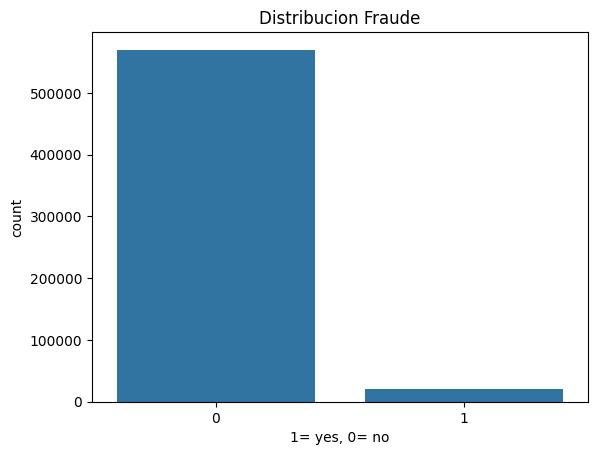

In [10]:
plt.title ('Distribucion Fraude')
sns.countplot(x=datos.isFraud)
plt.xlabel ('1= yes, 0= no')
plt.show()

El gráfico indica que existen menor proporción de fraude. Además podemos notar que hay un desbalance en la variable respuesta lo que podria influir en nuestro analisis.

GRAFICA DE LA DISTRIBUCION DE LAS TRANSACCIONES

Text(0, 0.5, 'Probabilidad')

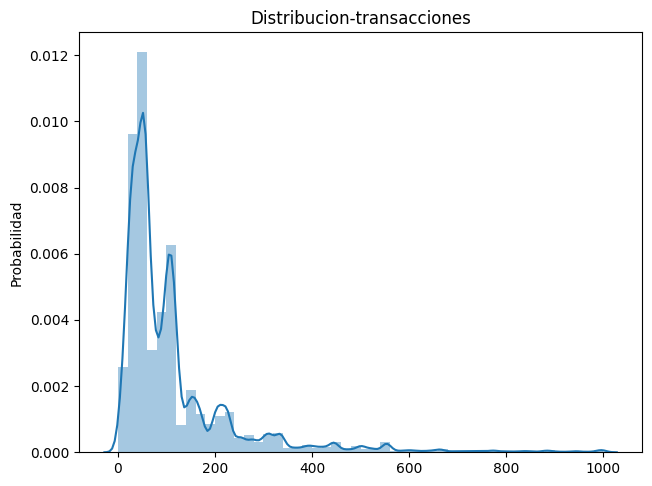

In [11]:
plt.figure(figsize=(16,12))
plt.subplot(221)
g = sns.distplot(datos[datos['TransactionAmt']<= 1000]['TransactionAmt'])
g.set_title("Distribucion-transacciones")
g.set_xlabel("")
g.set_ylabel("Probabilidad")

En la grafica anterior se puede notar el sesgo a la derecha y esto es normal porque el comportamiento apropiado es realizar transacciones pequeñas. Igual podemos notar que las transacciones grandes son pocas. 

In [12]:
datos.ProductCD.value_counts()

ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64

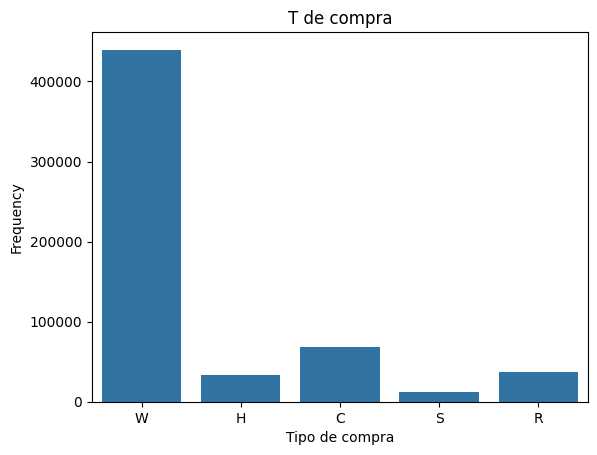

In [13]:
plt.title('T de compra')
sns.countplot(x=datos.ProductCD)
plt.xlabel('Tipo de compra')
plt.ylabel('Frequency')
plt.show()

Con respecto a los productos, existe un mayor tipo de compra W, seguido del tipo de compra C, R, H y finalmente S. Con base a esto es posible sugerir que las transacciones que se realizan frecuentemente pertenecen al tipo W.

FUNCION FOR

En este algoritmo, se seleccionan las Columnas tipo Numéricas y se insertan a una lista llamada num_cols que contiene los nombres de las columnas numéricas del conjunto de datos datos. Se realiza un for para Análisis y Visualización de Columnas Numéricas. En este se recorre cada columna numérica en la lista num_col, se verifica si el nombre de la columna comienza con ‘V’ y es un número entre 1 y 339 (Puesto que existen 339 variables de tipo V y no aportan mucho a este análisis). Luego, se imprime el nombre de la columna, su sesgo (skewness) y su curtosis (kurtosis)y finalmente, se crea una figura con dos subplots: un histograma y un boxplot.

Procedi a trabajar solo con 100000 datos ya que no tenia memoria suficiente para trabajar con la base de datos completa. 

In [14]:
sdatos= datos.head(100000)

Column:  TransactionID
Skew: 0.0
Kurtosis:  -1.2


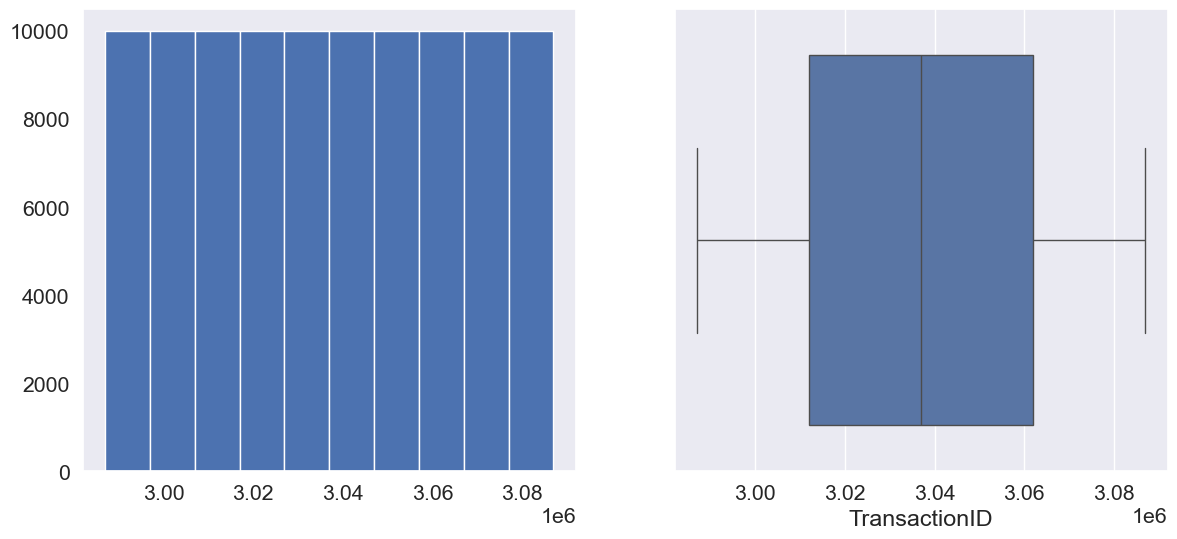

Column:  isFraud
Skew: 6.01
Kurtosis:  34.08


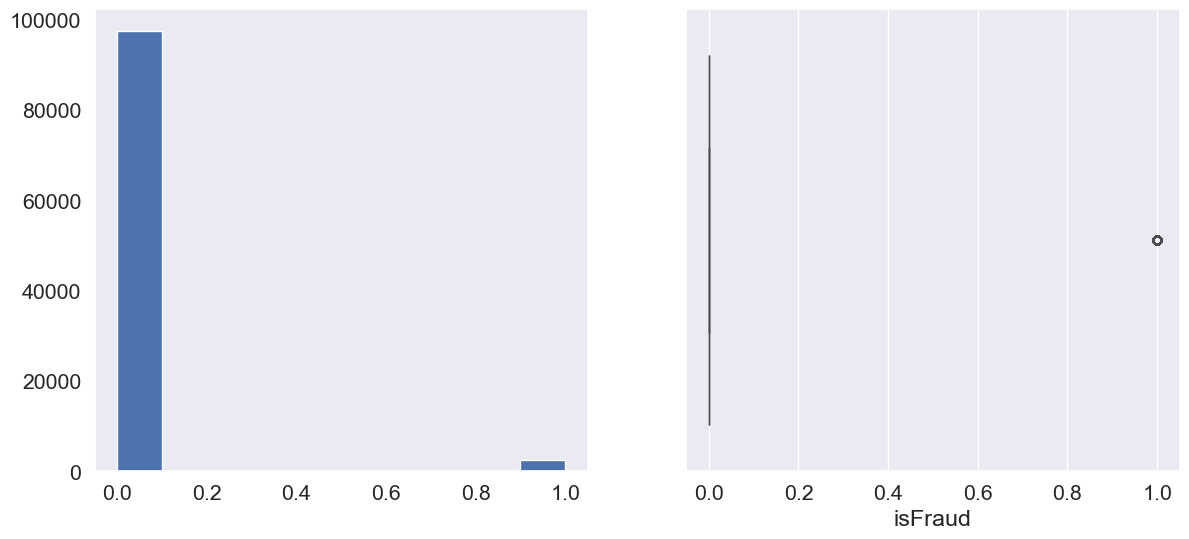

Column:  TransactionDT
Skew: -0.19
Kurtosis:  -1.22


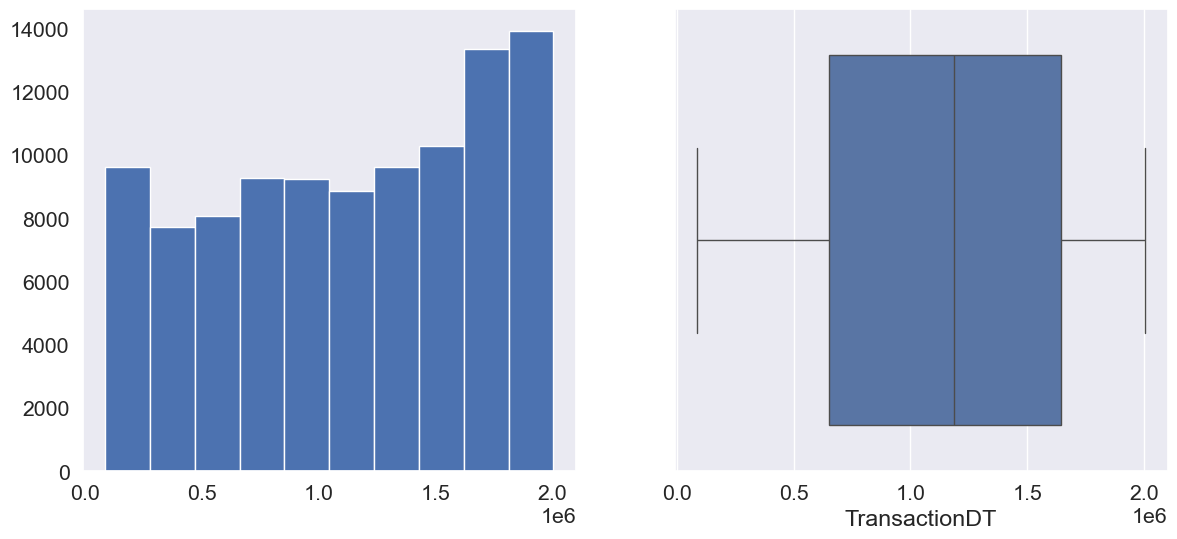

Column:  TransactionAmt
Skew: 6.78
Kurtosis:  70.16


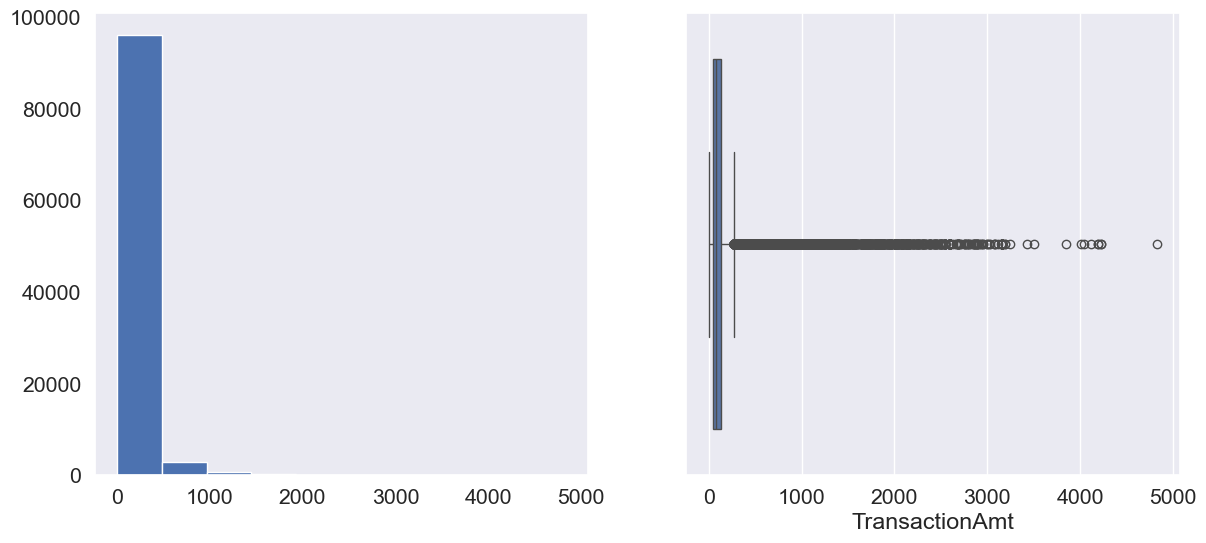

Column:  card1
Skew: -0.03
Kurtosis:  -1.15


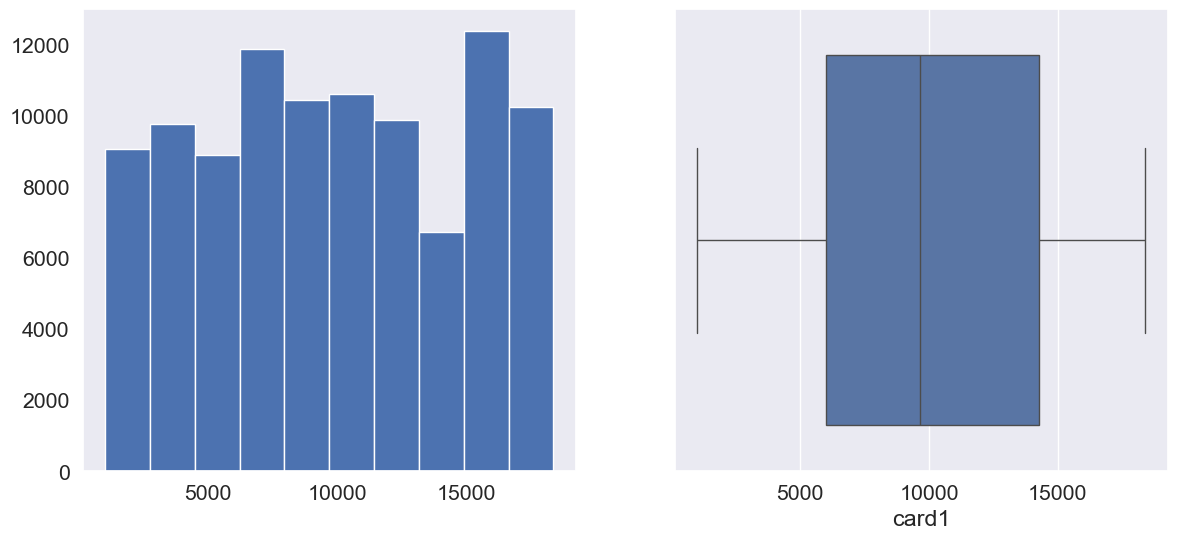

Column:  card2
Skew: -0.26
Kurtosis:  -1.31


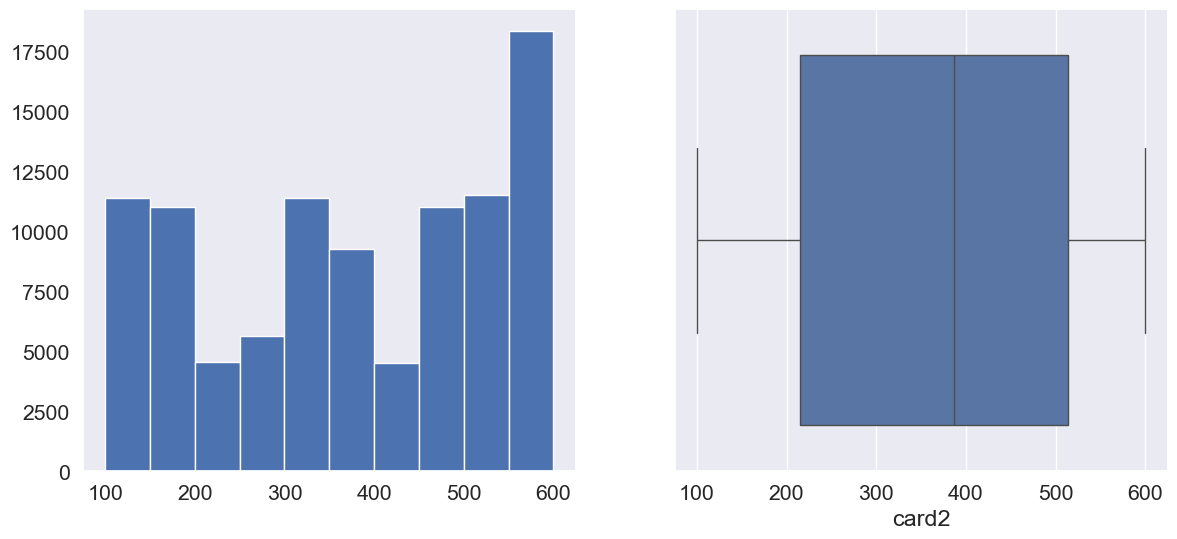

Column:  card3
Skew: 2.11
Kurtosis:  5.94


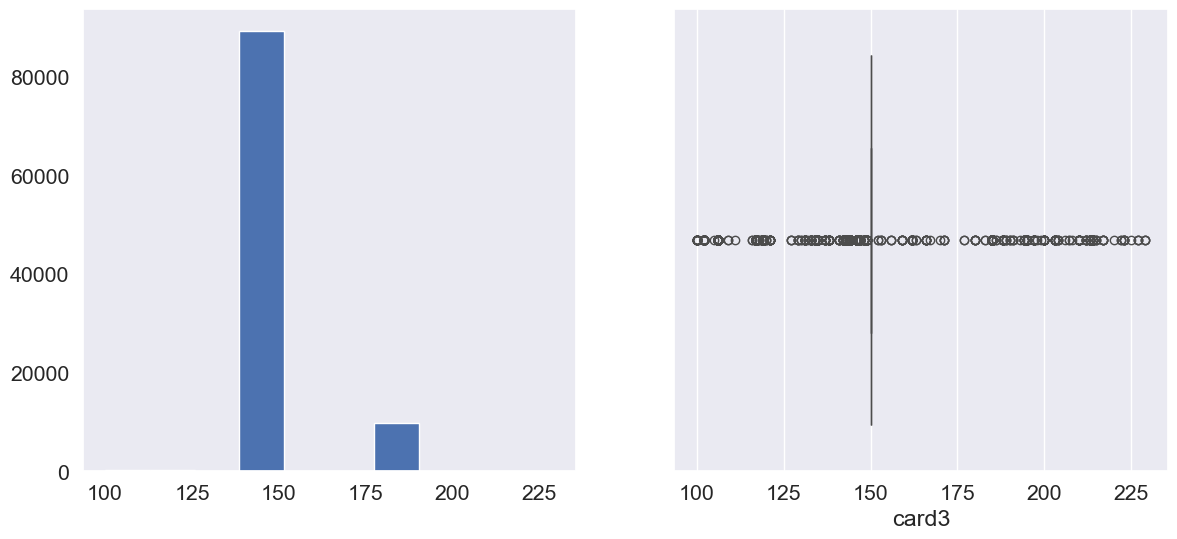

Column:  card5
Skew: -1.31
Kurtosis:  0.19


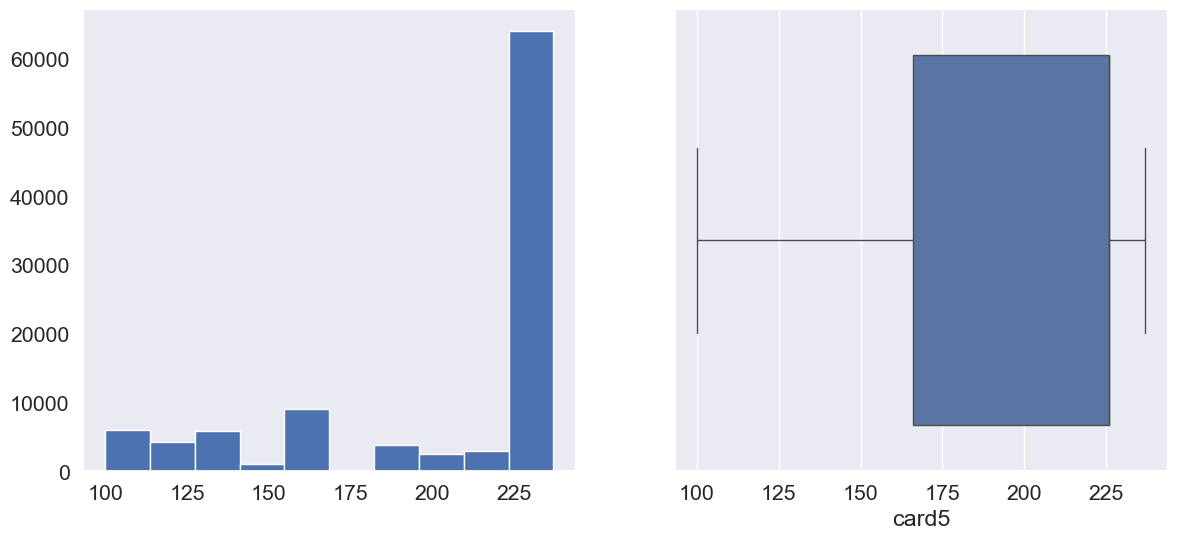

Column:  addr1
Skew: 0.36
Kurtosis:  -0.56


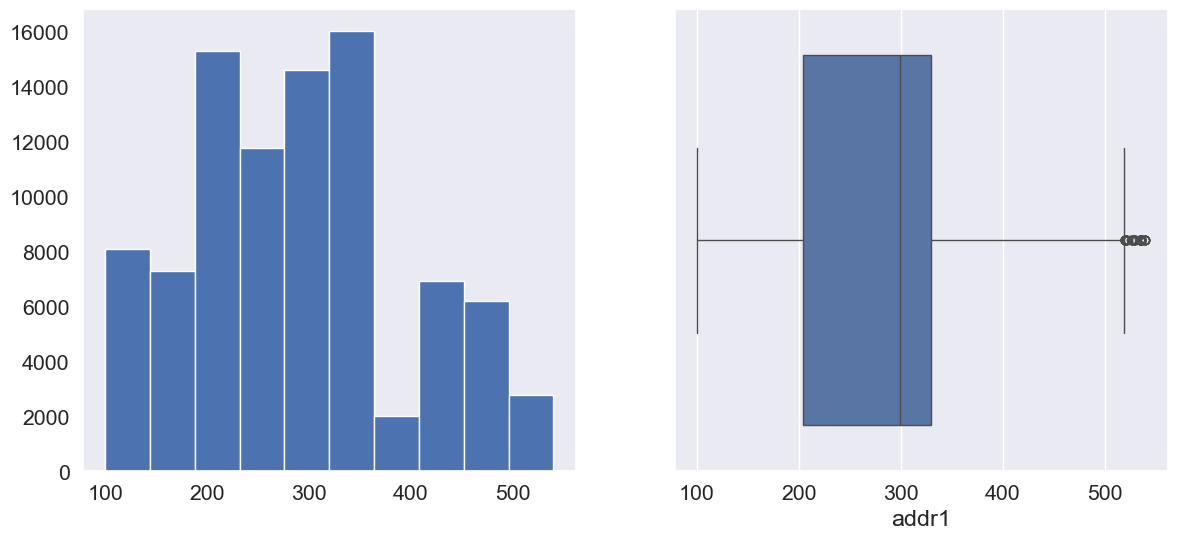

Column:  addr2
Skew: -7.35
Kurtosis:  64.98


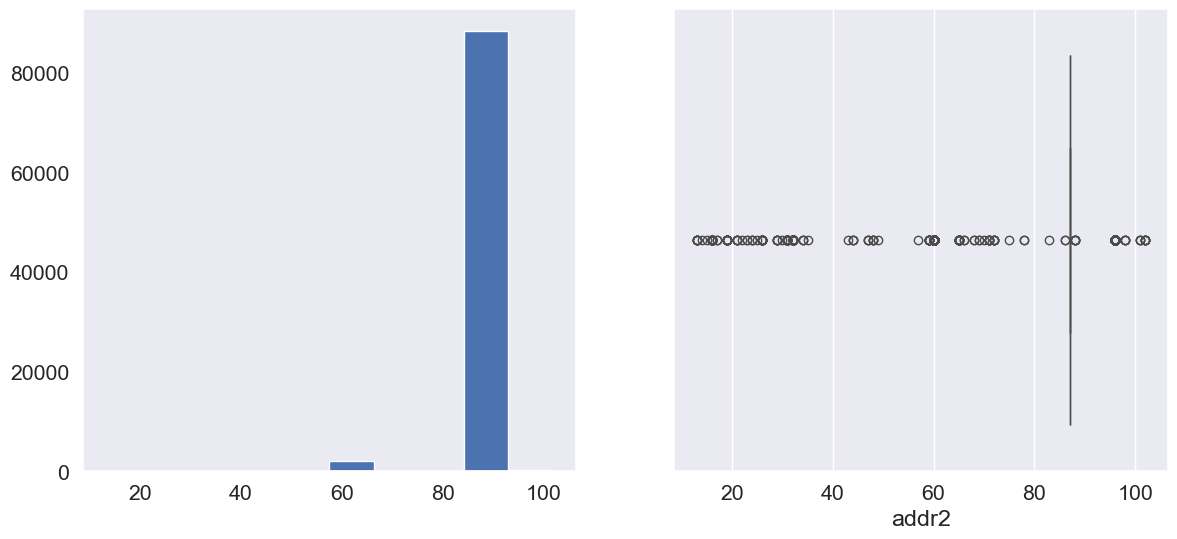

Column:  dist1
Skew: 4.89
Kurtosis:  32.82


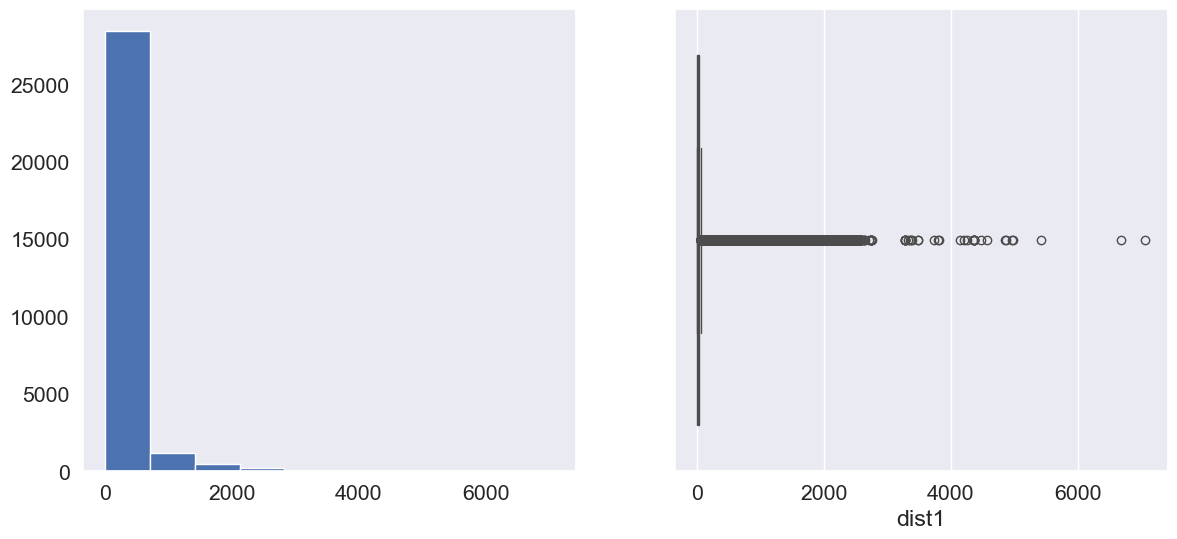

Column:  dist2
Skew: 5.02
Kurtosis:  38.05


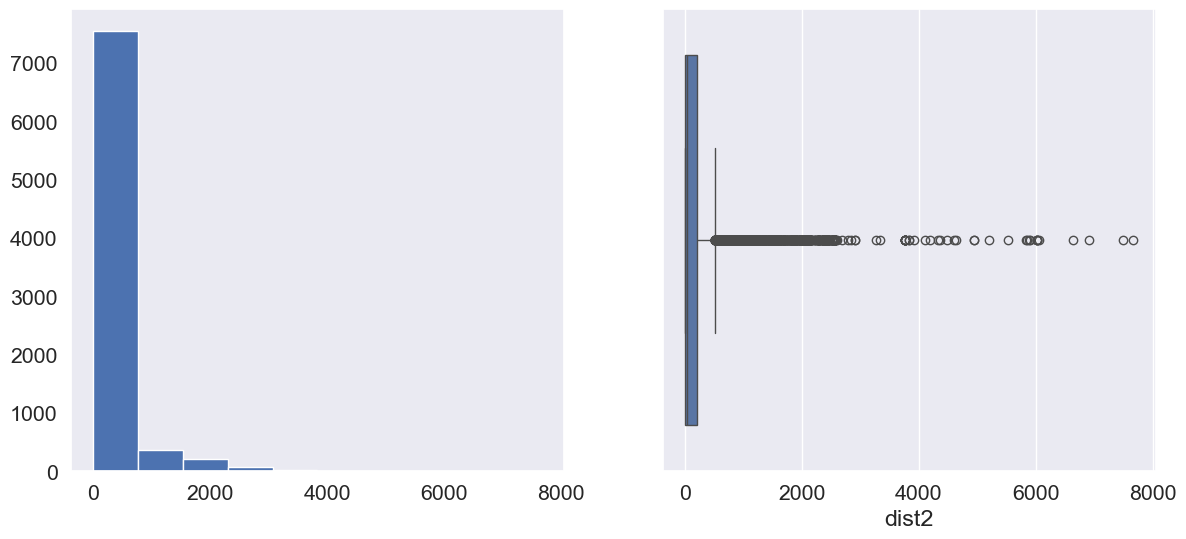

Column:  C1
Skew: 11.02
Kurtosis:  132.87


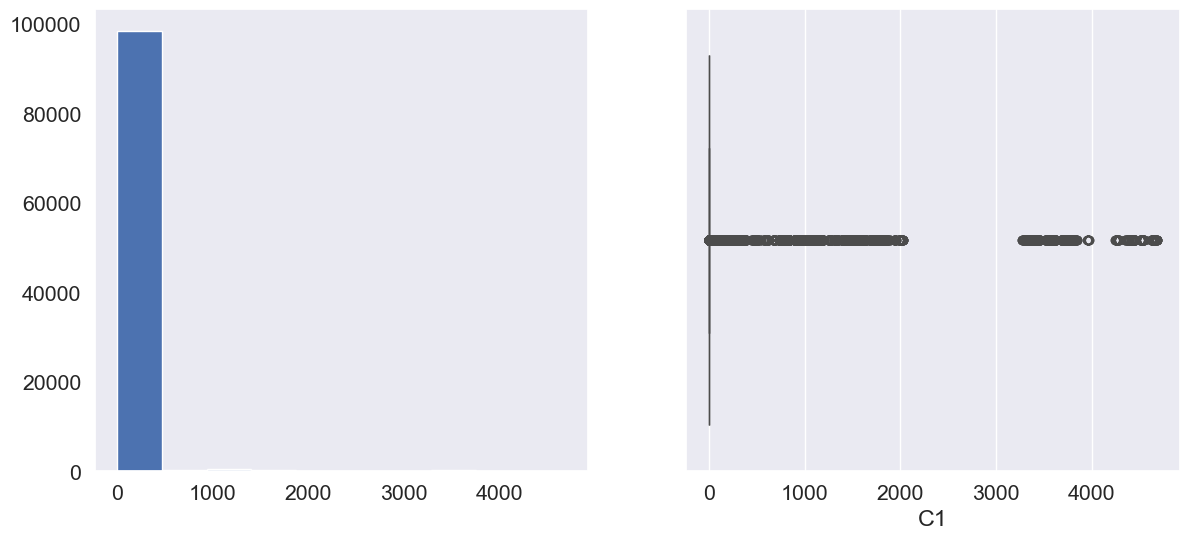

Column:  C2
Skew: 10.69
Kurtosis:  126.49


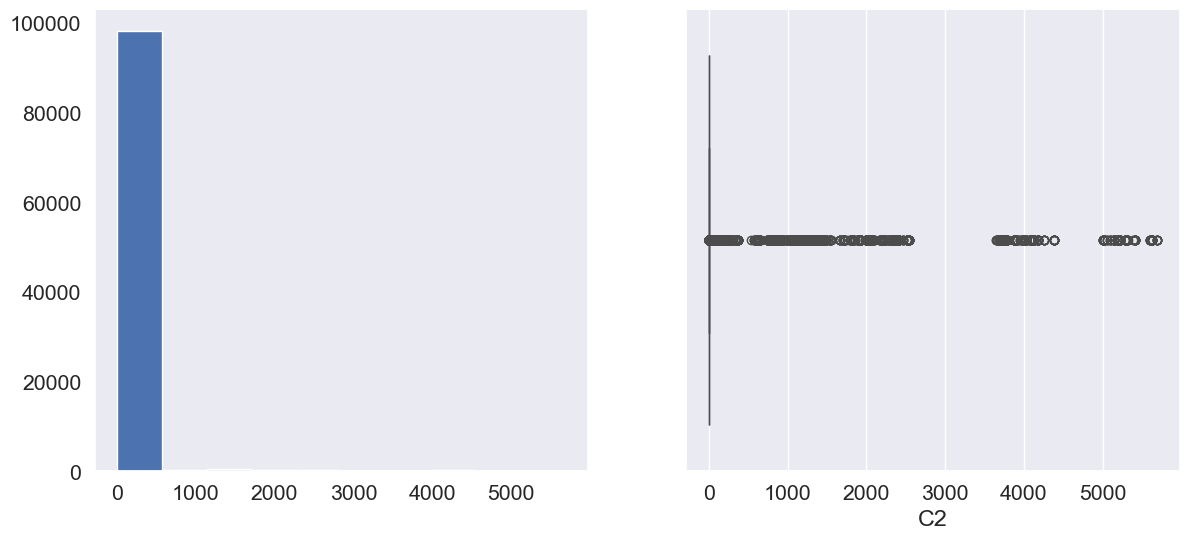

Column:  C3
Skew: 30.08
Kurtosis:  2495.47


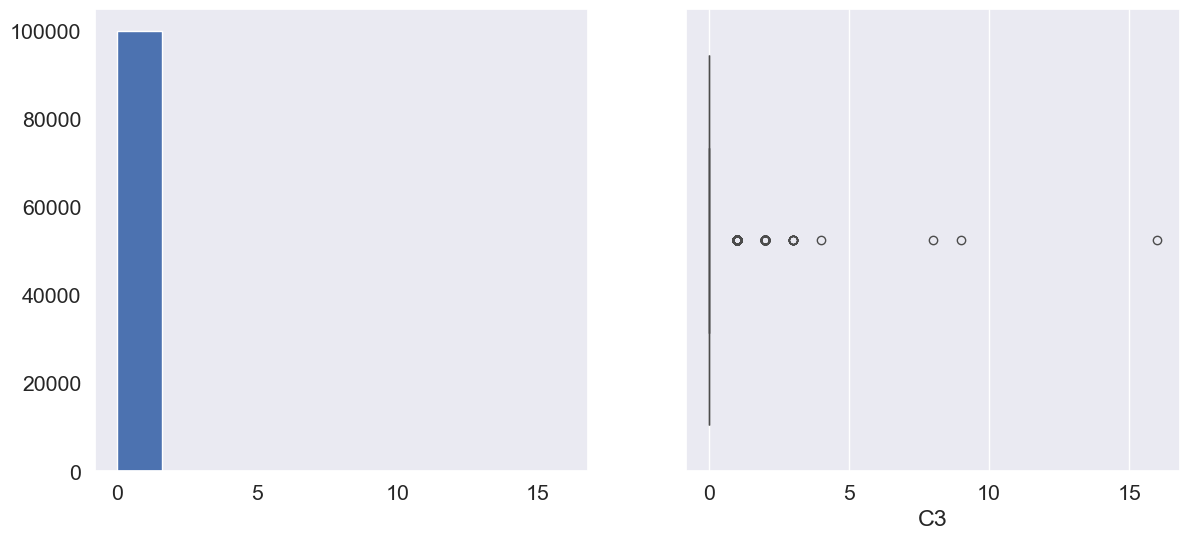

Column:  C4
Skew: 10.05
Kurtosis:  109.9


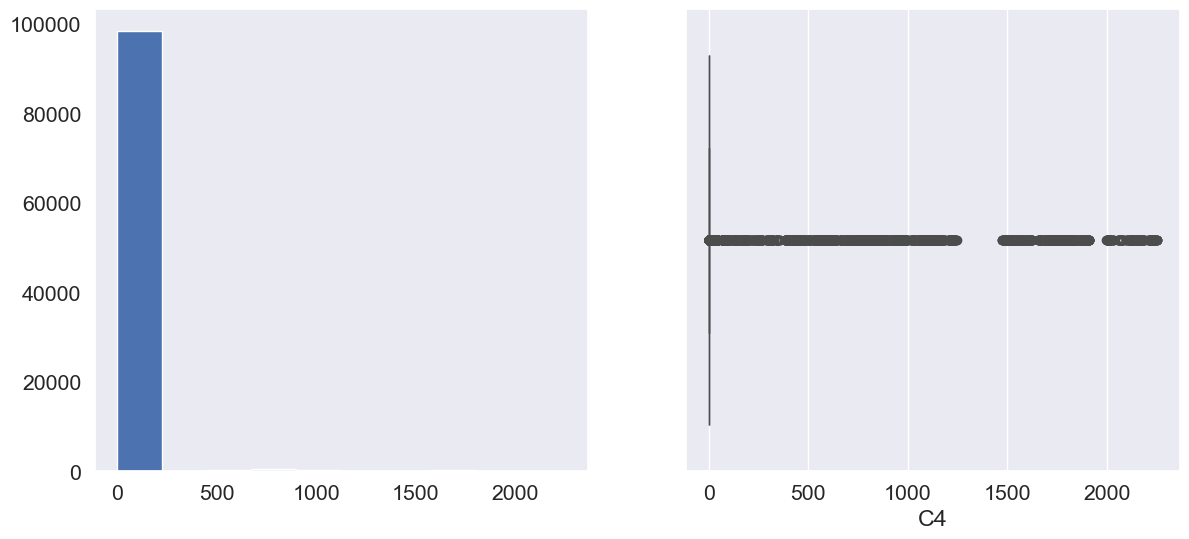

Column:  C5
Skew: 6.54
Kurtosis:  45.9


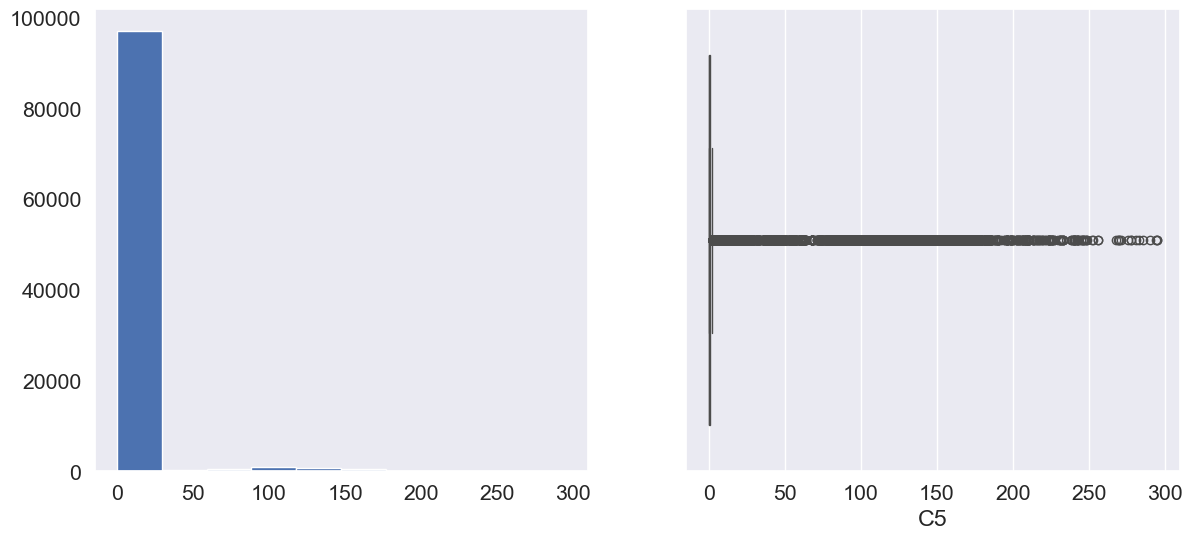

Column:  C6
Skew: 9.85
Kurtosis:  106.83


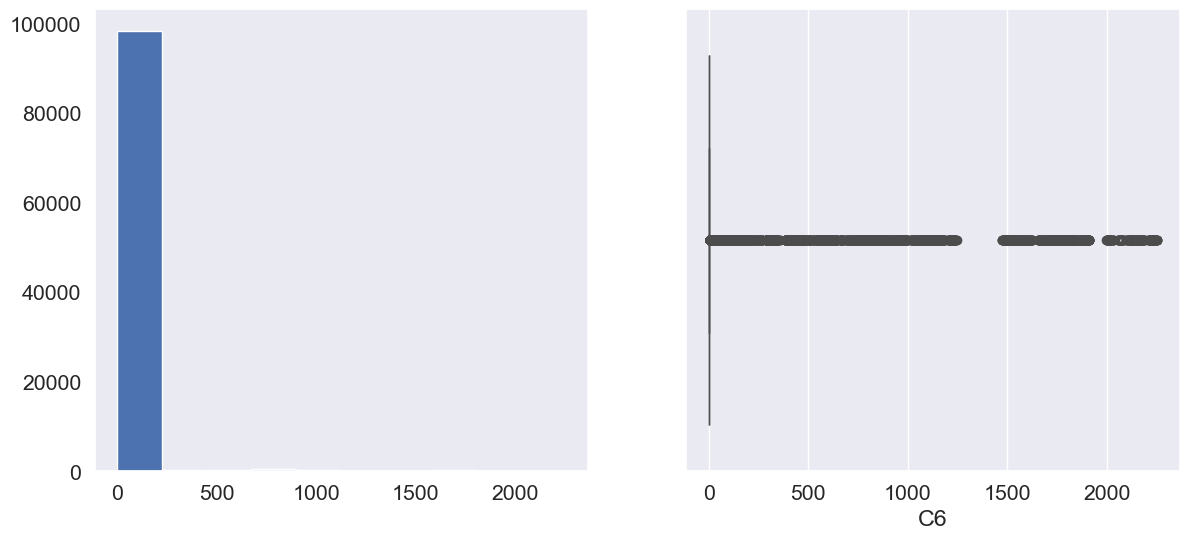

Column:  C7
Skew: 11.11
Kurtosis:  130.97


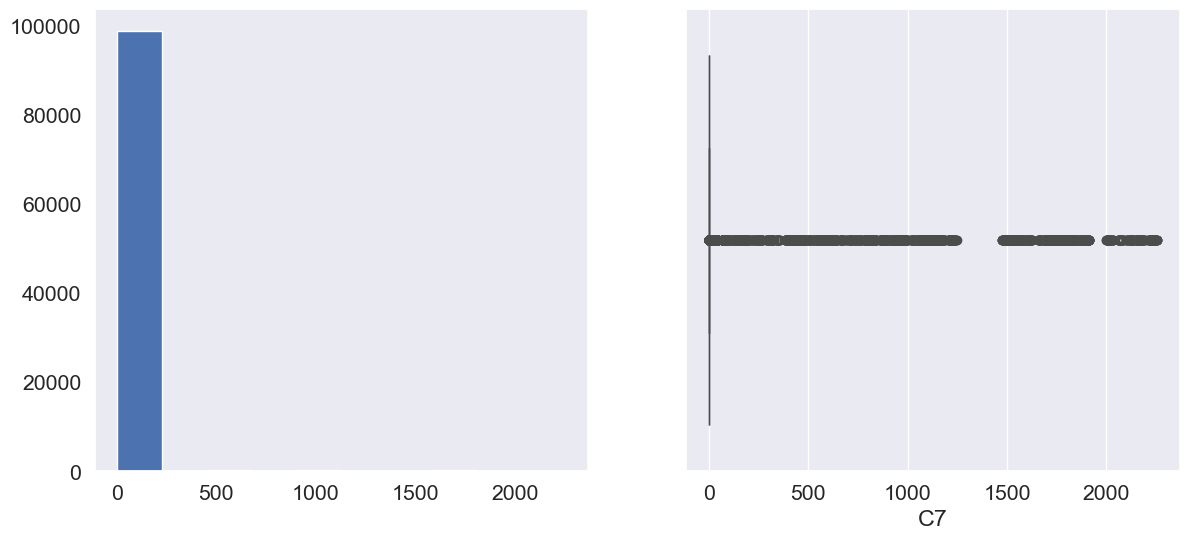

Column:  C8
Skew: 10.91
Kurtosis:  126.87


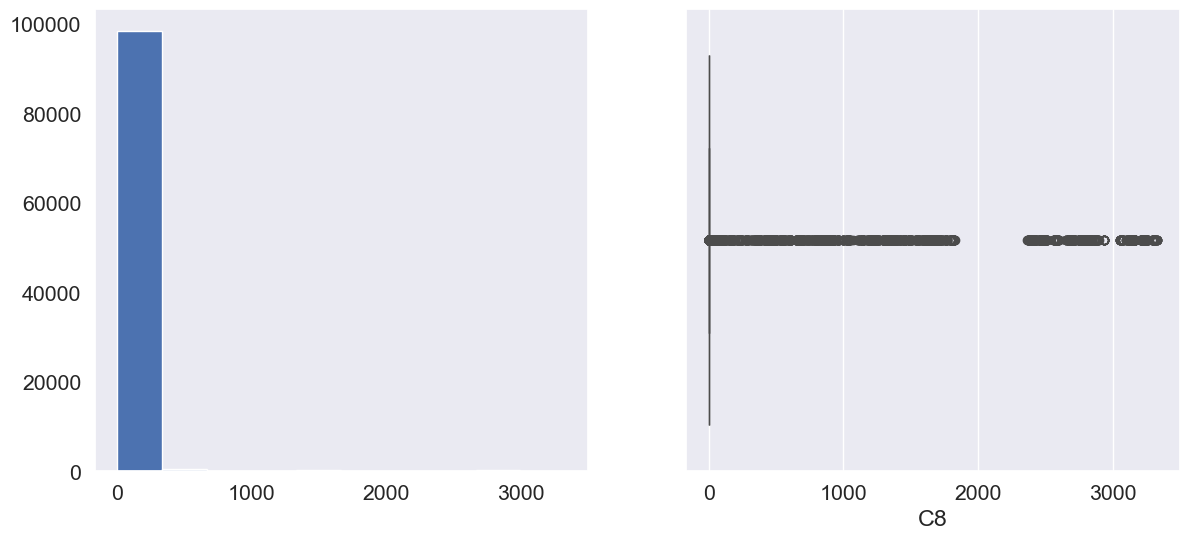

Column:  C9
Skew: 6.86
Kurtosis:  54.12


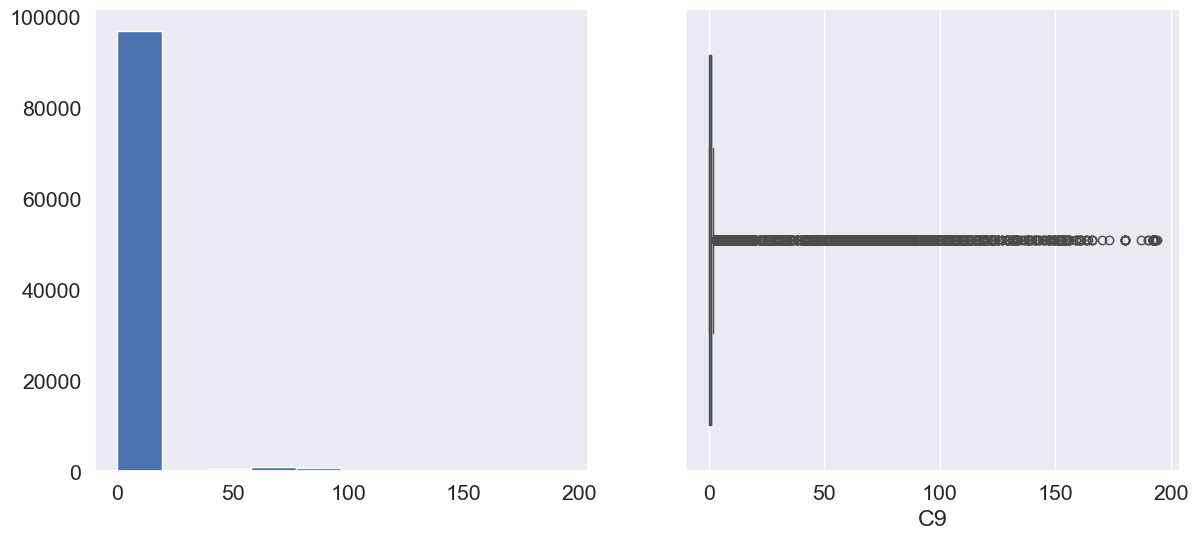

Column:  C10
Skew: 10.5
Kurtosis:  116.83


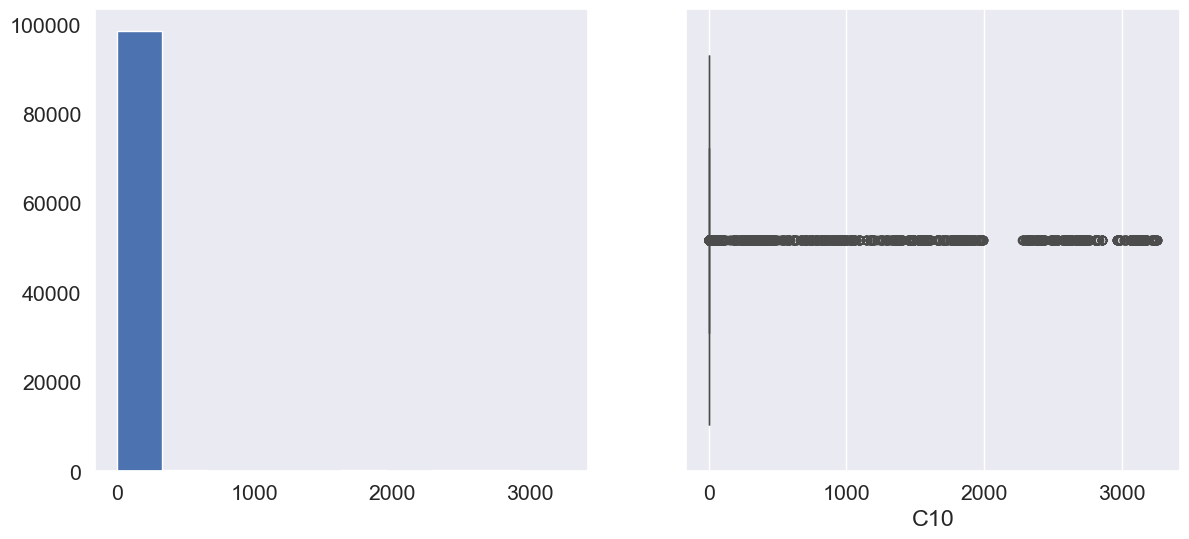

Column:  C11
Skew: 10.41
Kurtosis:  118.72


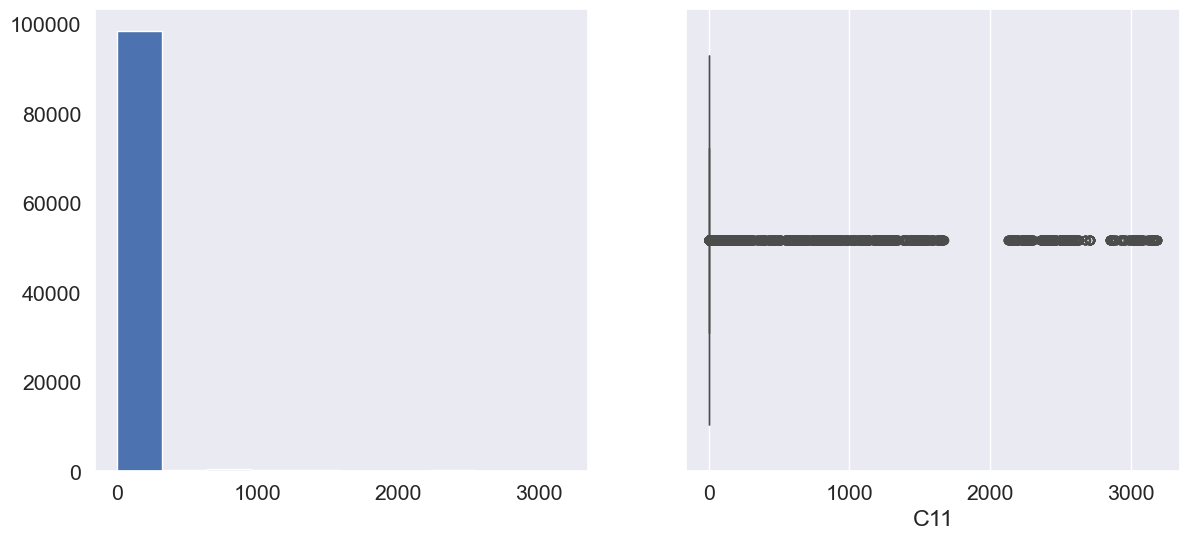

Column:  C12
Skew: 11.22
Kurtosis:  133.96


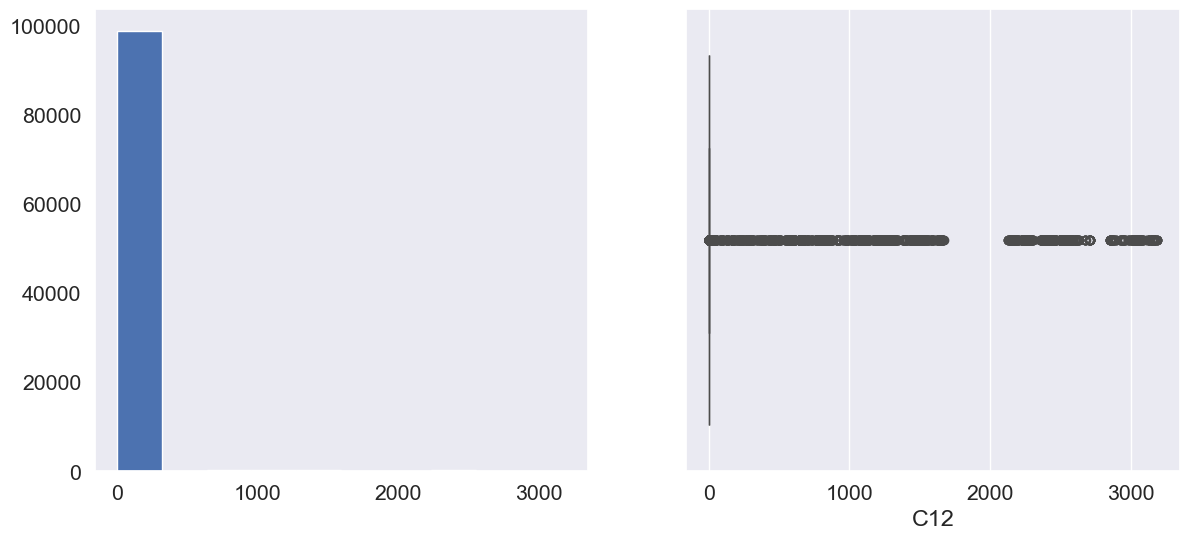

Column:  C13
Skew: 8.45
Kurtosis:  83.3


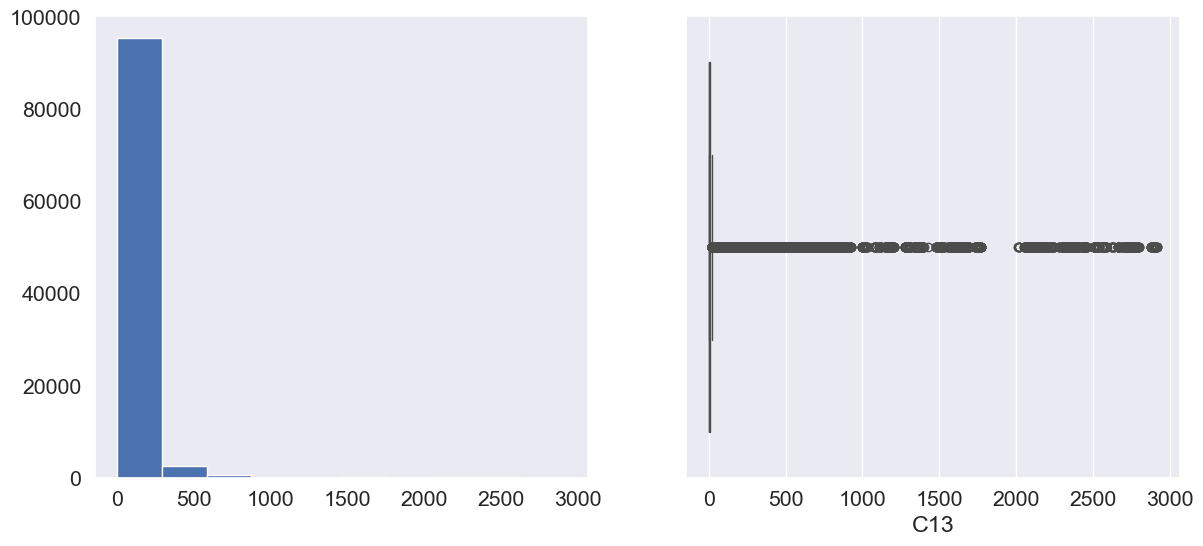

Column:  C14
Skew: 9.43
Kurtosis:  98.41


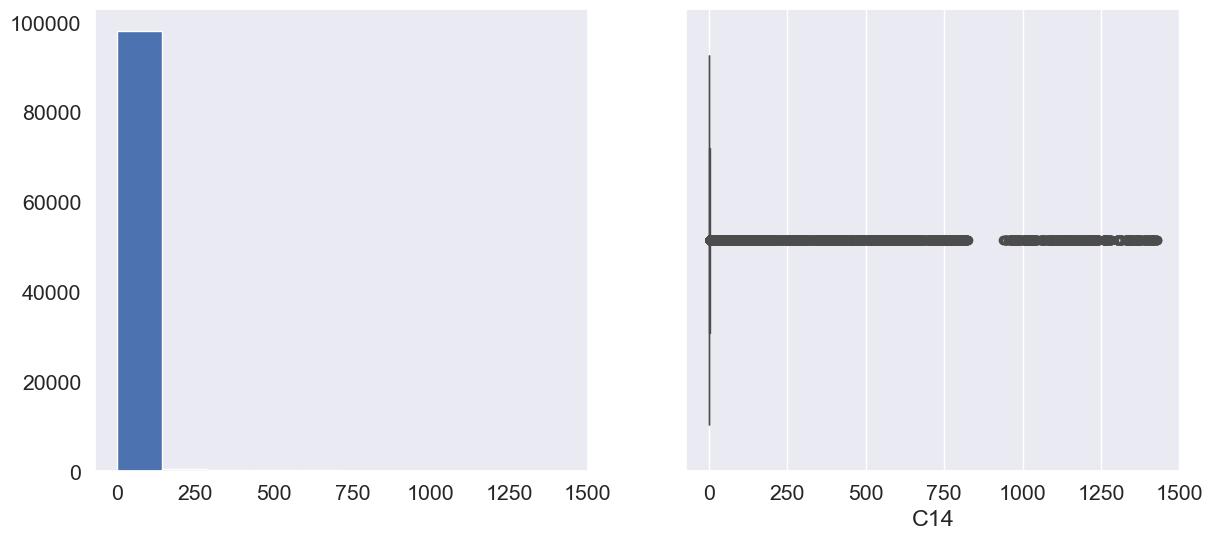

Column:  D1
Skew: 1.92
Kurtosis:  2.5


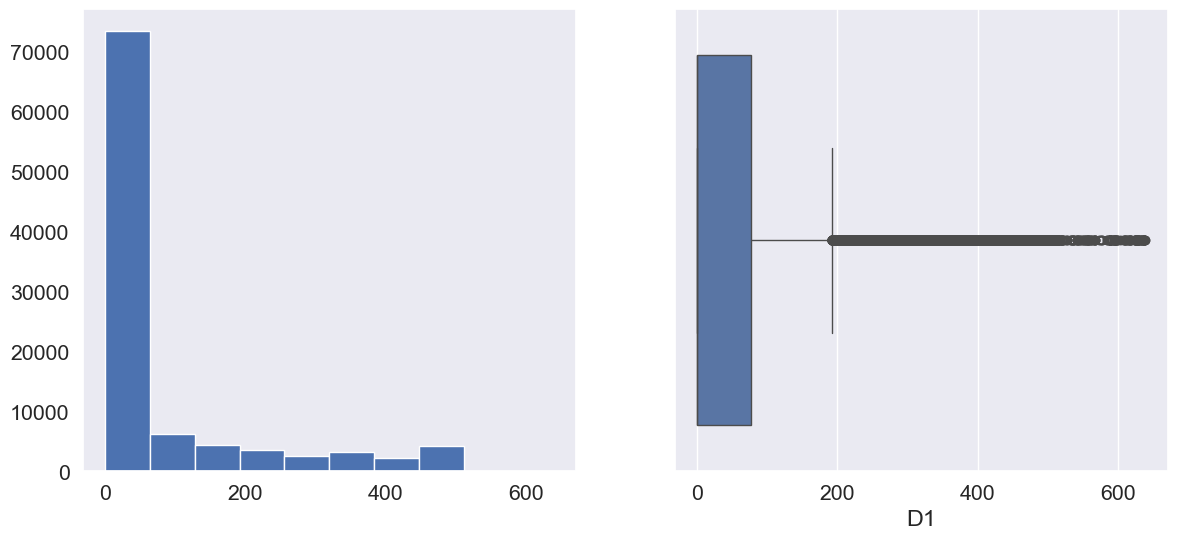

Column:  D2
Skew: 0.78
Kurtosis:  -0.73


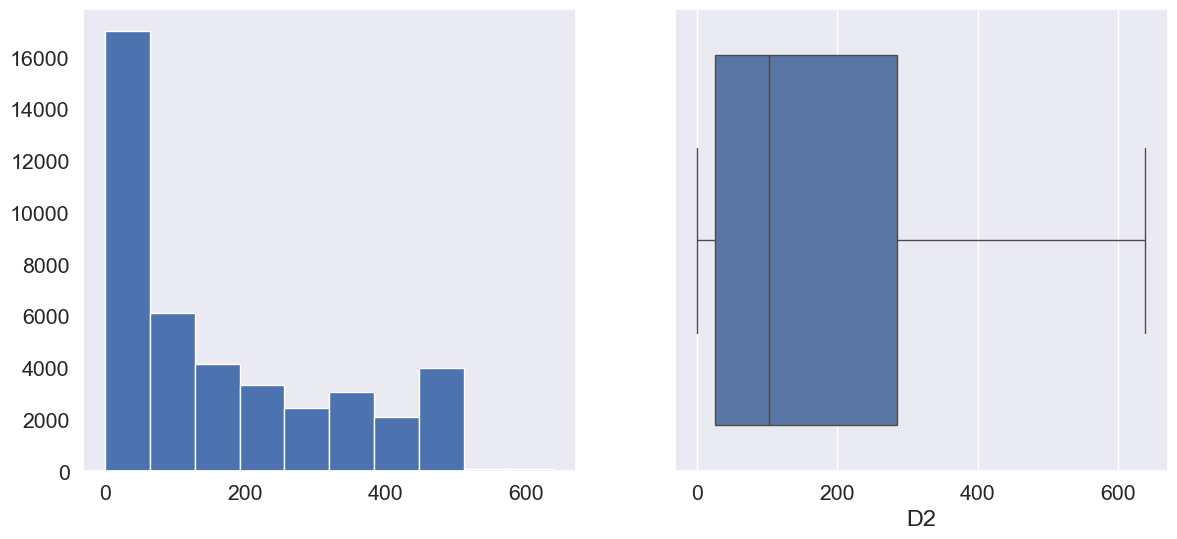

Column:  D3
Skew: 4.06
Kurtosis:  19.14


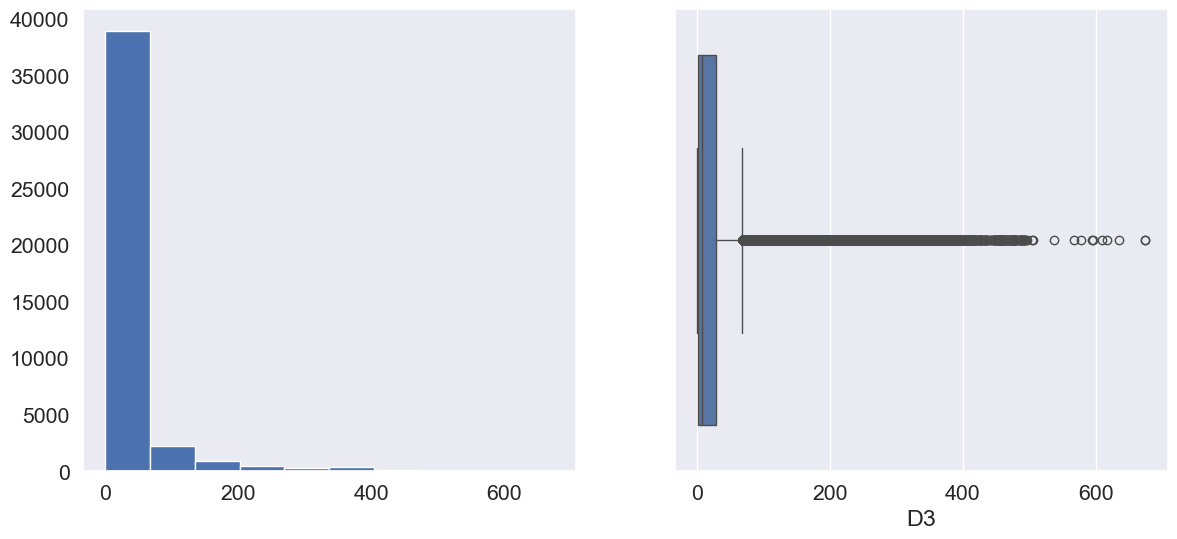

Column:  D4
Skew: 1.05
Kurtosis:  -0.39


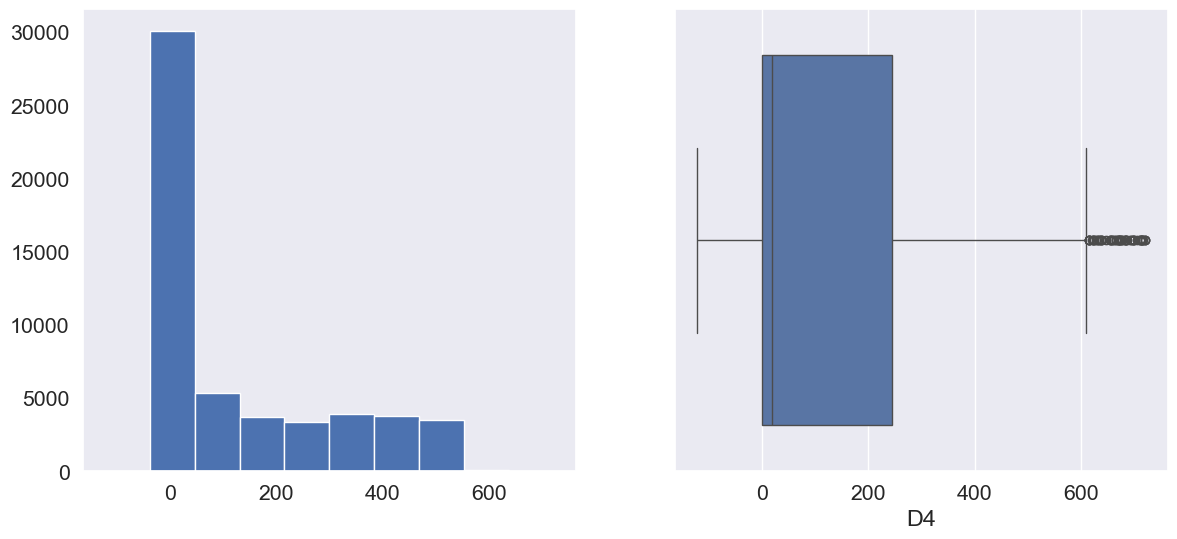

Column:  D5
Skew: 3.04
Kurtosis:  9.54


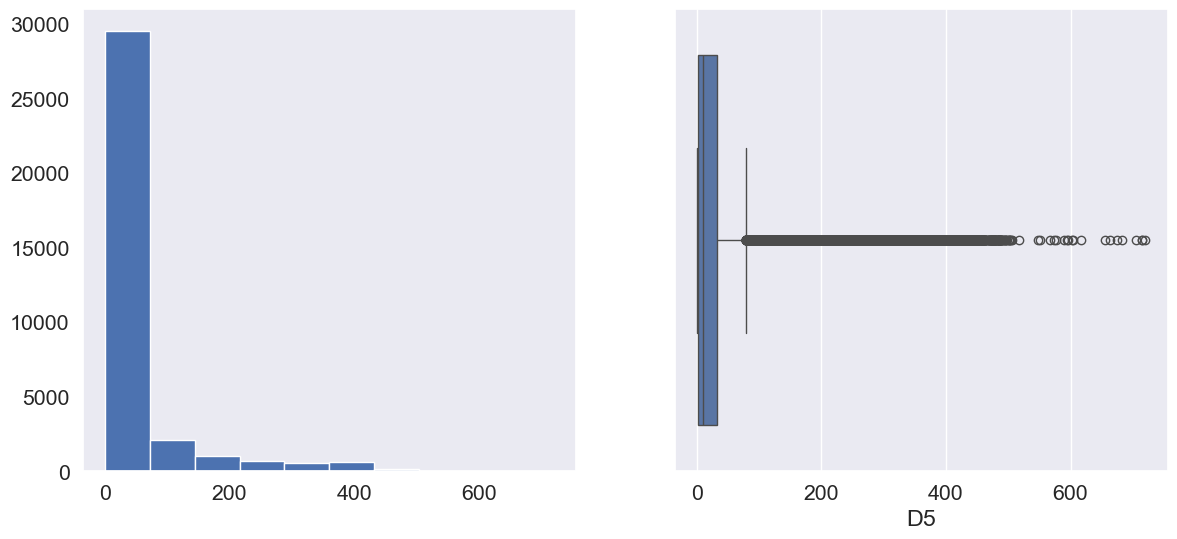

Column:  D6
Skew: 2.29
Kurtosis:  4.71


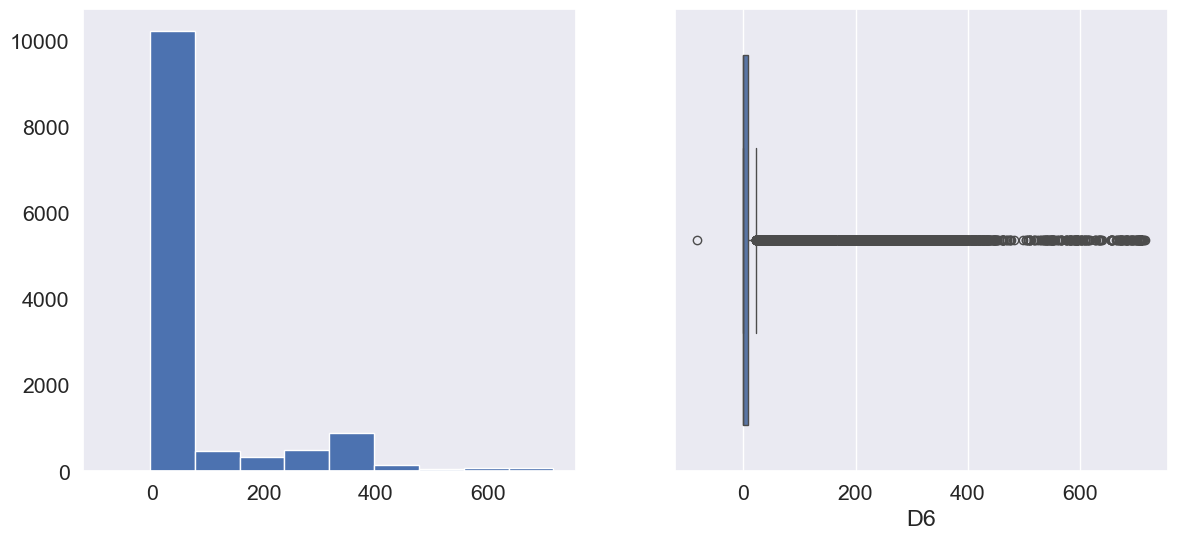

Column:  D7
Skew: 2.04
Kurtosis:  3.07


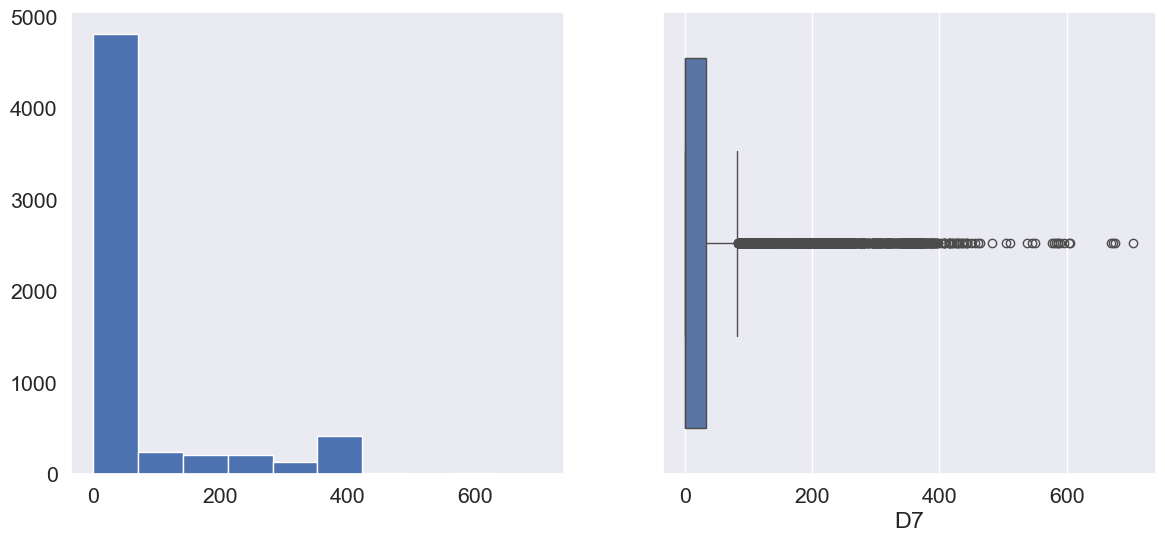

Column:  D8
Skew: 1.79
Kurtosis:  2.5


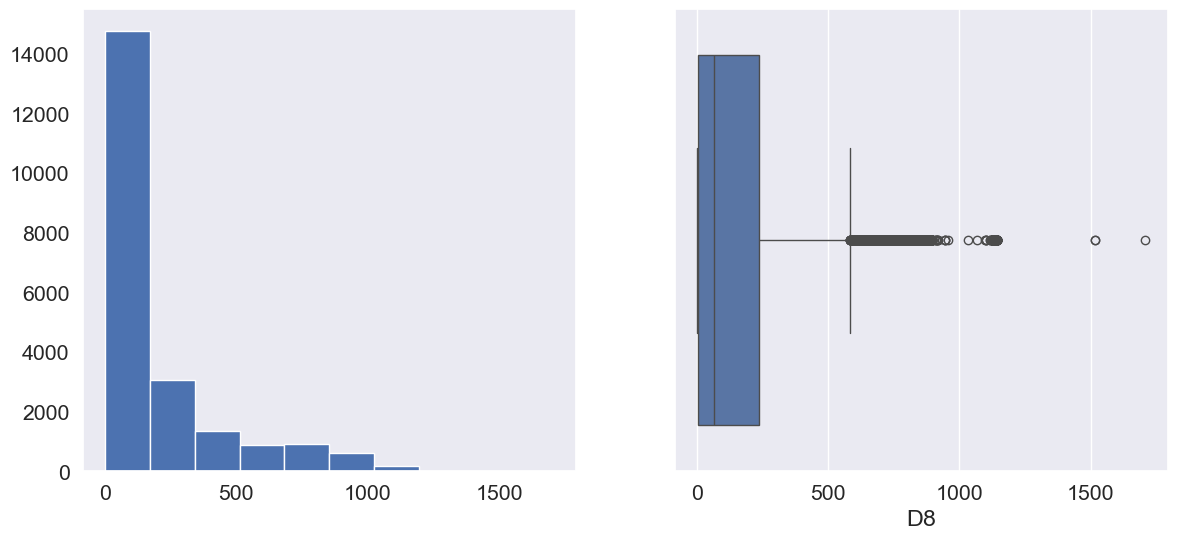

Column:  D9
Skew: -0.69
Kurtosis:  -1.01


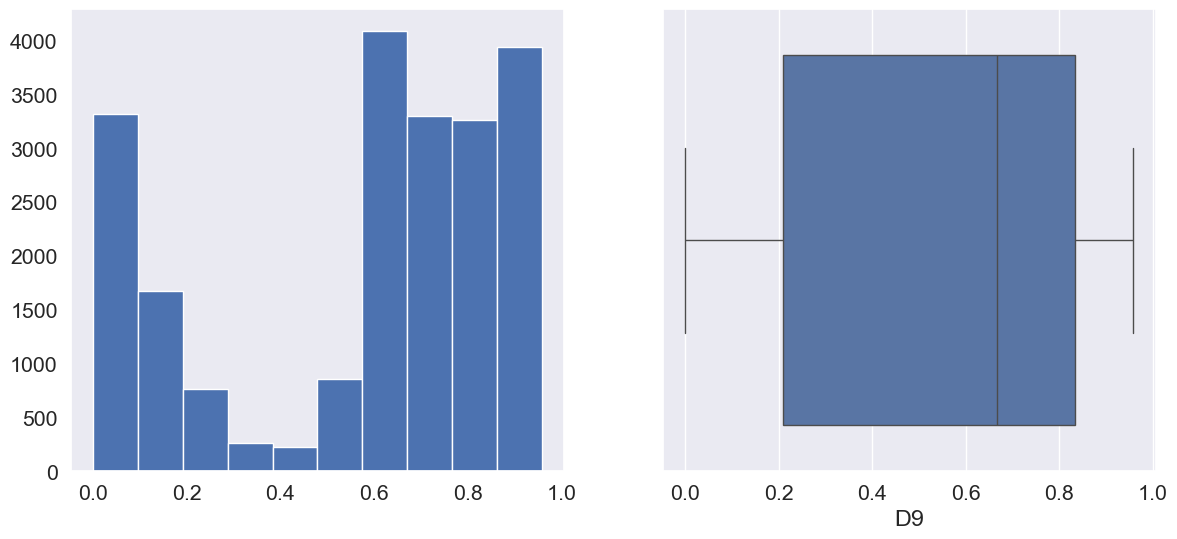

Column:  D10
Skew: 1.24
Kurtosis:  0.08


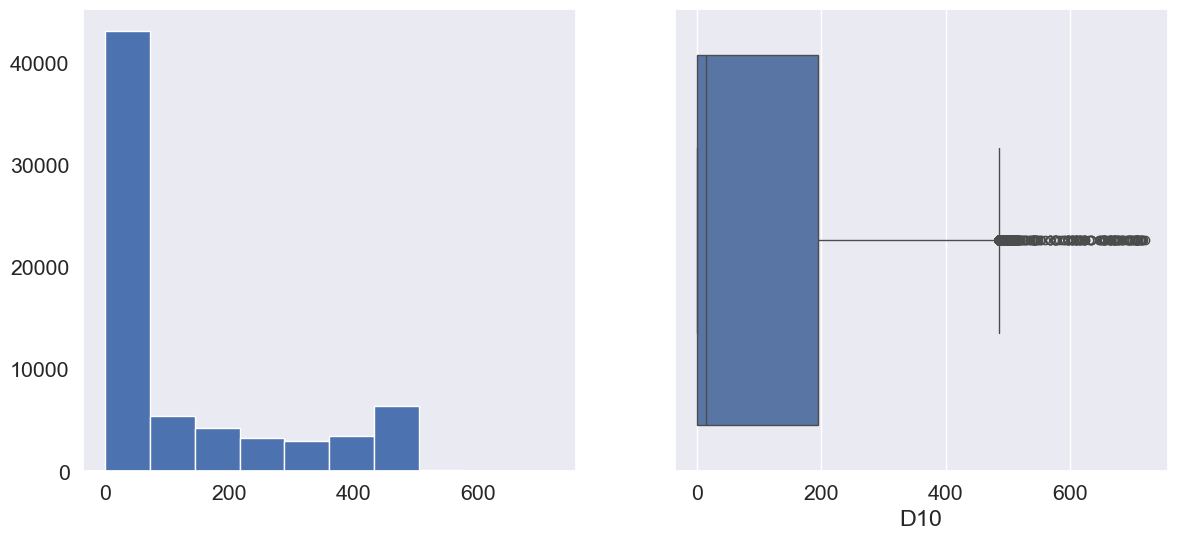

Column:  D11
Skew: 1.04
Kurtosis:  -0.36


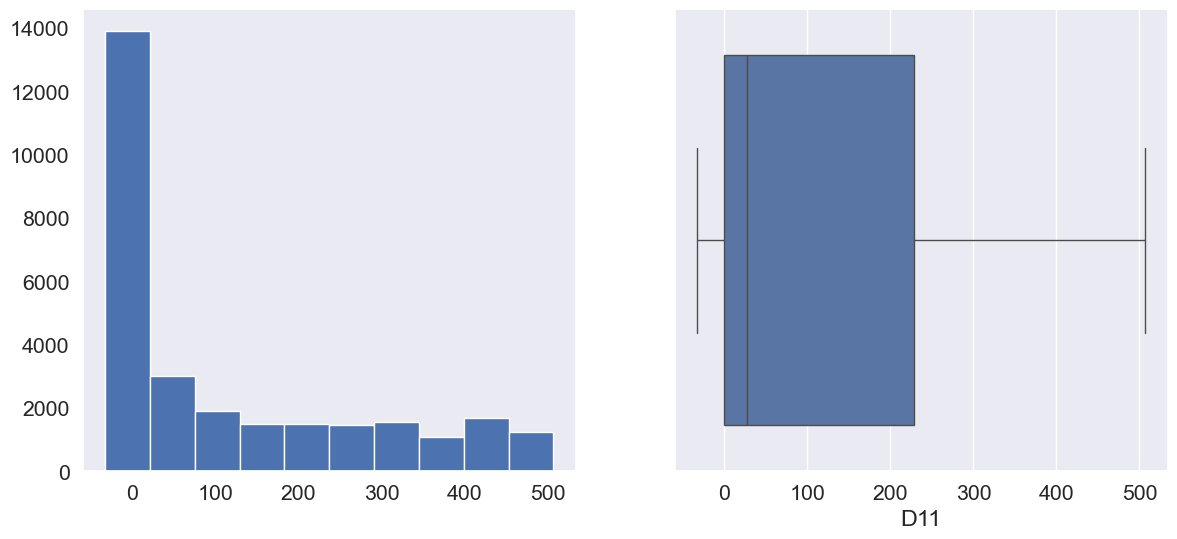

Column:  D12
Skew: 2.39
Kurtosis:  4.51


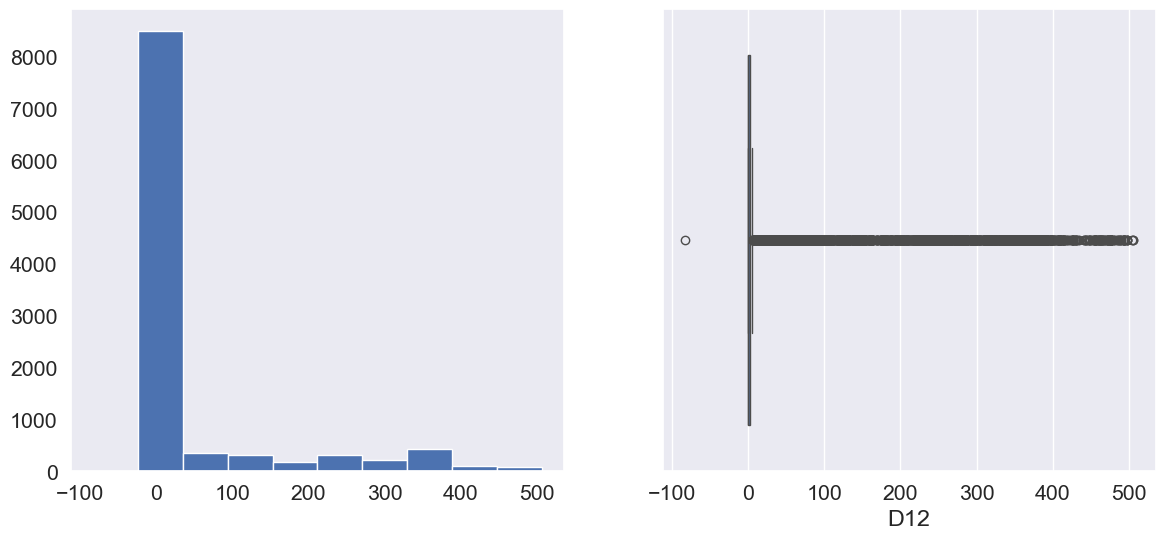

Column:  D13
Skew: 5.53
Kurtosis:  36.26


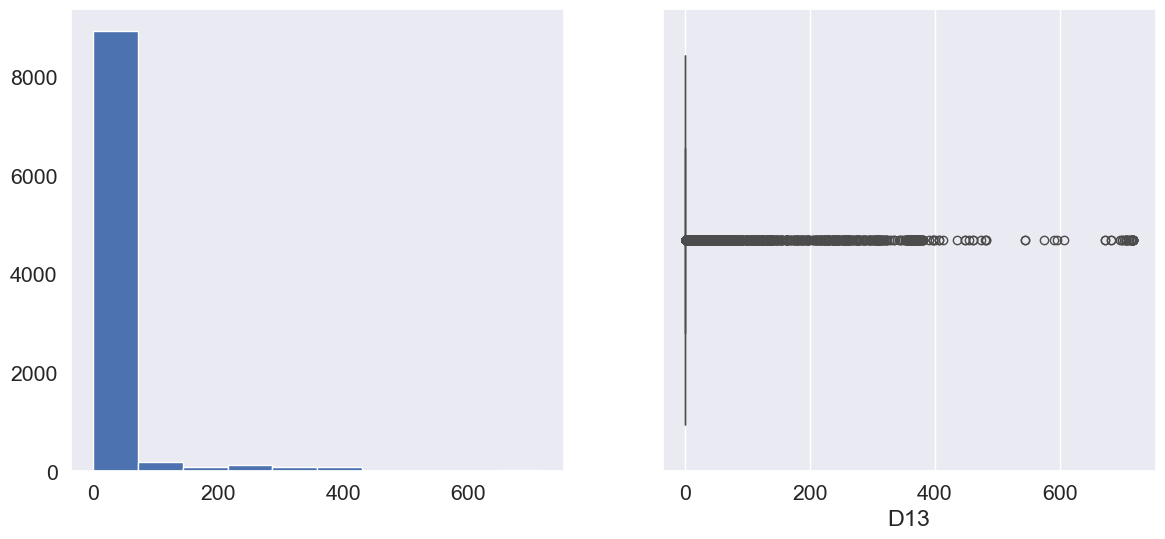

Column:  D14
Skew: 2.83
Kurtosis:  7.58


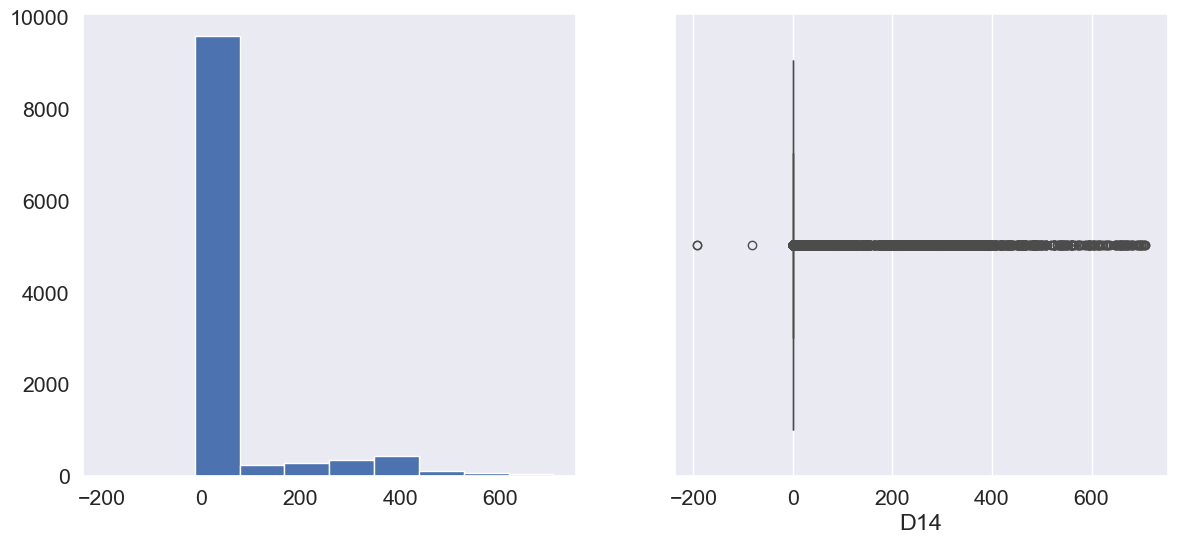

Column:  D15
Skew: 0.84
Kurtosis:  -0.84


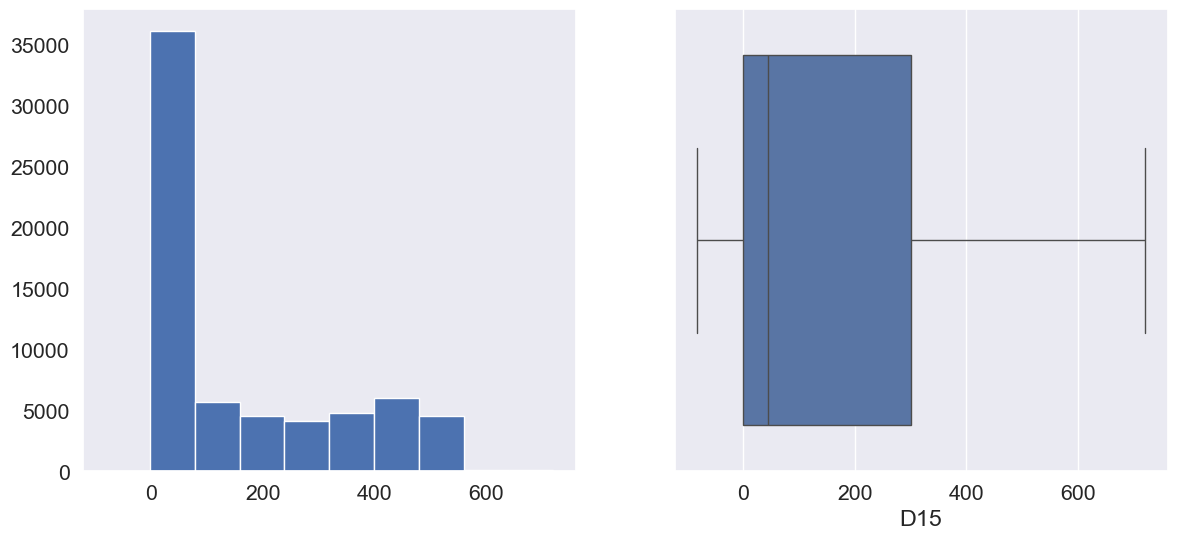

Column:  id_01
Skew: -4.15
Kurtosis:  20.91


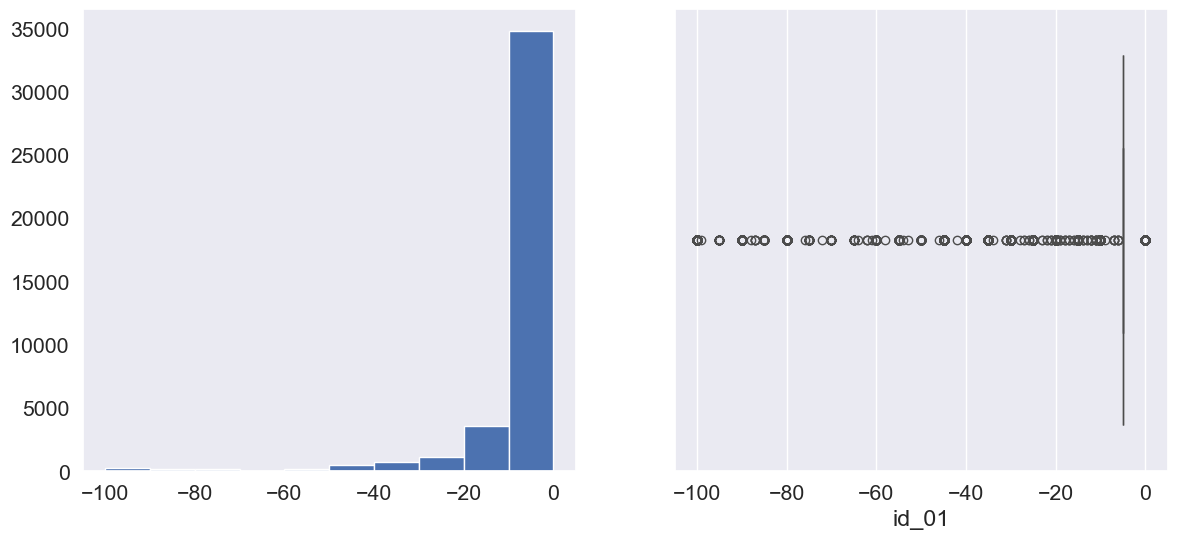

Column:  id_02
Skew: 2.37
Kurtosis:  8.14


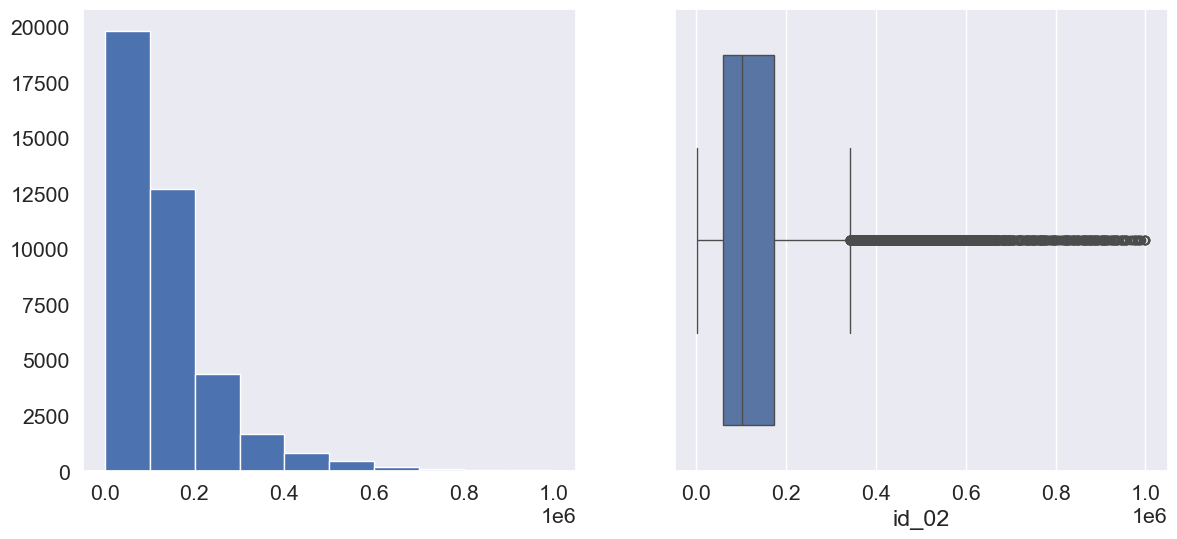

Column:  id_03
Skew: 1.9
Kurtosis:  57.04


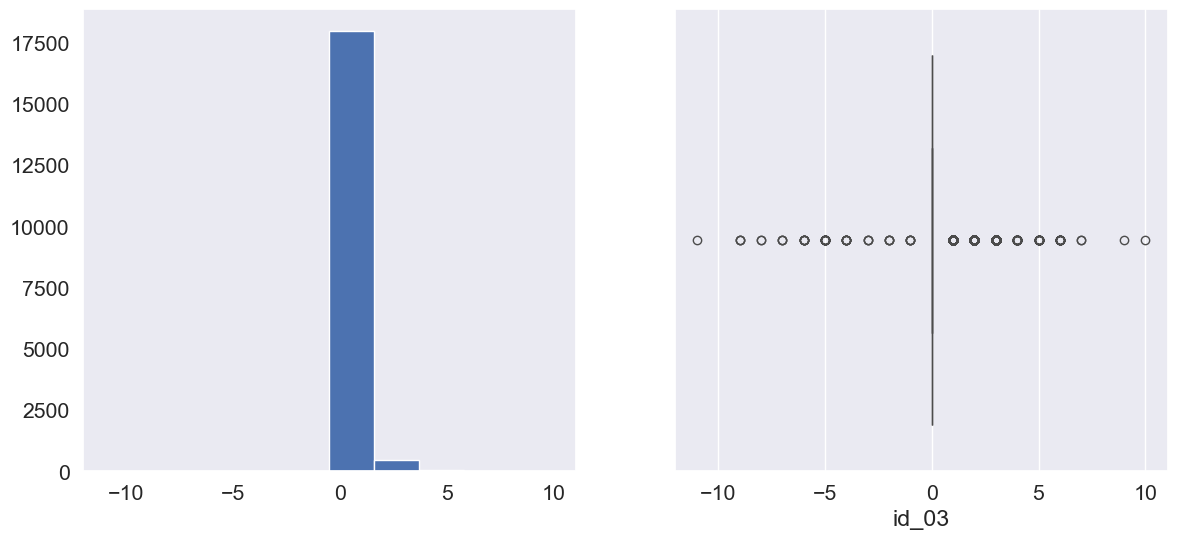

Column:  id_04
Skew: -15.59
Kurtosis:  342.41


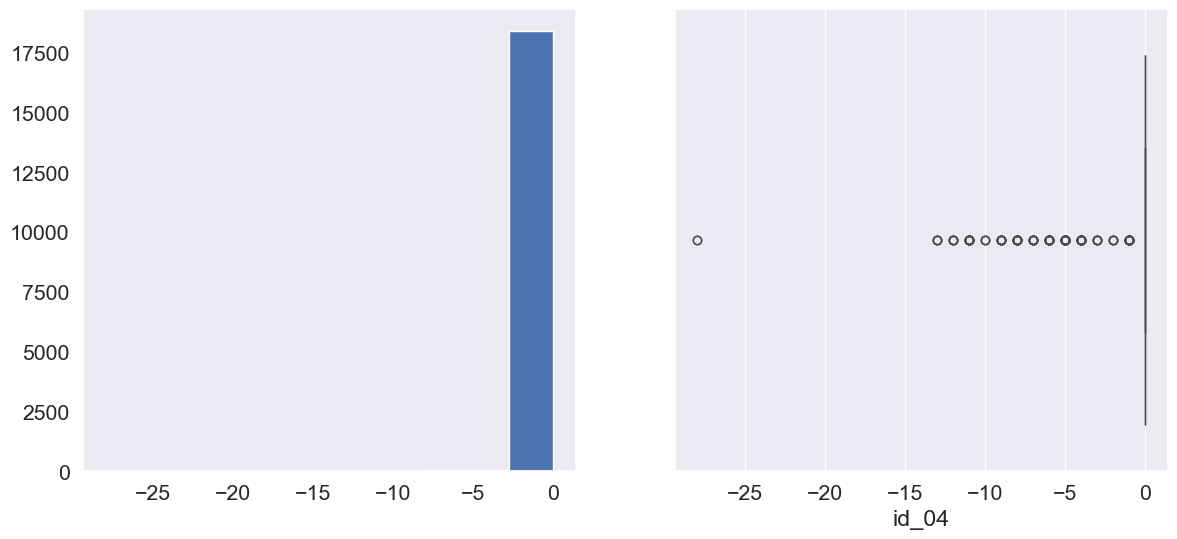

Column:  id_05
Skew: 2.85
Kurtosis:  11.37


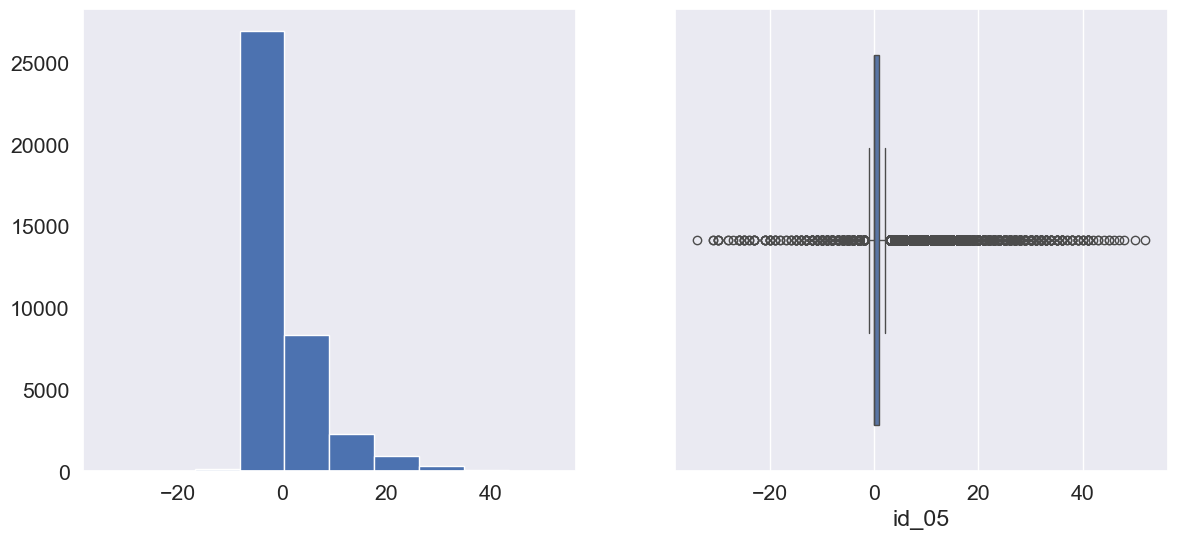

Column:  id_06
Skew: -4.11
Kurtosis:  18.74


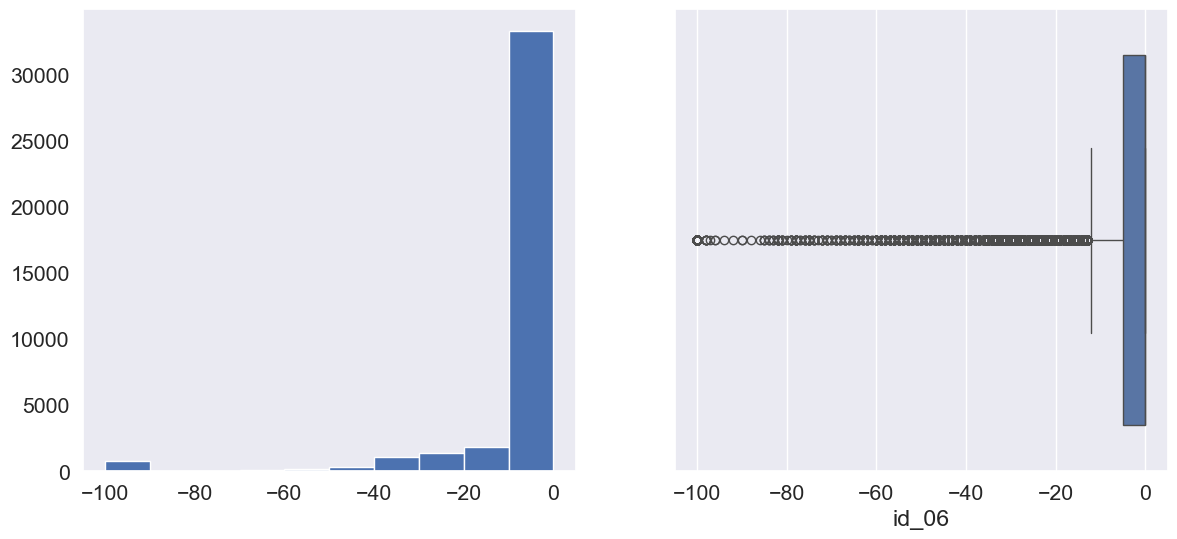

Column:  id_07
Skew: -0.03
Kurtosis:  -0.2


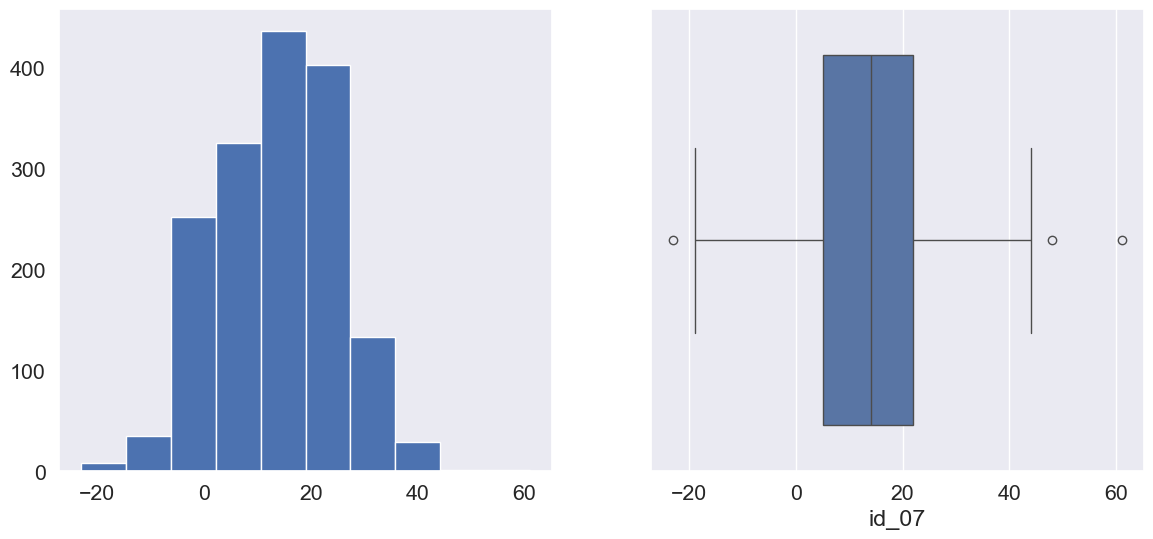

Column:  id_08
Skew: -0.95
Kurtosis:  0.21


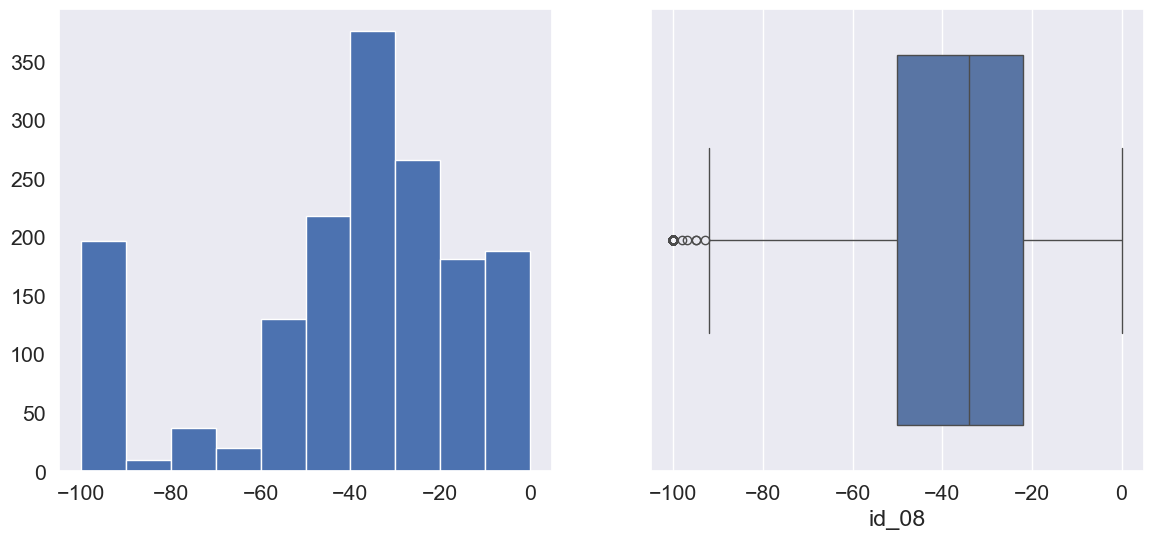

Column:  id_09
Skew: -1.08
Kurtosis:  88.83


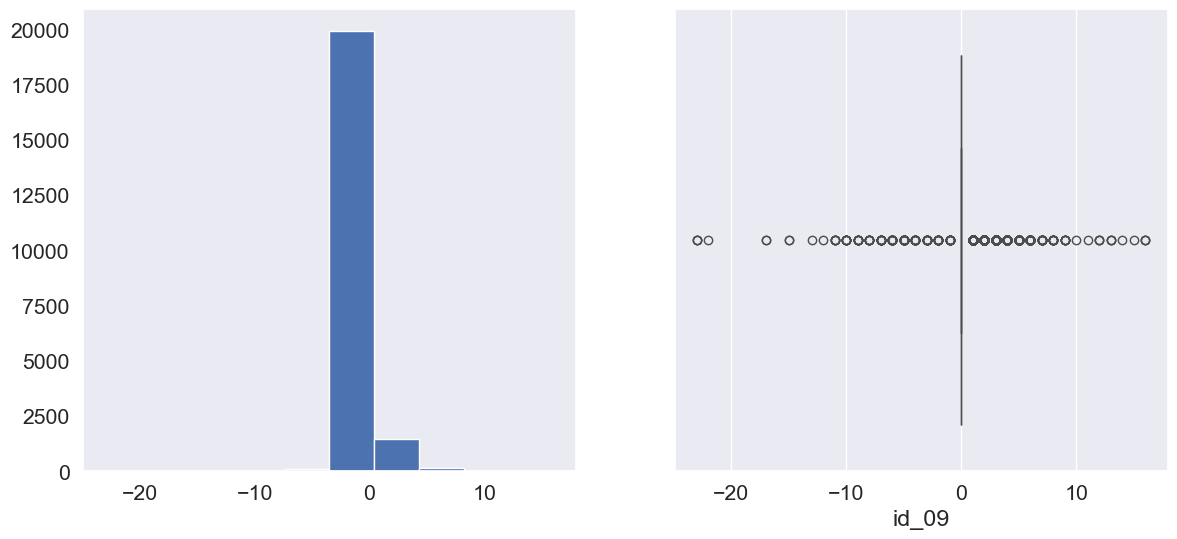

Column:  id_10
Skew: -15.67
Kurtosis:  390.02


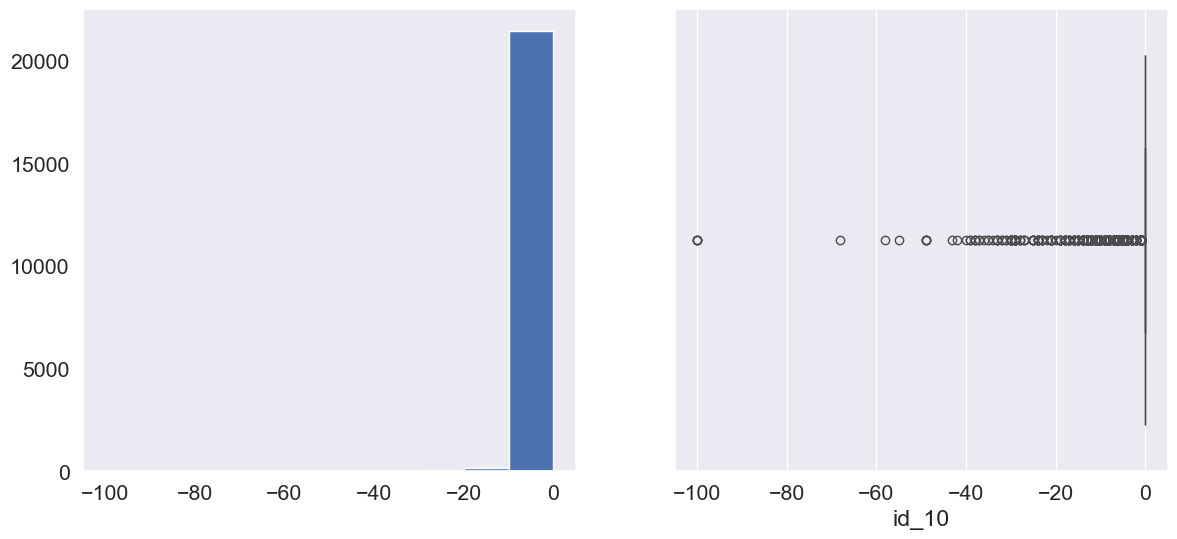

Column:  id_11
Skew: -4.3
Kurtosis:  19.63


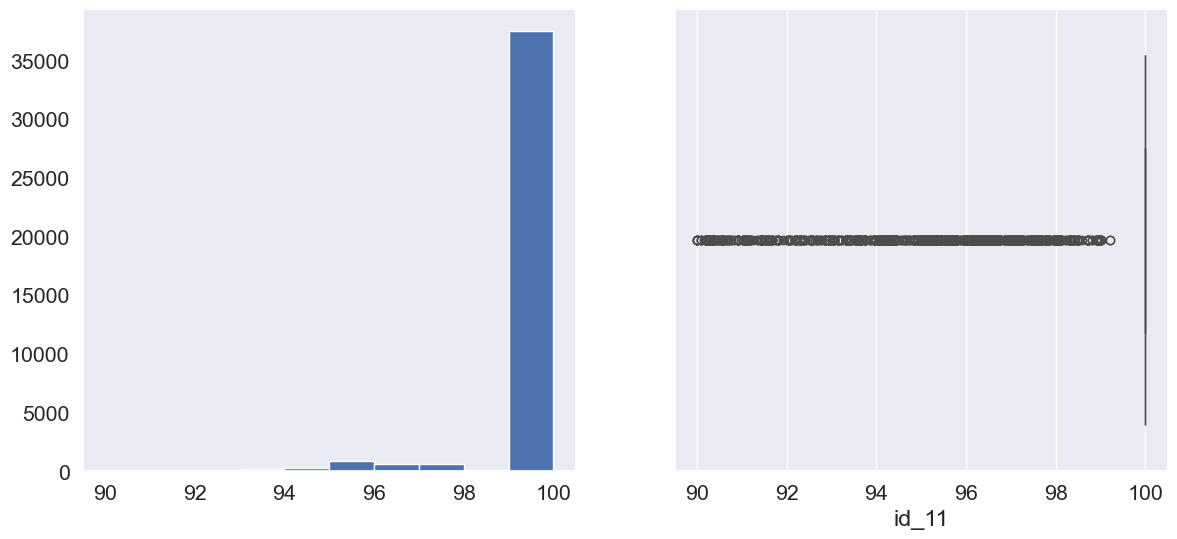

Column:  id_13
Skew: -2.37
Kurtosis:  4.68


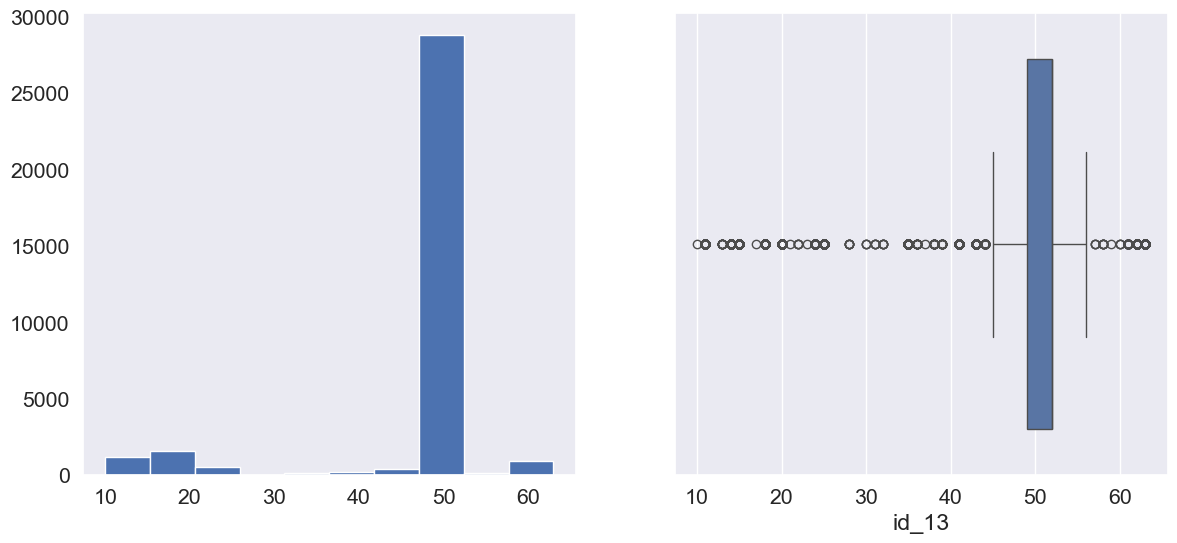

Column:  id_14
Skew: 2.45
Kurtosis:  27.42


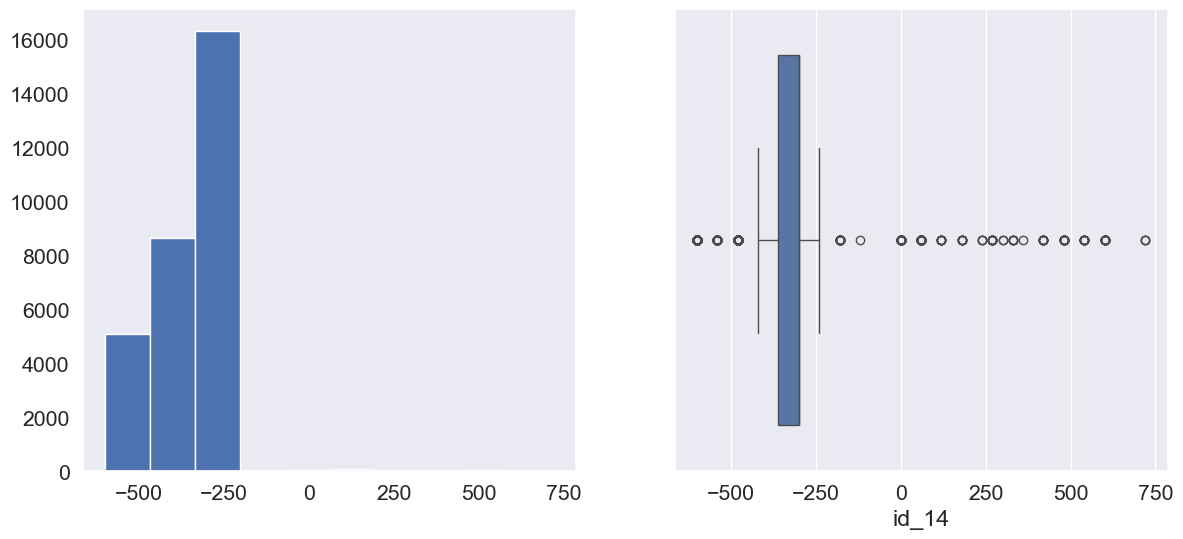

Column:  id_17
Skew: 0.98
Kurtosis:  0.21


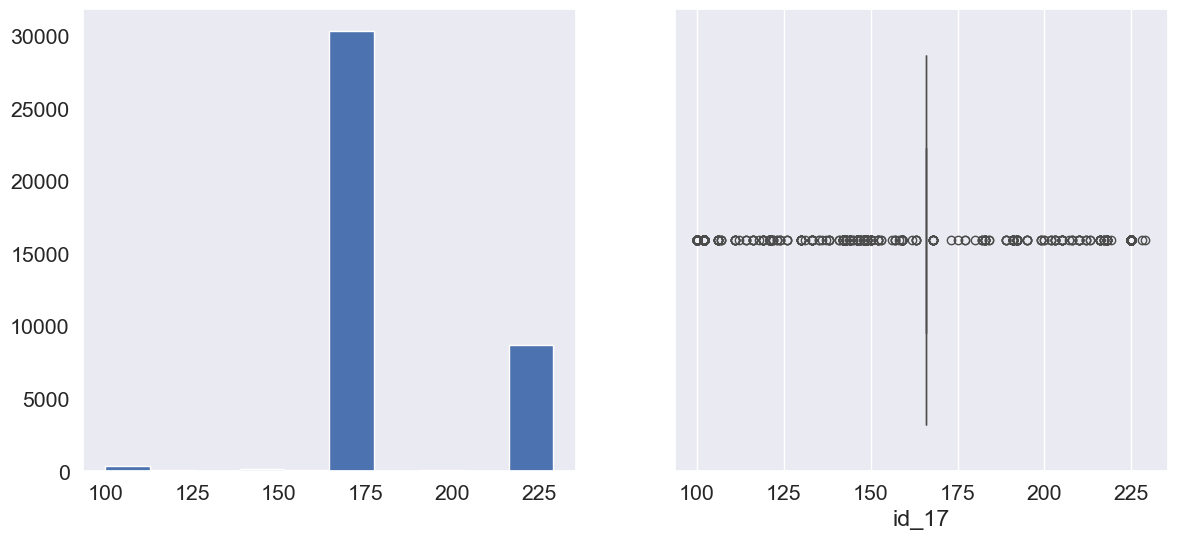

Column:  id_18
Skew: 1.66
Kurtosis:  9.56


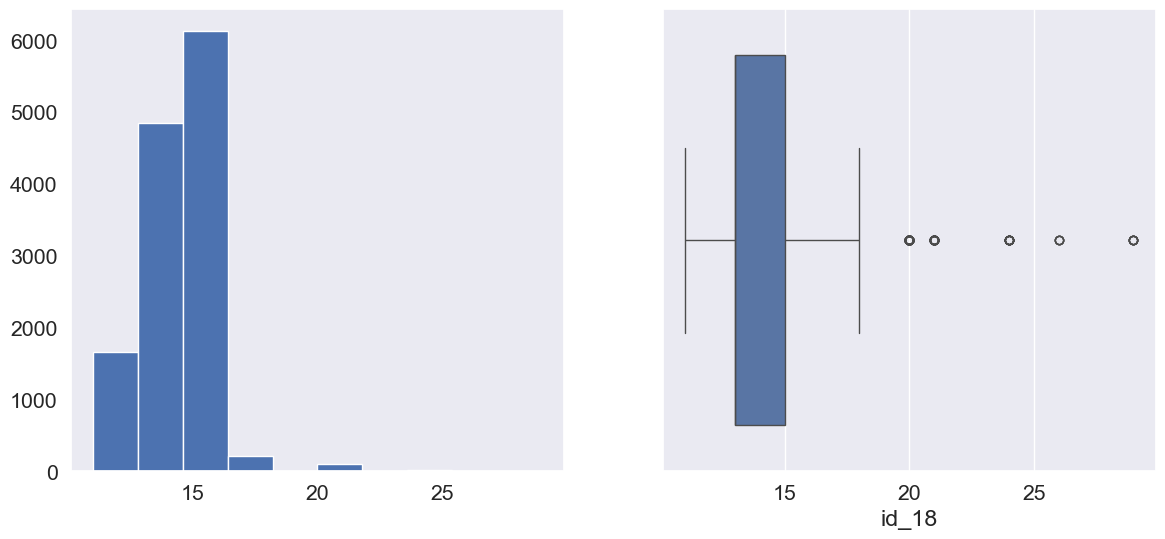

Column:  id_19
Skew: 0.03
Kurtosis:  -0.89


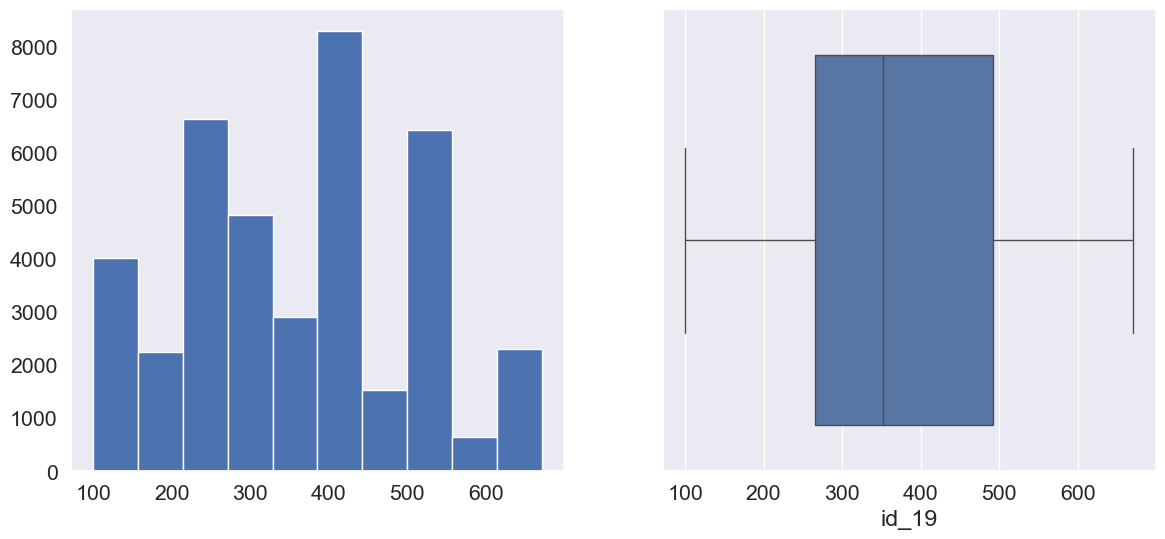

Column:  id_20
Skew: -0.1
Kurtosis:  -1.49


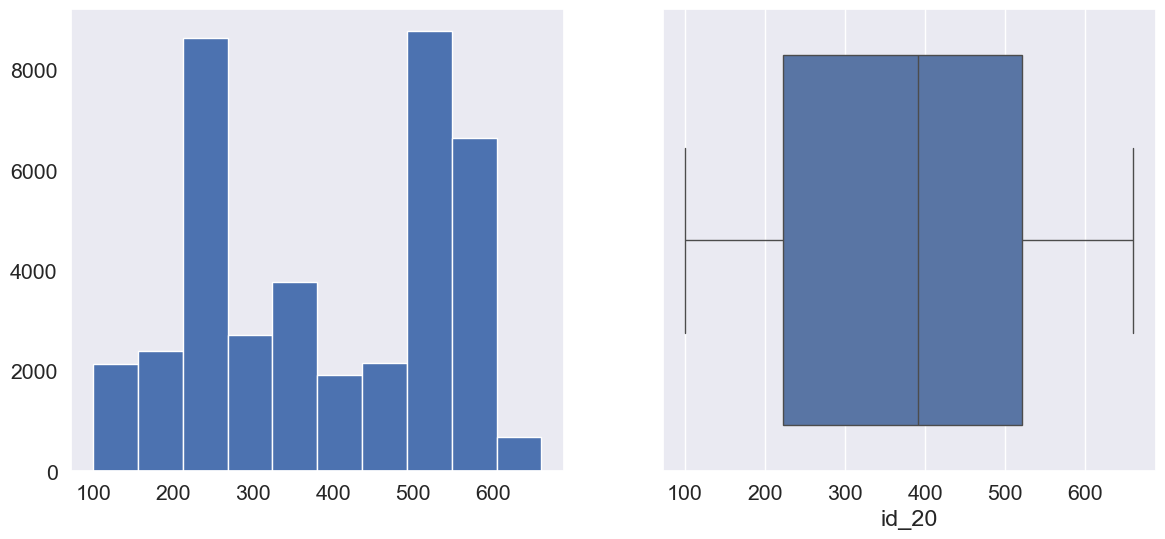

Column:  id_21
Skew: 0.9
Kurtosis:  -0.65


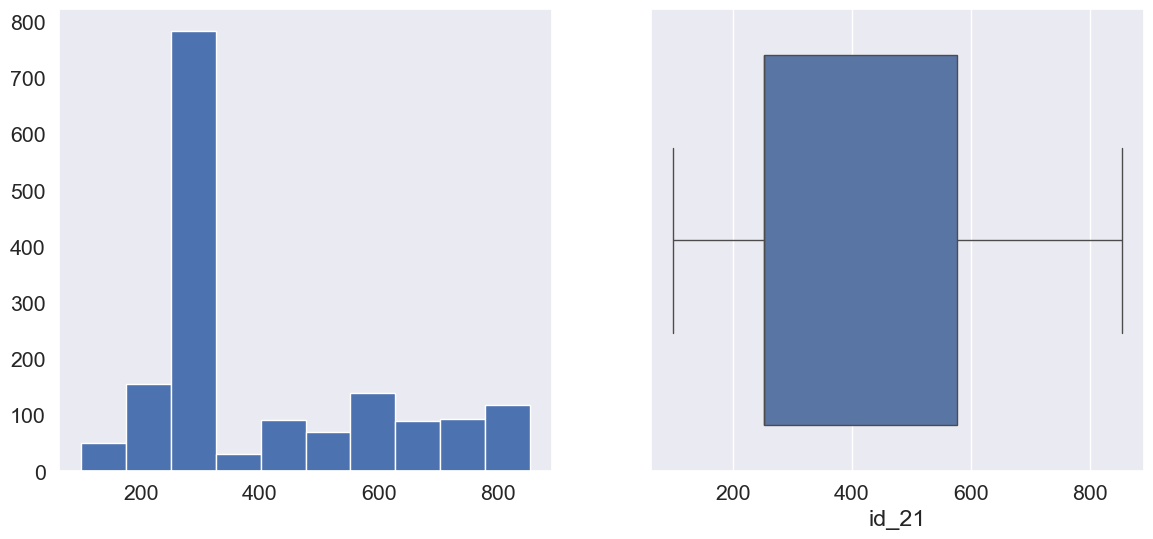

Column:  id_22
Skew: 3.83
Kurtosis:  12.87


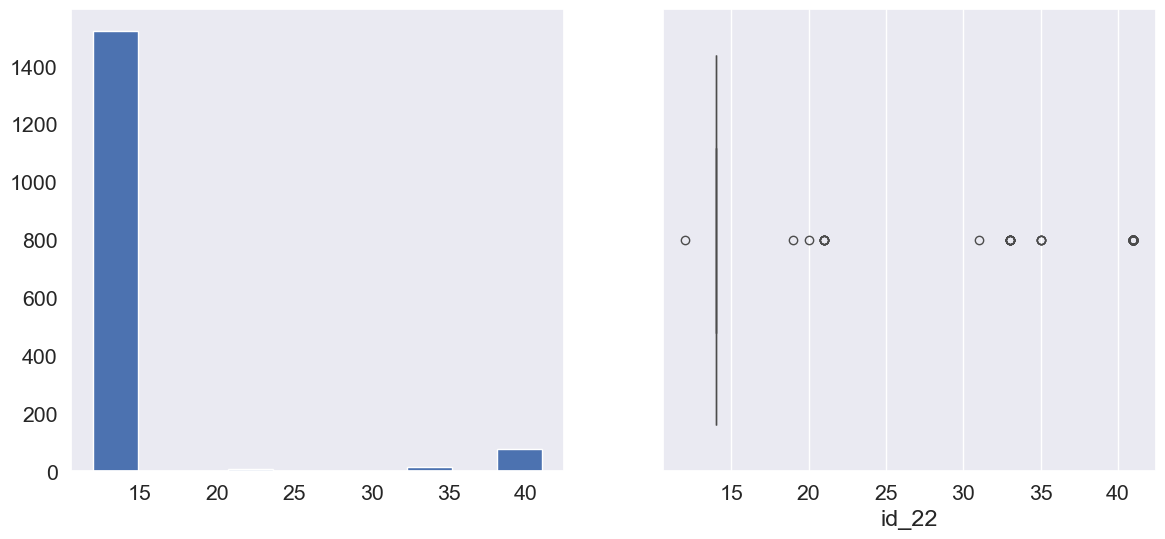

Column:  id_24
Skew: 0.27
Kurtosis:  -0.46


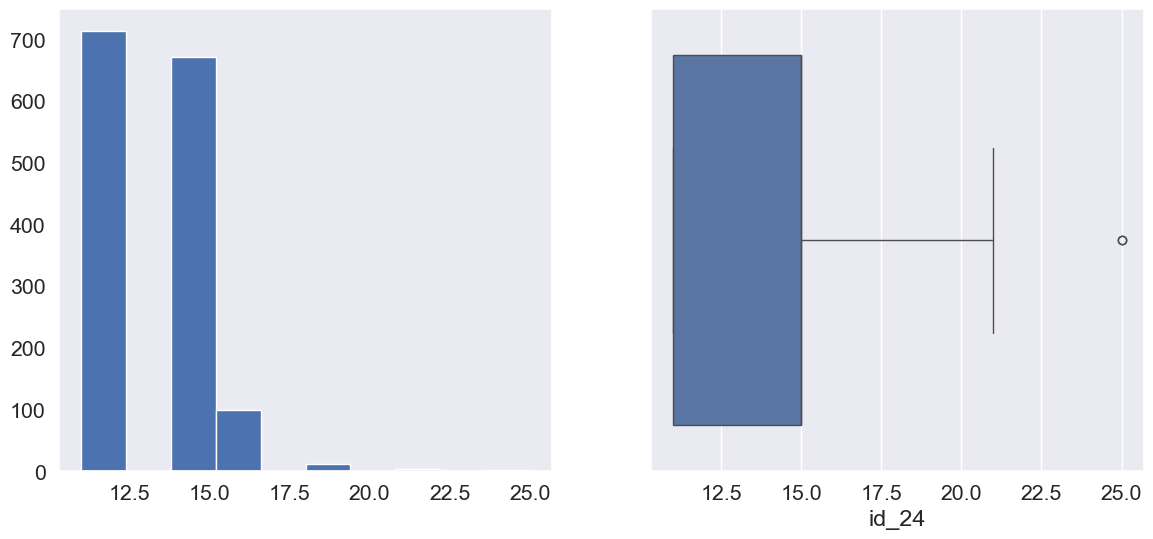

Column:  id_25
Skew: -0.0
Kurtosis:  -0.39


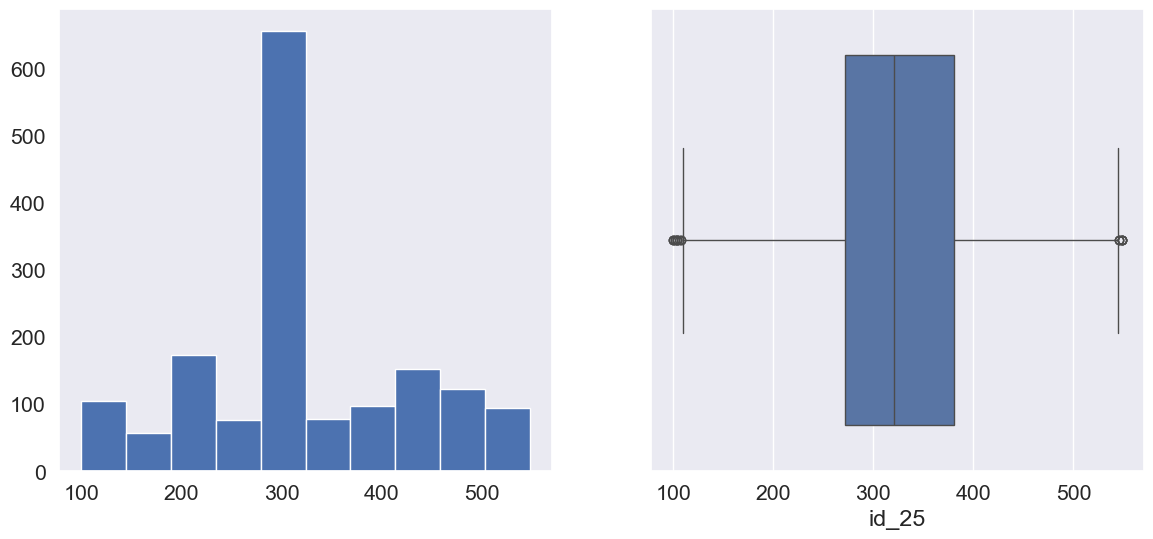

Column:  id_26
Skew: -0.01
Kurtosis:  -0.79


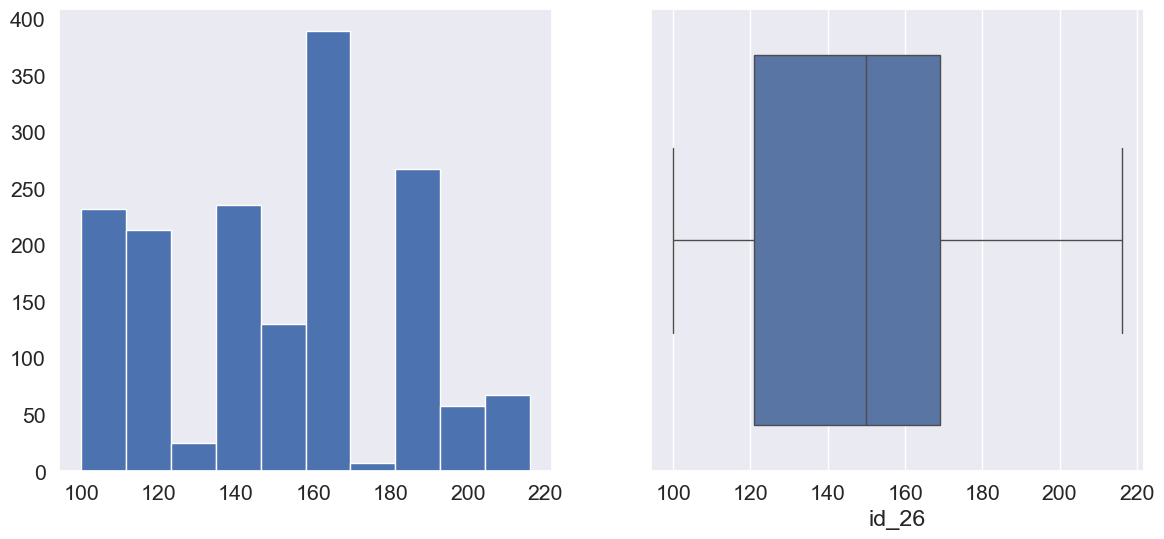

Column:  id_32
Skew: 0.87
Kurtosis:  -1.04


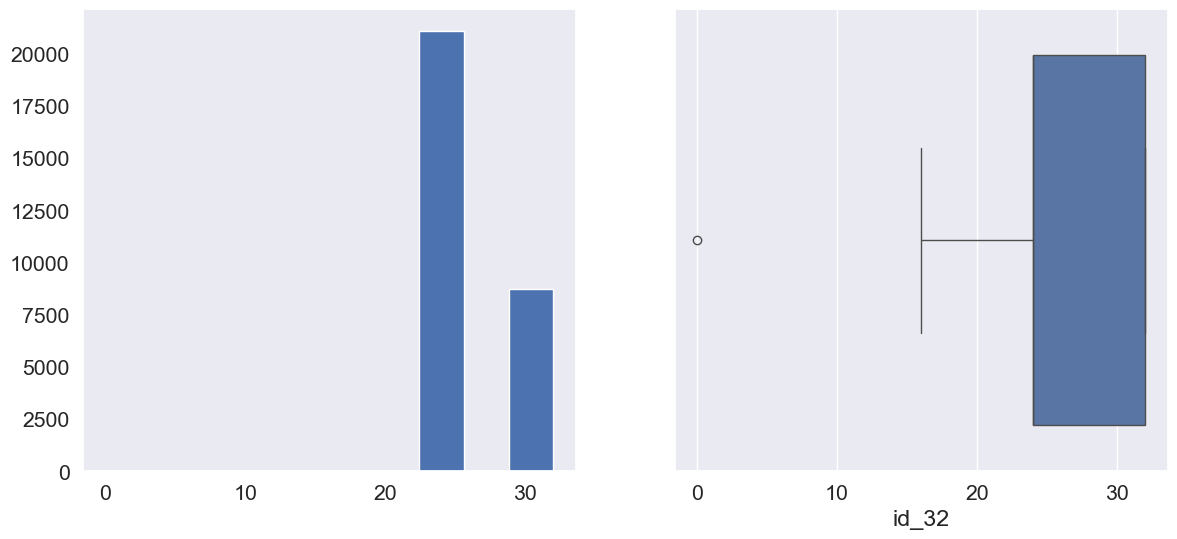

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = sdatos.select_dtypes(include=np.number).columns.tolist()
sns.set(font_scale=1.4)

for col in num_cols:
    if col.startswith('V') and col[1:].isdigit() and 1 <= int(col[1:]) <= 339:
        continue  
    print('Column: ', col)
    print('Skew:', round(sdatos[col].skew(), 2))
    print('Kurtosis: ', round(sdatos[col].kurtosis(), 2))
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sdatos[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=sdatos[col])
    plt.show()

id_32 ( 0.87 indica que la cola derecha de la distribución es más larga o pesada que la cola izquierda, lo que significa que hay valores más dispersos hacia la derecha de la distribución. El sesgo positivo sugiere que hay valores más dispersos hacia la derecha de la distribución, y la curtosis negativa indica que la distribución tiene colas más finas que una distribución normal. )

Solo se presenta un valor atipico en 0. 

ANALIZANDO CARD

In [16]:
sdatos.card1.value_counts()

card1
7919     2097
6019     2017
9500     2002
15885    1705
17188    1651
         ... 
12028       1
10794       1
5715        1
6776        1
12478       1
Name: count, Length: 7677, dtype: int64

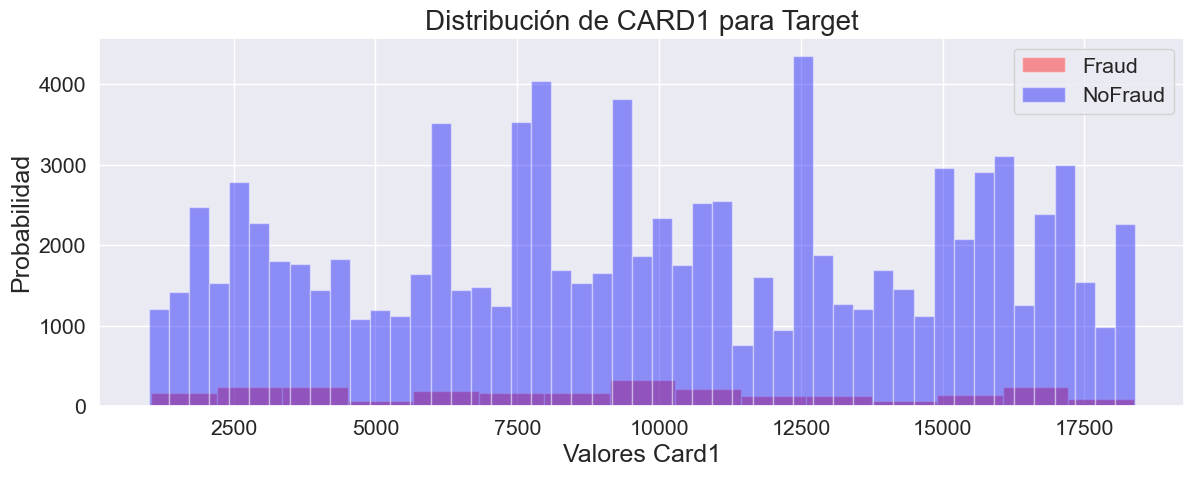

In [17]:
plt.figure(figsize=(14, 22))
plt.subplot(413)

g = sns.distplot(sdatos[sdatos['isFraud'] == 1]['card1'], color='red', kde=False, label='Fraud')
g = sns.distplot(sdatos[sdatos['isFraud'] == 0]['card1'], color='blue', kde=False, label='NoFraud')
g.legend()
g.set_title("Distribución de CARD1 para Target", fontsize=20)
g.set_xlabel("Valores Card1", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()

La gráfica anterior nos indica la distribución de valores para card 1 teniendo en cuenta la variable fraude, podemos observar  que existen transacciones heterogeneas con este tipo de card y en segundo lugar, existe un menor número de transacciones fraudulentas en esta carta.

CARD 2

In [18]:
sdatos.card2.value_counts()

card2
321.0    7754
111.0    7387
555.0    6787
583.0    6128
490.0    5743
         ... 
578.0       2
576.0       1
522.0       1
223.0       1
557.0       1
Name: count, Length: 499, dtype: int64

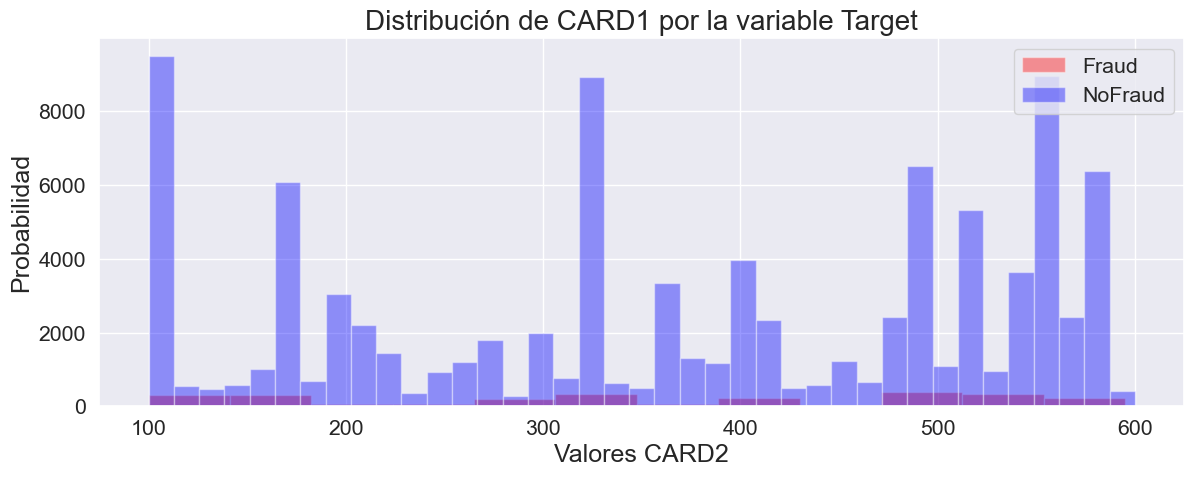

In [19]:
plt.figure(figsize=(14, 22))
plt.subplot(413)

g = sns.distplot(sdatos[sdatos['isFraud'] == 1]['card2'], color='red', kde=False, label='Fraud')
g = sns.distplot(sdatos[sdatos['isFraud'] == 0]['card2'], color='blue', kde=False, label='NoFraud')
g.legend()
g.set_title("Distribución de CARD1 por la variable Target", fontsize=20)
g.set_xlabel("Valores CARD2", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()

La gráfica anterior nos muestra la distribución de valores para card 2 teniendo en cuenta el fraude, podemos observar en primer lugar que existen transacciones con altos umbrales y bajos, esta carta parece que se usa más, y se hacen más transacciones con este tipo de tarjeta y en segundo lugar al igual que card 1, existe un menor número de transacciones fraudulentas en esta carta.

CARD 3

In [20]:
sdatos.card3.value_counts()

card3
150.0    88642
185.0     9666
144.0      281
106.0      183
146.0      169
         ...  
206.0        1
208.0        1
193.0        1
225.0        1
199.0        1
Name: count, Length: 74, dtype: int64

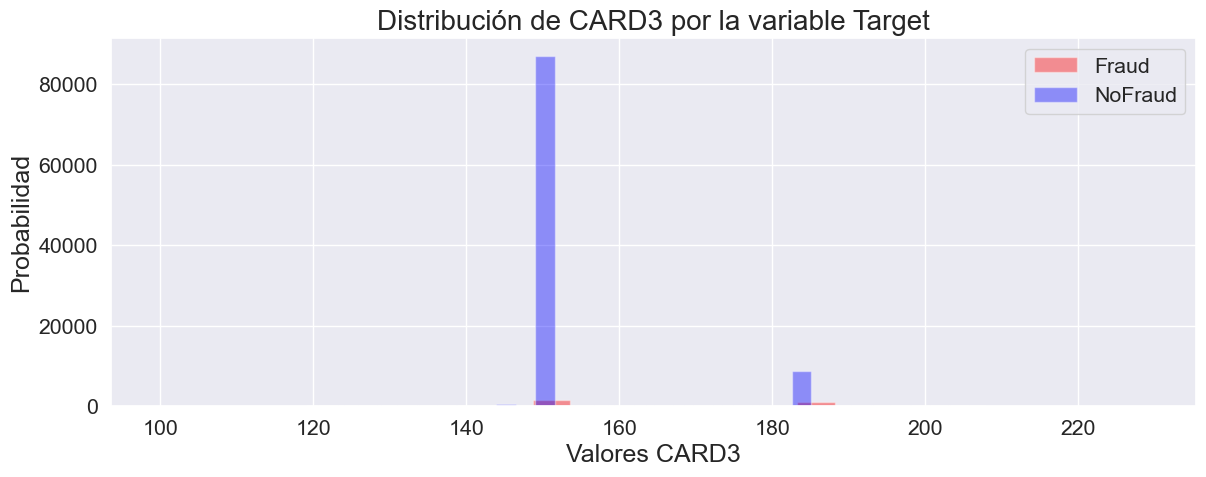

In [21]:
plt.figure(figsize=(14, 22))
plt.subplot(413)

g = sns.distplot(sdatos[sdatos['isFraud'] == 1]['card3'], color='red', kde=False, label='Fraud')
g = sns.distplot(sdatos[sdatos['isFraud'] == 0]['card3'], color='blue', kde=False, label='NoFraud')
g.legend()
g.set_title("Distribución de CARD3 por la variable Target", fontsize=20)
g.set_xlabel("Valores CARD3", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()

La gráfica muestra la distribución de valores para card 3 en relación con las transacciones fraudulentas. Se nota que esta card se usa menos frecuentemente, con un enfoque en valores intermedios. Además, al igual que card 1 y 2, presenta una menor incidencia de transacciones fraudulentas, lo que sugiere que las transacciones con esta card tienden a ser menos propensas a actividades fraudulentas en comparación con otros atributos.

CARD 4

In [22]:
sdatos.card4.value_counts()

card4
visa                65602
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64

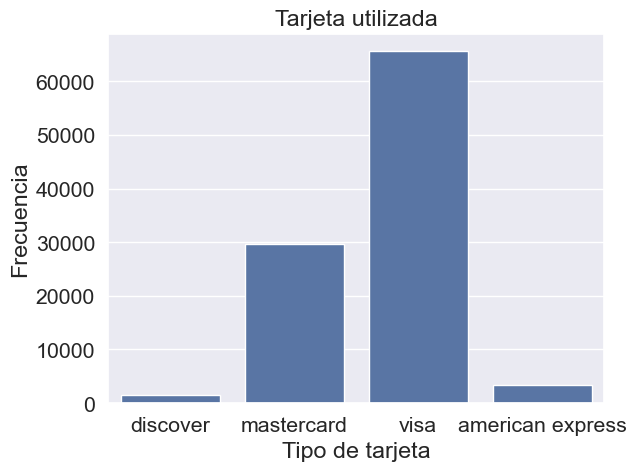

In [23]:
plt.title('Tarjeta utilizada')
sns.countplot(x=sdatos.card4)
plt.xlabel('Tipo de tarjeta')
plt.ylabel('Frecuencia')
plt.show()

En el gráfico, se destaca que la “Visa” es el tipo de tarjeta más utilizado, seguido de “MasterCard,” “American Express” y “Discover.” Esto sugiere que la mayoría de las transacciones se realizan con tarjetas Visa.

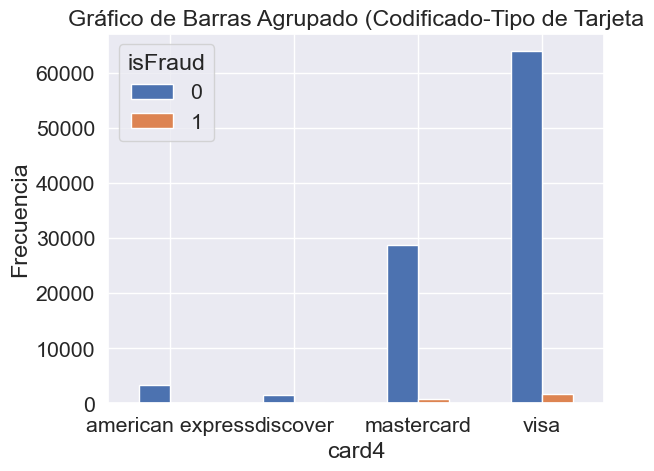

In [24]:
card4 = pd.crosstab(sdatos['card4'], sdatos['isFraud'])
ax = card4.plot(kind='bar', stacked=False)
ax.set_xticklabels(card4.index, rotation=0)
#etiquetas
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupado (Codificado-Tipo de Tarjeta')

plt.show()

En cuanto a las transacciones fraudulentas, se observa que, en general, hay un número relativamente bajo de casos de fraude. Sin embargo, en términos de la distribución de fraudes por tipo de tarjeta, las transacciones con tarjetas “Visa” muestran la mayor cantidad de casos de fraude.

CARD 5

In [25]:
sdatos.card5.value_counts()

card5
226.0    51346
224.0    12245
166.0     7677
102.0     5748
117.0     3579
         ...  
206.0        1
181.0        1
189.0        1
214.0        1
204.0        1
Name: count, Length: 87, dtype: int64

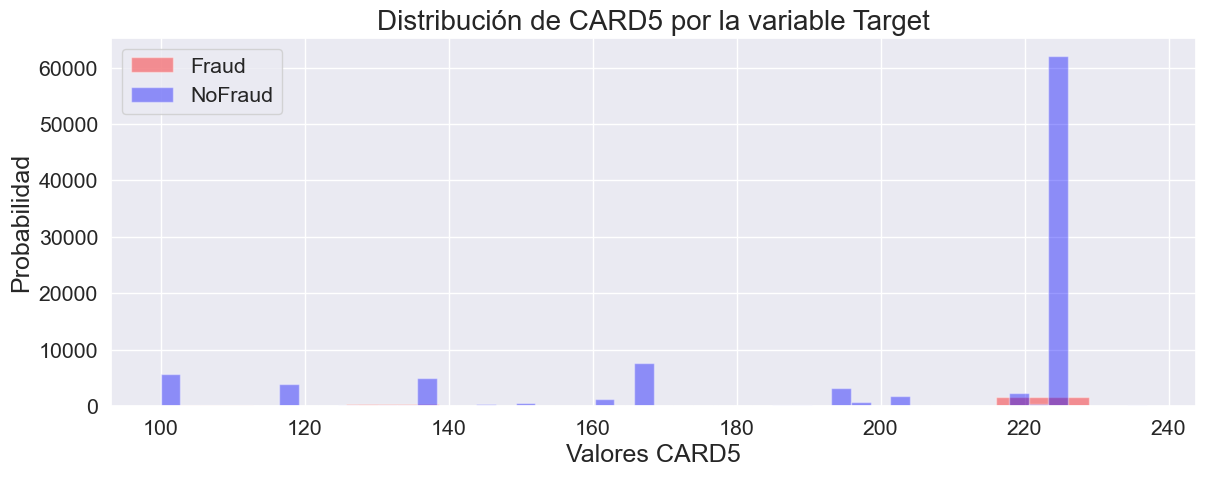

In [26]:
plt.figure(figsize=(14, 22))
plt.subplot(413)
g = sns.distplot(sdatos[sdatos['isFraud'] == 1]['card5'], color='red', kde=False, label='Fraud')
g = sns.distplot(sdatos[sdatos['isFraud'] == 0]['card5'], color='blue', kde=False, label='NoFraud')
g.legend()
g.set_title("Distribución de CARD5 por la variable Target", fontsize=20)
g.set_xlabel("Valores CARD5", fontsize=18)
g.set_ylabel("Probabilidad", fontsize=18)

plt.show()

La distribución de card 5 es similar a la de card 3, aunque se utiliza un poco más. Se observa que hay un mayor número de transacciones con montos alrededor de 220, y es en este punto donde se detecta la mayor concentración de transacciones fraudulentas asociadas a esta card. Esto sugiere que las transacciones con valores cercanos a 220 en la tarjeta 5 son más propensas a estar relacionadas con actividades fraudulentas en comparación con otros valores.

CARD 6

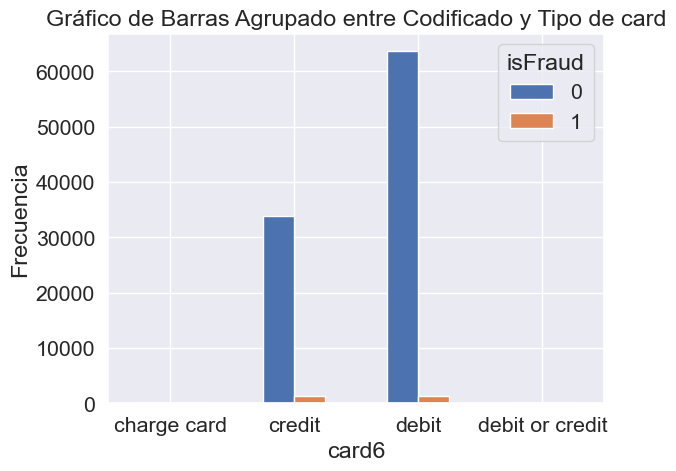

In [27]:
card6 = pd.crosstab(sdatos['card6'], sdatos['isFraud'])
ax = card6.plot(kind='bar', stacked=False)
ax.set_xticklabels(card6.index, rotation=0)
#etiquetas
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras Agrupado entre Codificado y Tipo de card')

plt.show()

El gráfico muestra que las transacciones con tarjetas de débito son más comunes que las de crédito, y que el número de transacciones fraudulentas es similar, pero mayor en las tarjetas de débito. Esto podría indicar una mayor vulnerabilidad al fraude en las tarjetas de débito, ya que están vinculadas directamente a cuentas bancarias, lo que podría atraer a los defraudadores. Las tarjetas de crédito suelen contar con más medidas de seguridad, lo que podría explicar la menor incidencia de fraudes en ellas.

VALORES FALTANTES 

In [28]:
faltantes = sdatos.isnull().sum()
f_df = pd.DataFrame(faltantes, columns=['Cantidad de Faltantes'])

In [29]:
porcentaje = (faltantes / len(sdatos)) * 100
p_df = pd.DataFrame({
    'Columna': faltantes.index,   
    'Valores Faltantes': faltantes.values,  
    'Porcentaje Faltante': porcentaje.values
})

Esta función calcula el porcentaje de valores faltantes en cada columna de d0 y se crea un nuevo DF llamado p_df que muestra la columna, la cantidad de valores faltantes y el porcentaje de faltantes para cada atributo del set de datos.

In [30]:
p_df.value_counts()

Columna  Valores Faltantes  Porcentaje Faltante
C1       0                  0.000                  1
V314     0                  0.000                  1
V324     68229              68.229                 1
V323     68229              68.229                 1
V322     68229              68.229                 1
                                                  ..
V185     60417              60.417                 1
V184     60417              60.417                 1
V183     60417              60.417                 1
V182     60417              60.417                 1
isFraud  0                  0.000                  1
Name: count, Length: 434, dtype: int64

In [31]:
corte = 0.7
porcentaje = (sdatos.isnull().sum() / len(sdatos)).sort_values(ascending=False)

In [32]:
c_vacias = porcentaje[porcentaje > corte].index

In [33]:
dv = sdatos.drop(columns=c_vacias)

Se eliminan las columnas que poseen contenidos nulos.

In [34]:
dv


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0            2987000        0          86400          68.500         W  13926   
1            2987001        0          86401          29.000         W   2755   
2            2987002        0          86469          59.000         W   4663   
3            2987003        0          86499          50.000         W  18132   
4            2987004        0          86506          50.000         H   4497   
...              ...      ...            ...             ...       ...    ...   
99995        3086995        0        2005989          55.385         C   2256   
99996        3086996        0        2006074         117.000         W   2518   
99997        3086997        0        2006135          50.000         S   2748   
99998        3086998        0        2006177         100.000         H  16075   
99999        3086999        0        2006364         107.950         W   4436   

       card2  card3       card4  card5  ...  id_20  id_28     id_29  \
0        NaN  150.0    discover  142.0  ...    NaN    NaN       NaN   
1      404.0  150.0  mastercard  102.0  ...    NaN    NaN       NaN   
2      490.0  150.0        visa  166.0  ...    NaN    NaN       NaN   
3      567.0  150.0  mastercard  117.0  ...    NaN    NaN       NaN   
4      514.0  150.0  mastercard  102.0  ...  144.0    New  NotFound   
...      ...    ...         ...    ...  ...    ...    ...       ...   
99995  545.0  185.0        visa  226.0  ...  507.0    New  NotFound   
99996  555.0  150.0        visa  226.0  ...    NaN    NaN       NaN   
99997  111.0  150.0        visa  228.0  ...  161.0  Found     Found   
99998  514.0  150.0  mastercard  102.0  ...  222.0    New  NotFound   
99999  174.0  150.0        visa  226.0  ...    NaN    NaN       NaN   

                         id_31 id_35 id_36  id_37  id_38  DeviceType  \
0                          NaN   NaN   NaN    NaN    NaN         NaN   
1                          NaN   NaN   NaN    NaN    NaN         NaN   
2                          NaN   NaN   NaN    NaN    NaN         NaN   
3                          NaN   NaN   NaN    NaN    NaN         NaN   
4          samsung browser 6.2     T     F      T      T      mobile   
...                        ...   ...   ...    ...    ...         ...   
99995  mobile safari uiwebview     F     F      F      T      mobile   
99996                      NaN   NaN   NaN    NaN    NaN         NaN   
99997              chrome 63.0     T     F      T      T     desktop   
99998           safari generic     T     F      F      T     desktop   
99999                      NaN   NaN   NaN    NaN    NaN         NaN   

                          DeviceInfo  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4      SAMSUNG SM-G892A Build/NRD90M  
...                              ...  
99995                            NaN  
99996                            NaN  
99997                          MacOS  
99998                          MacOS  
99999                            NaN  

[100000 rows x 393 columns]

ELIMINACION-CORRELACION

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [36]:
for f in dv.drop('isFraud', axis=1).columns:
    if dv[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(dv[f].values))
        dv[f] = lbl.transform(list(dv[f].values))

In [37]:
corte = 0.7 #Se establecen altas correlaciones
porcentajev = (sdatos.isnull().sum() / len(sdatos)).sort_values(ascending=False)

In [38]:
columnas_vacias = porcentajev[porcentajev > corte].index #Se eliman aquellas columnas con valor mayor al punto de corte

Se genera una matriz de correlación  y se seleccionan los valores debajo de la diagonal principal. Luego, se identifican y retienen las correlaciones que superan el umbral de 0.70, mientras que las demás se eliminan. Este proceso ayuda a resaltar las relaciones fuertes entre las variables, simplificando el análisis de correlación.

In [39]:
c_m = dv.corr().abs()
upper = c_m.where(np.triu(np.ones(c_m.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
d1=dv.drop(dv[to_drop], axis=1)

In [40]:
d1

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  card3  \
0            2987000        0          68.500          4  13926    NaN  150.0   
1            2987001        0          29.000          4   2755  404.0  150.0   
2            2987002        0          59.000          4   4663  490.0  150.0   
3            2987003        0          50.000          4  18132  567.0  150.0   
4            2987004        0          50.000          1   4497  514.0  150.0   
...              ...      ...             ...        ...    ...    ...    ...   
99995        3086995        0          55.385          0   2256  545.0  185.0   
99996        3086996        0         117.000          4   2518  555.0  150.0   
99997        3086997        0          50.000          3   2748  111.0  150.0   
99998        3086998        0         100.000          1  16075  514.0  150.0   
99999        3086999        0         107.950          4   4436  174.0  150.0   

       card4  card5  card6  ...  id_01     id_02  id_05  id_06  id_11  id_13  \
0          1  142.0      1  ...    NaN       NaN    NaN    NaN    NaN    NaN   
1          2  102.0      1  ...    NaN       NaN    NaN    NaN    NaN    NaN   
2          4  166.0      2  ...    NaN       NaN    NaN    NaN    NaN    NaN   
3          2  117.0      2  ...    NaN       NaN    NaN    NaN    NaN    NaN   
4          2  102.0      1  ...    0.0   70787.0    NaN    NaN  100.0    NaN   
...      ...    ...    ...  ...    ...       ...    ...    ...    ...    ...   
99995      4  226.0      1  ...  -35.0  407847.0   -6.0   -7.0  100.0   49.0   
99996      4  226.0      2  ...    NaN       NaN    NaN    NaN    NaN    NaN   
99997      4  228.0      1  ...    0.0   60547.0    0.0    0.0  100.0    NaN   
99998      2  102.0      1  ...   -5.0  179805.0    0.0   -1.0  100.0   49.0   
99999      4  226.0      2  ...    NaN       NaN    NaN    NaN    NaN    NaN   

       id_14  id_19  id_20  DeviceInfo  
0        NaN    NaN    NaN         840  
1        NaN    NaN    NaN         840  
2        NaN    NaN    NaN         840  
3        NaN    NaN    NaN         840  
4     -480.0  542.0  144.0         423  
...      ...    ...    ...         ...  
99995    NaN  345.0  507.0         840  
99996    NaN    NaN    NaN         840  
99997 -300.0  312.0  161.0         318  
99998 -480.0  312.0  222.0         318  
99999    NaN    NaN    NaN         840  

[100000 rows x 94 columns]

Después de este proceso, se observa una reducción de dimensiones, donde el número de variables se reduce. Esto implica que se han preservado únicamente las correlaciones significativas, simplificando el conjunto de datos al eliminar las variables con correlaciones débiles o redundantes.

Rellanando las columnas NaN con la Mediana

In [41]:
column_medians = d1.median()
d1 = d1.fillna(column_medians)
d1

TransactionID  isFraud  TransactionAmt  ProductCD  card1  card2  card3  \
0            2987000        0          68.500          4  13926  387.0  150.0   
1            2987001        0          29.000          4   2755  404.0  150.0   
2            2987002        0          59.000          4   4663  490.0  150.0   
3            2987003        0          50.000          4  18132  567.0  150.0   
4            2987004        0          50.000          1   4497  514.0  150.0   
...              ...      ...             ...        ...    ...    ...    ...   
99995        3086995        0          55.385          0   2256  545.0  185.0   
99996        3086996        0         117.000          4   2518  555.0  150.0   
99997        3086997        0          50.000          3   2748  111.0  150.0   
99998        3086998        0         100.000          1  16075  514.0  150.0   
99999        3086999        0         107.950          4   4436  174.0  150.0   

       card4  card5  card6  ...  id_01     id_02  id_05  id_06  id_11  id_13  \
0          1  142.0      1  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   
1          2  102.0      1  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   
2          4  166.0      2  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   
3          2  117.0      2  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   
4          2  102.0      1  ...    0.0   70787.0    0.0    0.0  100.0   52.0   
...      ...    ...    ...  ...    ...       ...    ...    ...    ...    ...   
99995      4  226.0      1  ...  -35.0  407847.0   -6.0   -7.0  100.0   49.0   
99996      4  226.0      2  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   
99997      4  228.0      1  ...    0.0   60547.0    0.0    0.0  100.0   52.0   
99998      2  102.0      1  ...   -5.0  179805.0    0.0   -1.0  100.0   49.0   
99999      4  226.0      2  ...   -5.0  102450.0    0.0    0.0  100.0   52.0   

       id_14  id_19  id_20  DeviceInfo  
0     -300.0  352.0  391.0         840  
1     -300.0  352.0  391.0         840  
2     -300.0  352.0  391.0         840  
3     -300.0  352.0  391.0         840  
4     -480.0  542.0  144.0         423  
...      ...    ...    ...         ...  
99995 -300.0  345.0  507.0         840  
99996 -300.0  352.0  391.0         840  
99997 -300.0  312.0  161.0         318  
99998 -480.0  312.0  222.0         318  
99999 -300.0  352.0  391.0         840  

[100000 rows x 94 columns]

ARBOL DE DECISION 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_a = d1.drop('isFraud', axis=1)
y_a = d1['isFraud']
cls1=DecisionTreeClassifier(max_depth=3)
modelo=cls1.fit(X_a,y_a)
y_a.shape

(100000,)

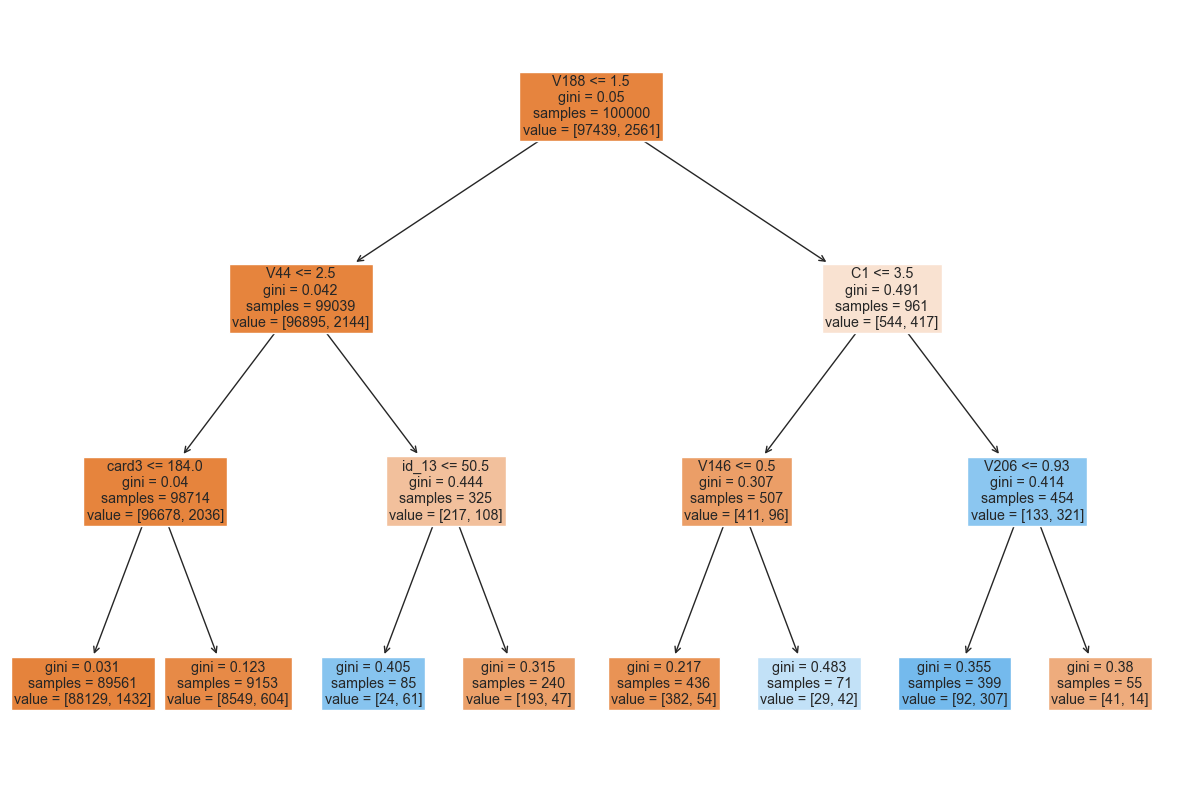

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, feature_names=X_a.columns, filled=True)
plt.show()

La implementación de un árbol de decisión es valiosa en el Análisis Exploratorio de Datos ya que puede ofrecer indicios sobre las variables que podrían ser más relevantes para el problema. En este caso, se destaca que la variable V44 parece ser la más influyente para clasificar el fraude en el conjunto de datos.

PUNTO 5 (IMPLEMENTACION DE MODELOS CLASIFICACION)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import balanced_accuracy_score 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
knn_model = KNeighborsClassifier()
ridge_model = RidgeClassifier(random_state=123)
lasso_model = LogisticRegression(random_state=123)
nb_model = GaussianNB()
xb_model = XGBClassifier()
svm_model = SVC(random_state=123)
mlp_classifier = MLPClassifier(random_state=123)

In [45]:
DATOS=d1

In [46]:
X = DATOS.drop('isFraud',axis=1)
y = DATOS['isFraud']

Division de datos en conjunto de entrenamiento y prueba

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

MODELO LASSO

In [48]:
M_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123))])
M_lasso.fit(X_train, y_train)
print(classification_report(y_test, M_lasso.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97827   0.99908   0.98856     19508
           1    0.76623   0.11992   0.20738       492

    accuracy                        0.97745     20000
   macro avg    0.87225   0.55950   0.59797     20000
weighted avg    0.97305   0.97745   0.96935     20000



Estos resultados son de un modelo sin ajuste (por defecto). El modelo muestra una alta precisión y exhaustividad para la clase no fraude (0), con puntajes de 97.83% y 99.90%, respectivamente. Sin embargo, en la detección de fraude (clase 1), la precisión es del 76.62% y la exhaustividad es del 11.99%, lo que indica que se pueden mejorar las capacidades de detección de fraudes. El puntaje F1 ponderado es de 0.9693, reflejando el rendimiento general del modelo.

In [49]:
param_grid_lasso = {'lasso__penalty':['l1','l2'],
                    'lasso__fit_intercept':[True, False],
                    'lasso__C':[1000,0.01]
                    }

In [50]:
pipe_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123))])
grid_lasso = GridSearchCV(pipe_lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1, scoring='roc_auc')
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        LogisticRegression(random_state=123))]),
             n_jobs=-1,
             param_grid={'lasso__C': [1000, 0.01],
                         'lasso__fit_intercept': [True, False],
                         'lasso__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [51]:
print("Best params:\n{}\n".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))
print("Test-set score: {:.2f}".format(grid_lasso.best_estimator_.score(X_test, y_test)))

Best params:
{'lasso__C': 0.01, 'lasso__fit_intercept': True, 'lasso__penalty': 'l2'}

Best cross-validation score: 0.81
Test-set score: 0.98


El mejor modelo Lasso se obtien con C:0.01, Intercepto y penalty de 12. Esta combinación de párametros garantizan un auc en la validación de 0.81.

In [52]:
best_params_lasso = grid_lasso.best_params_
params_lasso ={key.split('__')[-1]:param for key, param in best_params_lasso.items()} 
best_pipe_lasso = Pipeline([('scaler',StandardScaler()), ('lasso',LogisticRegression(random_state=123, **params_lasso))])
best_pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', LogisticRegression(C=0.01, random_state=123))])

In [53]:
print(classification_report(y_test, best_pipe_lasso.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97807   0.99923   0.98854     19508
           1    0.78571   0.11179   0.19573       492

    accuracy                        0.97740     20000
   macro avg    0.88189   0.55551   0.59213     20000
weighted avg    0.97334   0.97740   0.96904     20000



Resultados posteriores al ajuste (tuning) del modelo son similares a los resultados anteriores: Precisión y exhaustividad para la clase 0 siguen siendo 97.80% y 99.92%, mientras que para la clase 1, la precisión es 78.57% y la exhaustividad es 11.17%. Puntaje F1 ponderado sigue siendo 0.9690. Indica que el ajuste de hiperparámetros no tuvo un impacto significativo en el rendimiento del modelo.

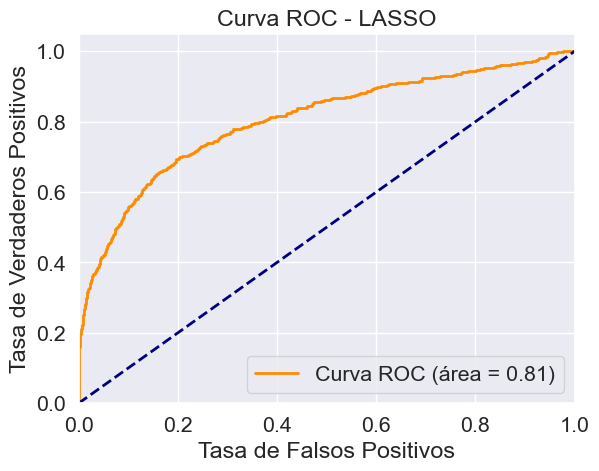

In [54]:
y_scores_lasso = best_pipe_lasso.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_lasso)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - LASSO')
plt.legend(loc="lower right")
plt.show()

In [55]:
lasso_score = roc_auc_score(y_test, best_pipe_lasso.predict_proba(X_test)[:,1])
print("LASSO AUC-ROC Score:", lasso_score)

LASSO AUC-ROC Score: 0.8056714485281002


El puntaje AUC-ROC para LASSO es de 0.805, indicando un rendimiento razonable en la capacidad de clasificación.

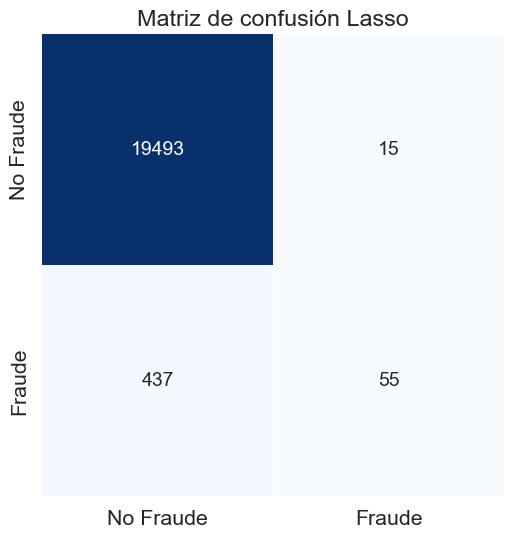

In [56]:
cm_lasso = confusion_matrix(y_test, best_pipe_lasso.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Lasso")
plt.show()

La matriz de confunsión de confusión enfatiza que el modelo es muy bueno para clasificar la categoría No fraude, sin embargo también tiene algunos errores.

In [57]:
table = [
    {'Modelo': 'Lasso', 'precision 0': 0.9780, 'precision 1': 0.7662, 'recall 0': 0.9992 , 'recall 1': 0.1117 ,'f1-score 0': 0.9885, 'f1-score 1': 0.1957, 'AUC': 0.8056}, ]

MODELO RIDGE

In [58]:
pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge', RidgeClassifier(random_state=123))])
pipe_ridge.fit(X_train, y_train)
print(classification_report(y_test, pipe_ridge.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97618   0.99995   0.98792     19508
           1    0.94118   0.03252   0.06287       492

    accuracy                        0.97615     20000
   macro avg    0.95868   0.51623   0.52539     20000
weighted avg    0.97532   0.97615   0.96516     20000



Los resultados del modelo Ridge sin ajuste de hiperparámetros muestran una alta precisión (97.61%) y exhaustividad (99.99%) para la clase no fraude (0), indicando que se clasifican correctamente la mayoría de las transacciones no fraudulentas. Sin embargo, en la detección de fraude (clase 1), la precisión es del 94.11%, mientras que la exhaustividad es baja (3.25%), lo que sugiere una limitada capacidad para detectar transacciones fraudulentas. El puntaje F1 ponderado es de 0.96516, reflejando el rendimiento global del modelo sin ajuste de hiperparámetros.

In [59]:
param_grid_ridge = {'ridge__alpha':[0.1, 1.0, 10, 100],
                    'ridge__fit_intercept':[True, False],
                    }

In [60]:
pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge',RidgeClassifier(random_state=123))])
grid_ridge = GridSearchCV(pipe_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='roc_auc')
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        RidgeClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.1, 1.0, 10, 100],
                         'ridge__fit_intercept': [True, False]},
             scoring='roc_auc')

In [61]:
print("Best params:\n{}\n".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))
print("Test-set score: {:.2f}".format(grid_ridge.best_estimator_.score(X_test, y_test)))

Best params:
{'ridge__alpha': 100, 'ridge__fit_intercept': True}

Best cross-validation score: 0.80
Test-set score: 0.98


Los mejores parámetros de ajuste (tuning) para el modelo Ridge son: ‘alpha’: 100 y ‘fit_intercept’: Verdadero Con estos ajustes, el modelo alcanzó un puntaje de validación cruzada del 80% y un puntaje del 98% en el conjunto de prueba, lo que indica un alto rendimiento y capacidad de generalización del modelo. Estos ajustes ayudaron a mejorar el desempeño del modelo en comparación con la configuración por defecto.

In [62]:
best_params_ridge = grid_ridge.best_params_
params_ridge ={key.split('__')[-1]:param for key, param in best_params_ridge.items()} 
best_pipe_ridge = Pipeline([('scaler',StandardScaler()), ('ridge',RidgeClassifier(random_state=123, **params_ridge))])
best_pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', RidgeClassifier(alpha=100, random_state=123))])

In [63]:
print(classification_report(y_test, best_pipe_ridge.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97618   0.99995   0.98792     19508
           1    0.94118   0.03252   0.06287       492

    accuracy                        0.97615     20000
   macro avg    0.95868   0.51623   0.52539     20000
weighted avg    0.97532   0.97615   0.96516     20000



Estos resultados corresponden al modelo Ridge con los mejores hiperparámetros ajustados y el impacto de estos sobre el modelo. El modelo muestra una alta precisión (97.618%) y exhaustividad (99.95%) para la clase no fraude (0), lo que indica una correcta clasificación de la mayoría de las transacciones no fraudulentas. Sin embargo, en la detección de fraude (clase 1), la precisión es del 94.11%, pero la exhaustividad es baja (3.25%), lo que sugiere una capacidad limitada para detectar transacciones fraudulentas. El puntaje F1 ponderado es de 0.96516, reflejando el rendimiento global del modelo después del ajuste de hiperparámetros.

In [64]:
table.append( 
    {'Modelo': 'Ridge', 'precision 0': 0.97618, 'precision 1': 0.9411,'recall 0': 0.9995 , 'recall 1': 0.0325, 'f1-score 0': 0.98792, 'f1-score 1': 0.06287, 'AUC': 0.78},)

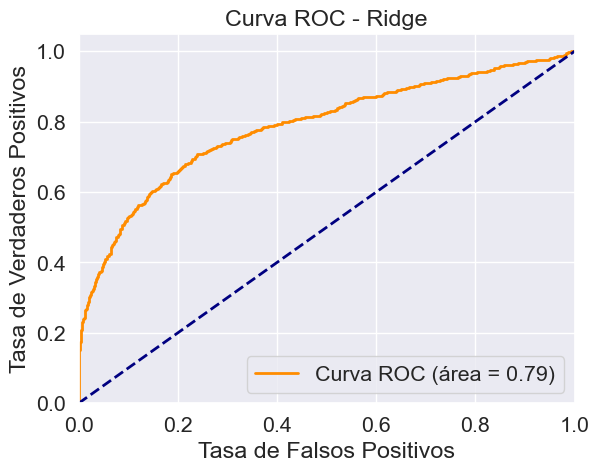

In [65]:
y_scores_ridge = best_pipe_ridge.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores_ridge)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Ridge')
plt.legend(loc="lower right")
plt.show()

In [66]:
ridge_score = roc_auc_score(y_test, best_pipe_ridge.decision_function(X_test))
print("RIDGE AUC-ROC Score:", ridge_score)

RIDGE AUC-ROC Score: 0.7863638598965443


El puntaje AUC-ROC para el modelo Ridge es de aproximadamente 0.763, lo que indica su capacidad para distinguir entre clases positivas y negativas. Aunque 0.763 no es óptimo, sigue siendo una métrica razonable en la clasificación.


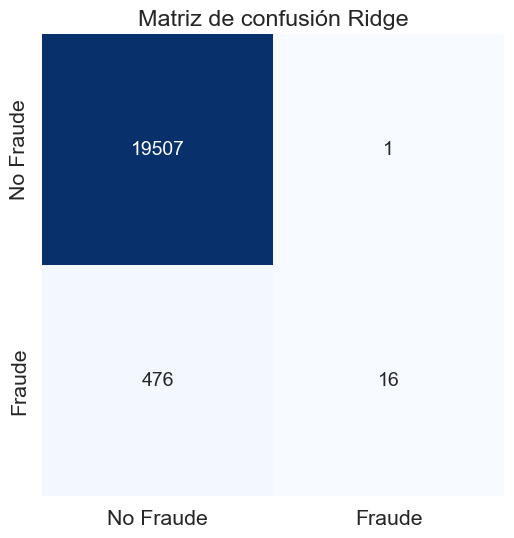

In [67]:
cm_ridge = confusion_matrix(y_test, best_pipe_ridge.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Ridge")
plt.show()

La matriz de confusión del modelo Ridge es similar a la del modelo Lasso, pero el modelo Ridge muestra un mejor desempeño en la clasificación de transacciones no fraudulentas y comete menos errores en este aspecto en comparación con el modelo Lasso. Esto sugiere que el modelo Ridge es más preciso en identificar transacciones no fraudulentas, mientras que ambos modelos tienen dificultades en detectar transacciones fraudulentas.

MODELO KNN

In [68]:
pipe_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier(n_jobs=-1))])
pipe_knn.fit(X_train, y_train)
print(classification_report(y_test, pipe_knn.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98273   0.99759   0.99010     19508
           1    0.76142   0.30488   0.43541       492

    accuracy                        0.98055     20000
   macro avg    0.87208   0.65123   0.71276     20000
weighted avg    0.97729   0.98055   0.97646     20000



In [69]:
param_grid_knn = {'knn__n_neighbors':[7, 10],
                    }

In [70]:
pipe_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier())])
grid_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='roc_auc')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knn__n_neighbors': [7, 10]},
             scoring='roc_auc')

In [71]:
best_params_knn = grid_knn.best_params_
params_knn ={key.split('__')[-1]:param for key, param in best_params_knn.items()} 
best_pipe_knn = Pipeline([('scaler',StandardScaler()), ('knn',KNeighborsClassifier( **params_knn))])
best_pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [72]:
print(classification_report(y_test, best_pipe_knn.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98004   0.99913   0.98949     19508
           1    0.84821   0.19309   0.31457       492

    accuracy                        0.97930     20000
   macro avg    0.91413   0.59611   0.65203     20000
weighted avg    0.97680   0.97930   0.97289     20000



El modelo KNN ajustado con hiperparámetros muestra mejoras en la detección de la clase minoritaria (Fraude 1), con una precisión del 84.82%, un recall del 19.30%, y un valor F1 de 31.45%. La precisión en la clase mayoritaria (0) es del 98.004%, con un recall del 99.91% y un valor F1 de 98.94%.  una precisión global del 97.28%

In [73]:
table.append( 
    {'Modelo': 'KNN', 'precision 0': 0.98004, 'precision 1': 0.84821,'recall 0': 0.99913 , 'recall 1': 0.19309, 'f1-score 0': 0.98949, 'f1-score 1': 0.31457, 'AUC': 0.81},)

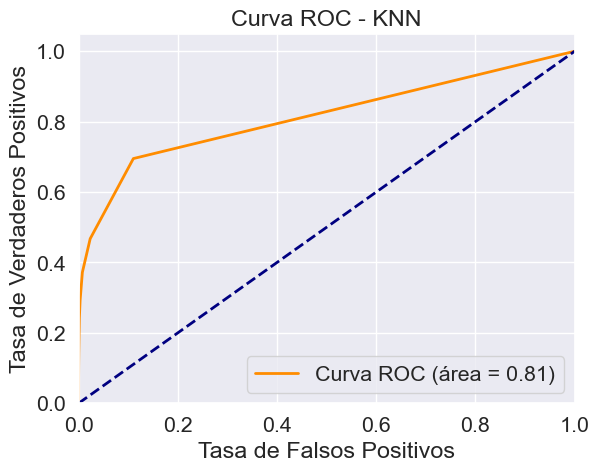

In [74]:
y_scores_knn= best_pipe_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.show()

In [75]:
knn_score = roc_auc_score(y_test, best_pipe_knn.predict_proba(X_test)[:,1])
print("KNN AUC-ROC Score:", knn_score)

KNN AUC-ROC Score: 0.8134144674438338


El valor del área bajo la curva ROC (AUC-ROC) para el modelo KNN es 0.813, lo que sugiere que el modelo tiene una capacidad moderada para distinguir entre las clases, lo que es un indicio positivo de su desempeño.

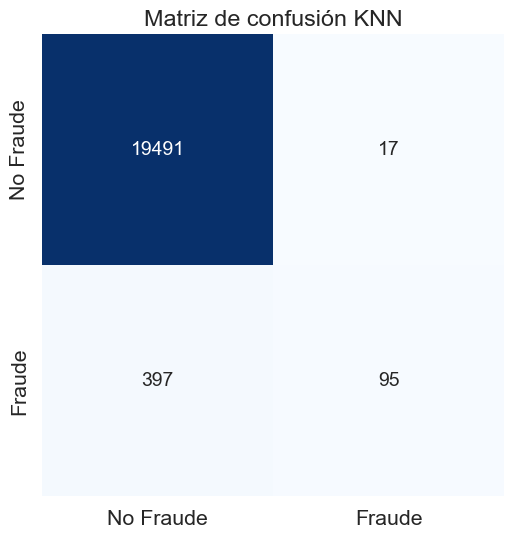

In [76]:
cm_knn = confusion_matrix(y_test, best_pipe_knn.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión KNN")
plt.show()

Según la matriz de confusión el modelo KNN es bueno para clasificar las transacciones no fraudulentas.

MODELO SVM

In [77]:
pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150))])
pipe_svm.fit(X_train, y_train)
print(classification_report(y_test, pipe_svm.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97533   0.99103   0.98312     19508
           1    0.01685   0.00610   0.00896       492

    accuracy                        0.96680     20000
   macro avg    0.49609   0.49856   0.49604     20000
weighted avg    0.95175   0.96680   0.95915     20000



El modelo SVM sin ajuste (tunning) muestra un rendimiento deficiente en la clasificación de transacciones fraudulentas (clase 1) con una baja precisión (1.68%) y un “recall” limitado (6.10%). Por otro lado, el modelo tiene un rendimiento relativamente mejor en la clasificación de transacciones no fraudulentas (clase 0) con una precisión del 97.53% y un “recall” del 99.10%. En general, el modelo tiene una puntuación F1 baja para la clase 1 (transacciones fraudulentas) y una precisión global del 96.68%.

In [78]:
param_grid_svm = {'svm__gamma':[0.01,0.1],
                    'svm__C':[0.01, 0.1]
                    }

In [79]:
pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150))])
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(cache_size=150, max_iter=100,
                                            random_state=123))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.1], 'svm__gamma': [0.01, 0.1]},
             scoring='roc_auc', verbose=2)

In [80]:
print("Best params:\n{}\n".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))
print("Test-set score: {:.2f}".format(grid_svm.best_estimator_.score(X_test, y_test)))

Best params:
{'svm__C': 0.1, 'svm__gamma': 0.1}

Best cross-validation score: 0.58


Test-set score: 0.97


Los mejores parámetros ajustados para el modelo SVM son C = 0.1 y gamma = 0.1. Con estos valores de hiperparámetros, el modelo SVM ha logrado una puntuación inadecuada en la validación cruzada del 58% y un rendimiento notable en el conjunto de prueba, con una puntuación del 97%. Estos resultados sugieren que el ajuste de los hiperparámetros mejorarían el rendimiento del modelo SVM en comparación con la versión sin ajuste.

In [81]:
best_params_svm = grid_svm.best_params_
params_svm ={key.split('__')[-1]:param for key, param in best_params_svm.items()} 
best_pipe_svm = Pipeline([('scaler',StandardScaler()), ('svm',SVC(random_state=123, max_iter=100, cache_size=150, **params_svm, probability=True))])
best_pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=0.1, cache_size=150, gamma=0.1, max_iter=100,
                     probability=True, random_state=123))])

In [82]:
print(classification_report(y_test, best_pipe_svm.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.97537   0.99482   0.98500     19508
           1    0.01942   0.00407   0.00672       492

    accuracy                        0.97045     20000
   macro avg    0.49740   0.49944   0.49586     20000
weighted avg    0.95186   0.97045   0.96094     20000



Después de ajustar los hiperparámetros del modelo SVM, observamos mejoras en la precisión y recall para las transacciones no fraudulentas, con una precisión del 97.53% y un recall del 99.48%. Sin embargo, la detección de transacciones fraudulentas sigue siendo problemática, con una precisión de solo 0.01% y un recall del 0.004%.  En general, a pesar de las mejoras, el modelo SVM aún no es eficaz o bueno en la detección de fraudes y necesita una mayor optimización para abordar este desafío.

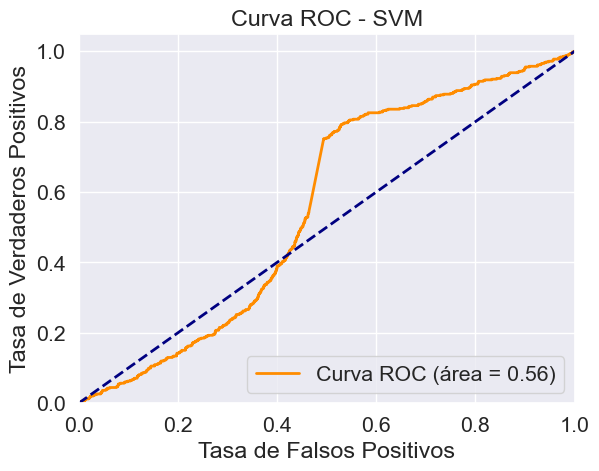

In [83]:
y_scores_svm = best_pipe_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()

In [84]:
table.append( 
    {'Modelo': 'SVM', 'precision 0': 0.9753, 'precision 1': 0.0194,'recall 0': 0.9948 , 'recall 1': 0.0040, 'f1-score 0': 0.9850, 'f1-score 1': 0.0067, 'AUC': 0.56},)

El modelo de clasificación SVM muestra un puntaje AUC-ROC de 0.56, lo que indica un rendimiento limitado en la capacidad de distinguir entre clases en el conjunto de datos. Puntujaes de AUC-ROC alredor de 0.5 sugeriría un rendimiento aleatorio, lo que significa que el modelo no es mucho mejor que una elección aleatoria.

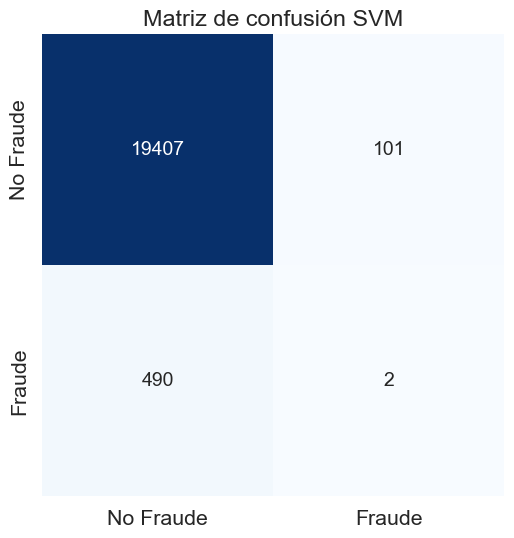

In [85]:
cm_svm = confusion_matrix(y_test, best_pipe_svm.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión SVM")
plt.show()

Acerca de la matriz de confunción, se muestra que el modelo le cuesta dectectar lo que no son fraude y también los fraudes.

MODELO NAIVE BAYES 

In [86]:
pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB())])
pipe_nb.fit(X_train, y_train)
print(classification_report(y_test, pipe_nb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98951   0.66721   0.79701     19508
           1    0.05171   0.71951   0.09648       492

    accuracy                        0.66850     20000
   macro avg    0.52061   0.69336   0.44675     20000
weighted avg    0.96644   0.66850   0.77978     20000



El modelo Naive Bayes sin ajuste de hiperparámetros presenta un desempeño deficiente en la detección de transacciones fraudulentas, con una baja precisión de 0.0517 y un F1-score de 0.09648 para la clase de transacciones fraudulentas.  lo que indica un bajo rendimiento en la clasificación de fraudes.

In [87]:
param_grid_nb = {'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
                    }

In [88]:
pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB())])
grid_nb = GridSearchCV(pipe_nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_nb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             n_jobs=-1,
             param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc', verbose=2)

In [89]:
print("Best params:\n{}\n".format(grid_nb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_nb.best_score_))
print("Test-set score: {:.2f}".format(grid_nb.best_estimator_.score(X_test, y_test)))

Best params:
{'nb__var_smoothing': 1e-06}

Best cross-validation score: 0.76
Test-set score: 0.80


In [90]:
best_params_nb = grid_nb.best_params_
params_nb ={key.split('__')[-1]:param for key, param in best_params_nb.items()} 
best_pipe_nb = Pipeline([('scaler',StandardScaler()), ('nb',GaussianNB(**params_nb))])
best_pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('nb', GaussianNB(var_smoothing=1e-06))])

In [91]:
print(classification_report(y_test, best_pipe_nb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98676   0.80982   0.88958     19508
           1    0.07018   0.56911   0.12494       492

    accuracy                        0.80390     20000
   macro avg    0.52847   0.68946   0.50726     20000
weighted avg    0.96421   0.80390   0.87077     20000



Después de ajustar los hiperparámetros, el modelo Naive Bayes mejoró su precisión general al 56%, pero todavía muestra un rendimiento deficiente en la detección de transacciones fraudulentas con una precisión de solo 0.07 y un F1-score de 0.12 para esta clase.

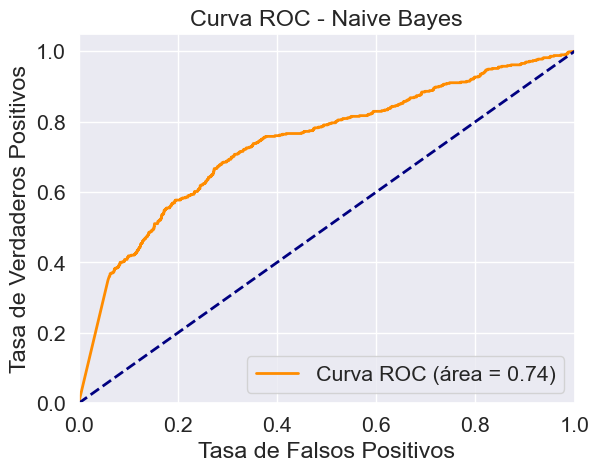

In [92]:
y_scores_nb = best_pipe_nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_nb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [93]:
table.append( 
    {'Modelo': 'Naive Bayes', 'precision 0': 0.9867, 'precision 1': 0.07018,'recall 0': 0.8098 , 'recall 1': 0.56911, 'f1-score 0': 0.88958, 'f1-score 1': 0.12494, 'AUC': 0.74},)

El modelo Naive Bayes ha logrado un AUC-ROC Score de 0.7388, lo que sugiere que tiene un rendimiento razonable en la clasificación de las transacciones.

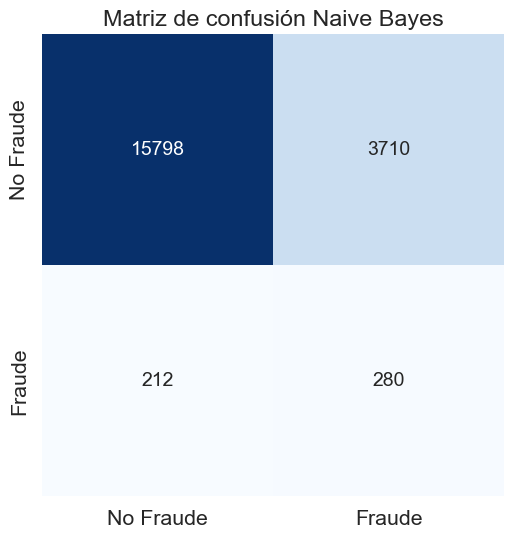

In [94]:
cm_nb = confusion_matrix(y_test, best_pipe_nb.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión Naive Bayes")
plt.show()

La matriz de confusión muestra que el modelo implementado le cuesta dectectar los que no son Fraude, pero también los que realmente son fraudes.

MODELO XG BOOST

In [95]:
pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
pipe_xb.fit(X_train, y_train)
print(classification_report(y_test, pipe_xb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98553   0.99867   0.99206     19508
           1    0.88793   0.41870   0.56906       492

    accuracy                        0.98440     20000
   macro avg    0.93673   0.70868   0.78056     20000
weighted avg    0.98313   0.98440   0.98165     20000



In [96]:
param_grid_xb = {'xb__n_estimators': [100, 200],  # Estimadores
                 'xb__learning_rate': [0.01, 0.1],  # alphas,
                 'xb__booster': ['gblinear', 'gbtree']}

In [97]:
pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
grid_xb = GridSearchCV(pipe_xb, param_grid=param_grid_xb, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_xb.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=Non...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xb__booster': ['gblinear', 'gbtree'],
                         'xb__learning_rate': [0.01, 0.1],
                         'xb__n_estimators': [100, 200]},
             scoring='roc_auc', verbose=2)

In [98]:
print("Best params:\n{}\n".format(grid_xb.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_xb.best_score_))
print("Test-set score: {:.2f}".format(grid_xb.best_estimator_.score(X_test, y_test)))

Best params:
{'xb__booster': 'gbtree', 'xb__learning_rate': 0.1, 'xb__n_estimators': 200}

Best cross-validation score: 0.92
Test-set score: 0.98


Con la optimización de hiperparámetros, el modelo XGBoost mejora significativamente. Los mejores parámetros son booster=’gbtree’, learning_rate=0.1 y n_estimators=200. El rendimiento en el set de prueba aumenta a un 98% de precisión y un 92% en la mejor validación.

In [99]:
best_params_xb = grid_xb.best_params_
params_xb ={key.split('__')[-1]:param for key, param in best_params_xb.items()} 
best_pipe_xb = Pipeline([('scaler',StandardScaler()), ('xb',XGBClassifier())])
best_pipe_xb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [100]:
print(classification_report(y_test, best_pipe_xb.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98553   0.99867   0.99206     19508
           1    0.88793   0.41870   0.56906       492

    accuracy                        0.98440     20000
   macro avg    0.93673   0.70868   0.78056     20000
weighted avg    0.98313   0.98440   0.98165     20000



El modelo XGBoost, después de tener en cuenta sus mejores hiperparámetros, logra un rendimiento significativamente mejor con una precisión del 88.79% y una capacidad de detección (recall) del 41.87% en la clasificación de fraudes. Esto se muestra en el puntaje F1 de 56.90, lo que demuestra un equilibrio mejorado entre la precisión y la capacidad de detección de fraudes en comparación con el modelo sin ajuste de hiperparámetros.

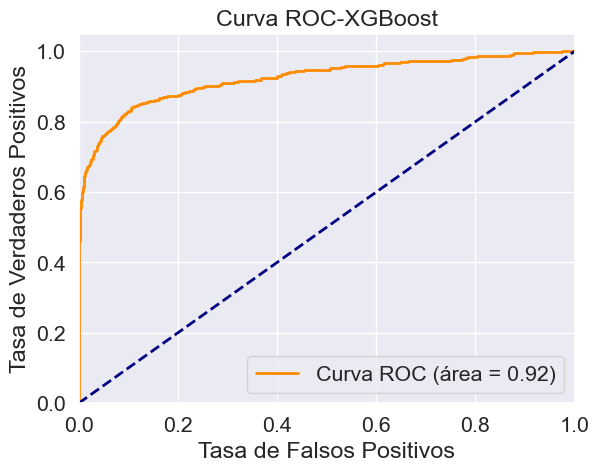

In [101]:
y_scores_xb = best_pipe_xb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_xb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC-XGBoost')
plt.legend(loc="lower right")
plt.show()

In [102]:
table.append( 
    {'Modelo': 'XGBoost', 'precision 0': 0.9855, 'precision 1': 0.8879,'recall 0': 0.9986 , 'recall 1': 0.4187, 'f1-score 0': 0.9920, 'f1-score 1': 0.5690, 'AUC': 0.92},)

El modelo XGBoost tiene un adecuado puntaje AUC-ROC de 0.92, lo que indica que tiene una buena capacidad para clasificar transacciones fraudulentas y no fraudulentas.

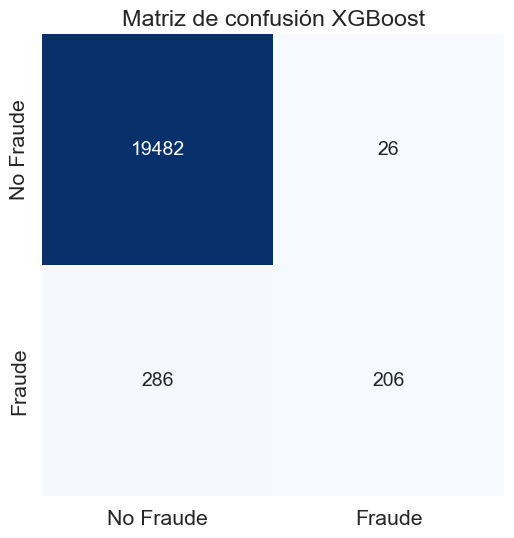

In [103]:
cm_xb = confusion_matrix(y_test, best_pipe_xb.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_xb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión XGBoost")
plt.show()

En la matriz de confusión podemos observar que el modelo XGboost es bueno para clasificar la Clase 0 (no fraude) como también la clase 1 (Fraude).

MODELO MLP

In [104]:
pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True))])
pipe_mlp.fit(X_train, y_train)
print(classification_report(y_test, pipe_mlp.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98328   0.99764   0.99041     19508
           1    0.77778   0.32724   0.46066       492

    accuracy                        0.98115     20000
   macro avg    0.88053   0.66244   0.72553     20000
weighted avg    0.97822   0.98115   0.97738     20000



El modelo MLP (Multilayer Perceptron) sin ajuste de hiperparámetros muestra un rendimiento sólido en la clasificación de transacciones no fraudulentas (clase 0) con una alta precisión y recall. Sin embargo, su rendimiento en la clasificación de transacciones fraudulentas (clase 1) es inferior, lo que se refleja en una precisión más baja y un puntaje F1 más bajo para esta clase. El puntaje F1 general del modelo es de 0.7255, lo que indica un rendimiento razonable en la clasificación binaria. La precisión general del modelo es del 97.82%.

In [105]:
param_grid_mlp = {'mlp__hidden_layer_sizes': [[10, 10], [
    10, 10, 10]], 'mlp__activation': ["logistic", "tanh", "relu"]}

In [106]:
pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True, batch_size=300))])
grid_mlp = GridSearchCV(pipe_mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')
grid_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(batch_size=300,
                                                      early_stopping=True,
                                                      max_iter=100,
                                                      random_state=123))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['logistic', 'tanh', 'relu'],
                         'mlp__hidden_layer_sizes': [[10, 10], [10, 10, 10]]},
             scoring='roc_auc', verbose=2)

In [107]:
print("Best params:\n{}\n".format(grid_mlp.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_mlp.best_score_))
print("Test-set score: {:.2f}".format(grid_mlp.best_estimator_.score(X_test, y_test)))

Best params:
{'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': [10, 10]}

Best cross-validation score: 0.86
Test-set score: 0.98


El modelo MLP con ajuste de hiperparámetros muestra un rendimiento general adecuado. En el mejor modelo se utilizaron tres capas ocultas con 10 neuronas cada una y la función de activación ‘ReLU’. Esto representa un score del 98% en los datos de prueba y un 86% en la validación cruzada. El modelo presenta un equilibrio razonable entre precisión y recall para ambas clases, aunque puede haber margen para mejorar aún más el rendimiento en la clasificación de transacciones fraudulentas (clase 1) si se considera necesario.

In [108]:
best_params_mlp = grid_mlp.best_params_
params_mlp ={key.split('__')[-1]:param for key, param in best_params_mlp.items()} 
best_pipe_mlp = Pipeline([('scaler',StandardScaler()), ('mlp',MLPClassifier(random_state=123, max_iter=100, early_stopping=True, batch_size=300))])
best_pipe_mlp.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(batch_size=300, early_stopping=True,
                               max_iter=100, random_state=123))])

In [109]:
print(classification_report(y_test, best_pipe_mlp.predict(X_test), digits=5))

              precision    recall  f1-score   support

           0    0.98318   0.99774   0.99041     19508
           1    0.78325   0.32317   0.45755       492

    accuracy                        0.98115     20000
   macro avg    0.88322   0.66046   0.72398     20000
weighted avg    0.97826   0.98115   0.97730     20000



El modelo MLP ajustado logra una precisión general del 98.31%, con un recall del 99.774% para la clase no fraudulenta (0). Por otro lado, una presición d 78.325% y un recall del 32.31% para la clase fraudulenta (1). Esto significa que el modelo tiene un alto rendimiento en la detección de transacciones no fraudulentas, pero un rendimiento inferior en la detección de transacciones fraudulentas. La puntuación F1-score en general es del 97.730%

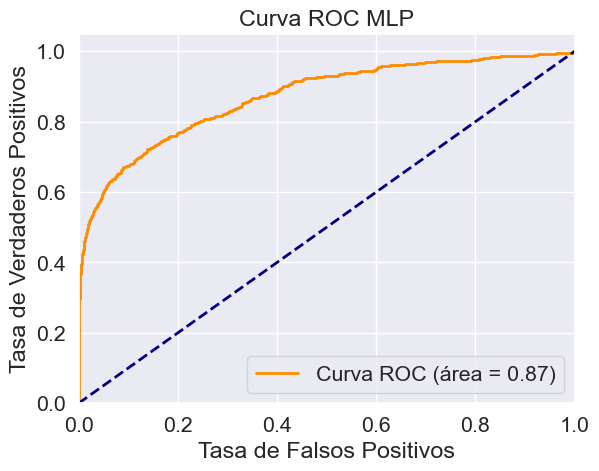

In [110]:
y_scores_mlp = best_pipe_mlp.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_mlp)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC MLP')
plt.legend(loc="lower right")
plt.show()

In [111]:
table.append( 
    {'Modelo': 'MLP', 'precision 0': 0.98318, 'precision 1': 0.78325,'recall 0': 0.9977 , 'recall 1': 0.3231, 'f1-score 0': 0.9904, 'f1-score 1': 0.4575, 'AUC': 0.87},)

El modelo MLP obtiene un AUC-ROC Score de 0.87, lo que sugiere un buen rendimiento en la clasificación de las transacciones en términos de la curva ROC.

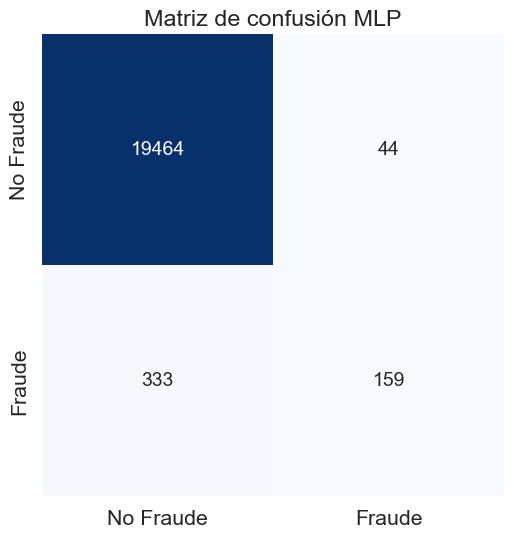

In [112]:
cm_mlp = confusion_matrix(y_test, best_pipe_mlp.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14}, square=True, xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de confusión MLP")
plt.show()

Similar al modelo XGBoost el modelo MLP sirve para clasificar balanceadamente las clases 0 y 1.

COMPARACION DE LOS MODELOS DE CLASIFICACION

In [113]:
pd.DataFrame(table).sort_values(by='AUC', ascending=False)

Modelo  precision 0  precision 1  recall 0  recall 1  f1-score 0  \
5      XGBoost      0.98550      0.88790   0.99860   0.41870     0.99200   
6          MLP      0.98318      0.78325   0.99770   0.32310     0.99040   
2          KNN      0.98004      0.84821   0.99913   0.19309     0.98949   
0        Lasso      0.97800      0.76620   0.99920   0.11170     0.98850   
1        Ridge      0.97618      0.94110   0.99950   0.03250     0.98792   
4  Naive Bayes      0.98670      0.07018   0.80980   0.56911     0.88958   
3          SVM      0.97530      0.01940   0.99480   0.00400     0.98500   

   f1-score 1     AUC  
5     0.56900  0.9200  
6     0.45750  0.8700  
2     0.31457  0.8100  
0     0.19570  0.8056  
1     0.06287  0.7800  
4     0.12494  0.7400  
3     0.00670  0.5600

Teniendo en cuenta las métricas de rendimiento y el AUC de los diferentes modelos de clasificación, podemos observar lo siguiente:

En primer lugar, XGBoost y MLP son los modelos que muestran el mejor rendimiento general. XGBoost tiene la mayor precisión en la clase 0 (transacciones no fraudulentas) y el mayor valor de F1-score en la clase 1 (transacciones fraudulentas), es decir que tiene una capacidad sólida para clasificar ambas clases. Además, XGBoost presenta el AUC más alto, lo que sugiere una excelente capacidad para distinguir entre las clases. Por otro lado, KNN también se desempeña bien, con una alta precisión en la clase 0 y un F1-score decente en la clase 1. Sin embargo, su AUC es un poco más bajo en comparación con XGBoost y MLP. Ahora bien, los modelos Lasso y Ridge, aunque tienen una alta precisión en la clase 0, tienen un bajo rendimiento en términos de recall y F1-score en la clase 1, lo que indica dificultades para detectar transacciones fraudulentas. Además, sus AUC son más bajos en comparación con los modelos XGBoost y MLP. Naive Bayes muestra un buen rendimiento en términos de recall en la clase 1, pero su precisión en esa clase es muy baja, lo que lleva a un F1-score bajo. Su AUC está en un rango regular en comparación con los otros modelos. Finalmente, el modelo SVM presenta la precisión más baja en la clase 1, lo que resulta en un F1-score muy bajo en esa clase. Además, su AUC es el más bajo entre todos los modelos, lo que sugiere dificultades en distinguir entre las clases.

Wind Speed Data: EDA

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
import pandas as pd

wind_speed_data = pd.read_csv("C:/Users/hp/Downloads/data_treino_dv_df_2000_2010.csv")

wind_speed_data.head()

HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

El dataset contiene información de la velocidad del viento en determinada hora, en conjunto con otras variables descriptivas tal como temperatura y humedad del aire. En ese sentido, el dataset es utilizado en este caso para predecir la velocidad del viento en función de otras variables.

REDUCCION DE NOMBRES EXTENSOS DE COLUMNAS

In [116]:
column_names = {
    'HORA (UTC)': 'Hora (UTC)',
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'Dirección del Viento (grados)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Velocidad del Viento (m/s)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Humedad Relativa Máxima (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Humedad Relativa Mínima (AUT) (%)',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura Máxima (AUT) (°C)',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura Mínima (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Humedad Relativa del Aire (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Presión Atmosférica Horaria (mB)',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'Precipitación Total Horaria (mm)',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rajada Máxima del Viento (m/s)',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Presión Atmosférica Máxima Anterior (AUT) (mB)',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Presión Atmosférica Mínima Anterior (AUT) (mB)'
}

wind_speed_data = wind_speed_data.rename(columns = column_names)

In [117]:
wind_speed_data.columns

Index(['Hora (UTC)', 'Dirección del Viento (grados)',
       'Velocidad del Viento (m/s)', 'Humedad Relativa Máxima (AUT) (%)',
       'Humedad Relativa Mínima (AUT) (%)', 'Temperatura Máxima (AUT) (°C)',
       'Temperatura Mínima (AUT) (°C)', 'Humedad Relativa del Aire (%)',
       'Presión Atmosférica Horaria (mB)', 'Precipitación Total Horaria (mm)',
       'Rajada Máxima del Viento (m/s)',
       'Presión Atmosférica Máxima Anterior (AUT) (mB)',
       'Presión Atmosférica Mínima Anterior (AUT) (mB)'],
      dtype='object')

Número de observaciones, media, desviación, mínimo, máximo, cuartiles.

In [118]:
wind_speed_data.describe()

Dirección del Viento (grados)  Velocidad del Viento (m/s)  \
count                   87693.000000                87693.000000   
mean                        0.405810                    2.466192   
std                         0.686247                    1.313968   
min                        -1.000000                    0.000000   
25%                        -0.156434                    1.500000   
50%                         0.788011                    2.400000   
75%                         0.970296                    3.400000   
max                         1.000000                   10.000000   

       Humedad Relativa Máxima (AUT) (%)  Humedad Relativa Mínima (AUT) (%)  \
count                       87693.000000                       87693.000000   
mean                           69.058465                          63.176194   
std                            19.640222                          20.166336   
min                            12.000000                          10.000000   
25%                            54.000000                          48.000000   
50%                            72.000000                          64.000000   
75%                            87.000000                          80.000000   
max                           100.000000                          98.000000   

       Temperatura Máxima (AUT) (°C)  Temperatura Mínima (AUT) (°C)  \
count                   87693.000000                   87693.000000   
mean                       21.921264                      20.684570   
std                         3.721386                       3.513744   
min                         9.200000                       8.400000   
25%                        19.200000                      18.400000   
50%                        21.400000                      20.200000   
75%                        24.700000                      23.100000   
max                        35.300000                      34.400000   

       Humedad Relativa del Aire (%)  Presión Atmosférica Horaria (mB)  \
count                   87693.000000                      87693.000000   
mean                       66.146682                        887.251925   
std                        19.992327                          4.012404   
min                        10.000000                        863.400000   
25%                        51.000000                        885.300000   
50%                        68.000000                        887.200000   
75%                        84.000000                        889.100000   
max                        99.000000                       1023.500000   

       Precipitación Total Horaria (mm)  Rajada Máxima del Viento (m/s)  \
count                      87693.000000                    87693.000000   
mean                           0.160907                        5.161076   
std                            1.307515                        2.311157   
min                            0.000000                        0.000000   
25%                            0.000000                        3.400000   
50%                            0.000000                        5.000000   
75%                            0.000000                        6.800000   
max                           70.800000                       24.300000   

       Presión Atmosférica Máxima Anterior (AUT) (mB)  \
count                                    87693.000000   
mean                                       887.580724   
std                                          3.646750   
min                                        865.300000   
25%                                        885.600000   
50%                                        887.500000   
75%                                        889.300000   
max                                        913.100000   

       Presión Atmosférica Mínima Anterior (AUT) (mB)  
count                                    87693.000000  
mean                                       886.891093  
std              

Los datos presentados muestran estadísticas relacionadas a cada variable:

La dirección del viento se expresa en grados, con un valor mínimo de -1 y máximo de 1, lo que indica la variabilidad en la dirección.

La velocidad del viento, medida en metros por segundo, tiene un promedio de 2.47 m/s, con una desviación estándar de 1.31 m/s.

La humedad relativa máxima y mínima alcanzan valores promedio de alrededor del 69% y 63%, respectivamente.

Las temperaturas máxima y mínima promedio son de aproximadamente 21.92 °C y 20.68 °C, respectivamente.

La humedad relativa del aire presenta un promedio del 66.15%, con una desviación estándar de 19.99%.

La presión atmosférica horaria tiene un promedio de 887.25 mB, con variaciones entre 863.4 mB y 1023.5 mB.

La precipitación total horaria tiene un valor promedio de 0.16 mm, con un máximo de 70.8 mm.

La rajada máxima del viento alcanza un promedio de 5.16 m/s, con una desviación estándar de 2.31 m/s.

Las presiones atmosféricas máxima y mínima anteriores tienen un rango de variación entre 862.8 mB y 913.1 mB.

CONTEO DE DATOS FALTANTES

In [119]:
wind_speed_data.isna().sum()

Hora (UTC)                                        0
Dirección del Viento (grados)                     0
Velocidad del Viento (m/s)                        0
Humedad Relativa Máxima (AUT) (%)                 0
Humedad Relativa Mínima (AUT) (%)                 0
Temperatura Máxima (AUT) (°C)                     0
Temperatura Mínima (AUT) (°C)                     0
Humedad Relativa del Aire (%)                     0
Presión Atmosférica Horaria (mB)                  0
Precipitación Total Horaria (mm)                  0
Rajada Máxima del Viento (m/s)                    0
Presión Atmosférica Máxima Anterior (AUT) (mB)    0
Presión Atmosférica Mínima Anterior (AUT) (mB)    0
dtype: int64

Se evidencia entonces que no hay datos nulos en ninguna variable, lo cuál indica que el dataset ha sido procesado previamente.

HISTOGRAMA DE LAS VARAIBLES EXPLICATIVAS Y LA VARIABLE A PREDECIR. 

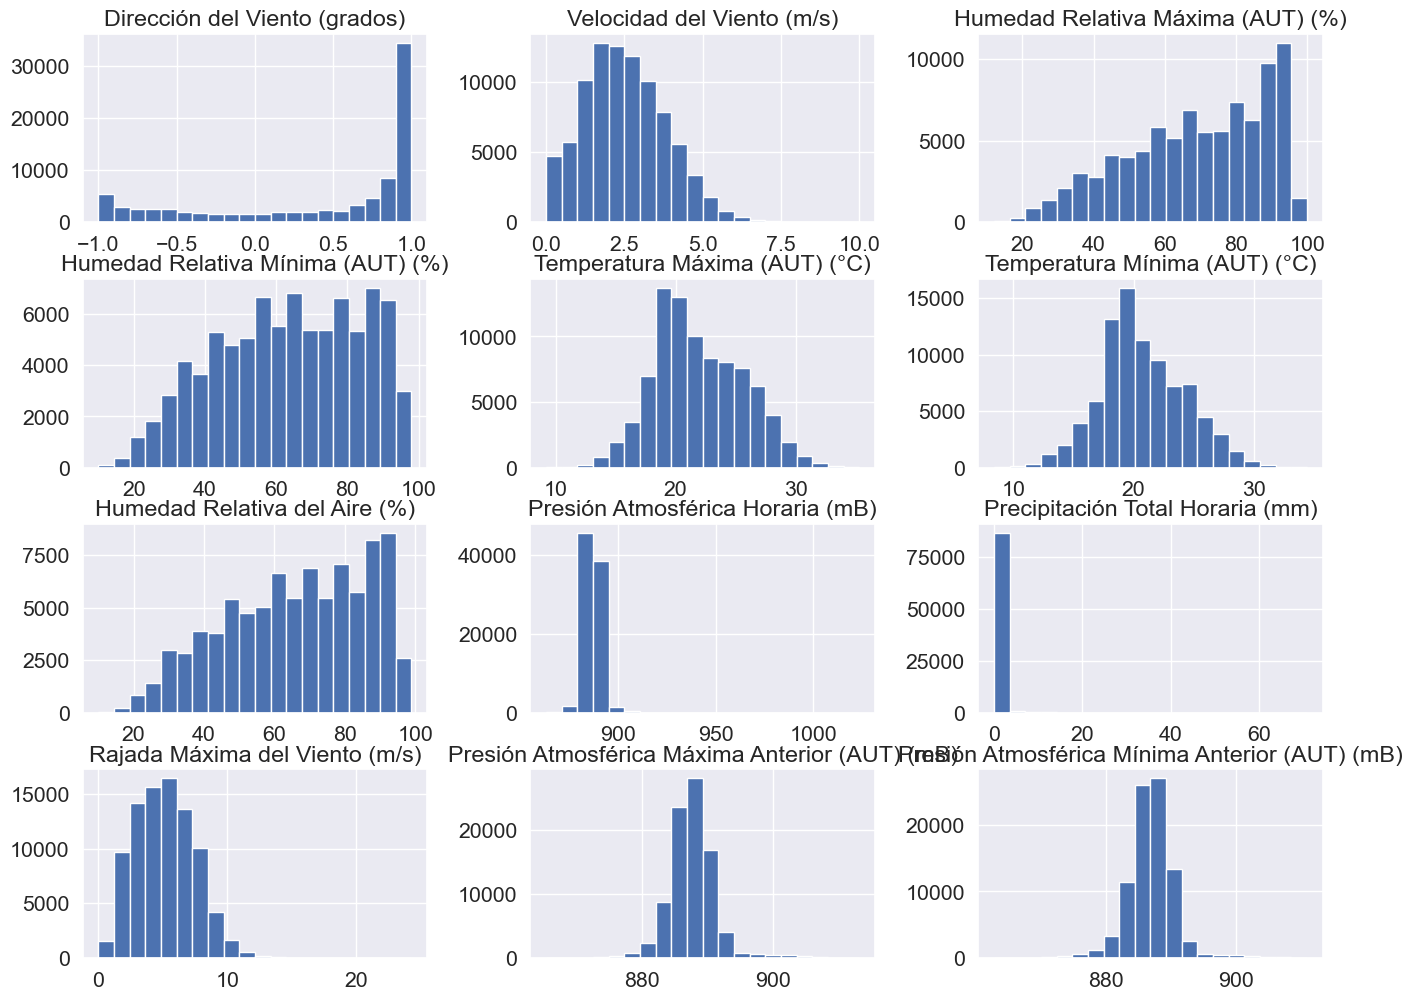

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

wind_speed_data.hist(bins=20, figsize=(16, 12))
plt.show()


COMENTARIOS:

Dirección del viento: El histograma de la dirección del viento muestra una distribución relativamente uniforme, con un ligero pico a 180 grados (sur). Esto sugiere que la dirección del viento en el dataset es relativamente variable, sin una dirección única que domine salvo por la que se mencionó previamente.

Velocidad del viento: El histograma de la velocidad del viento muestra una distribución sesgada a la derecha, con un pico alrededor de 2 m/s y una larga cola que se extiende a velocidades del viento más altas. Esto sugiere que la mayoría del tiempo, la velocidad del viento es relativamente baja, pero también hay períodos ocasionales de vientos fuertes.

Temperatura: Los histogramas de la temperatura máxima y mínima muestran ambas distribuciones normales, con picos alrededor de 20°C. Esto sugiere que la temperatura en el dataset es relativamente cálida, con períodos ocasionales de calor o frío extremo. Pero aún así, no cambia significativamente entre una hora y otra

Presión atmosférica: El histograma de la presión atmosférica horaria muestra una distribución normal, con un pico alrededor de 890 mB. Esto está cerca de la presión atmosférica media al nivel del mar de 1013,25 mB, lo que sugiere que las mediciones se tomaron a una elevación relativamente baja.

BOXPLOT

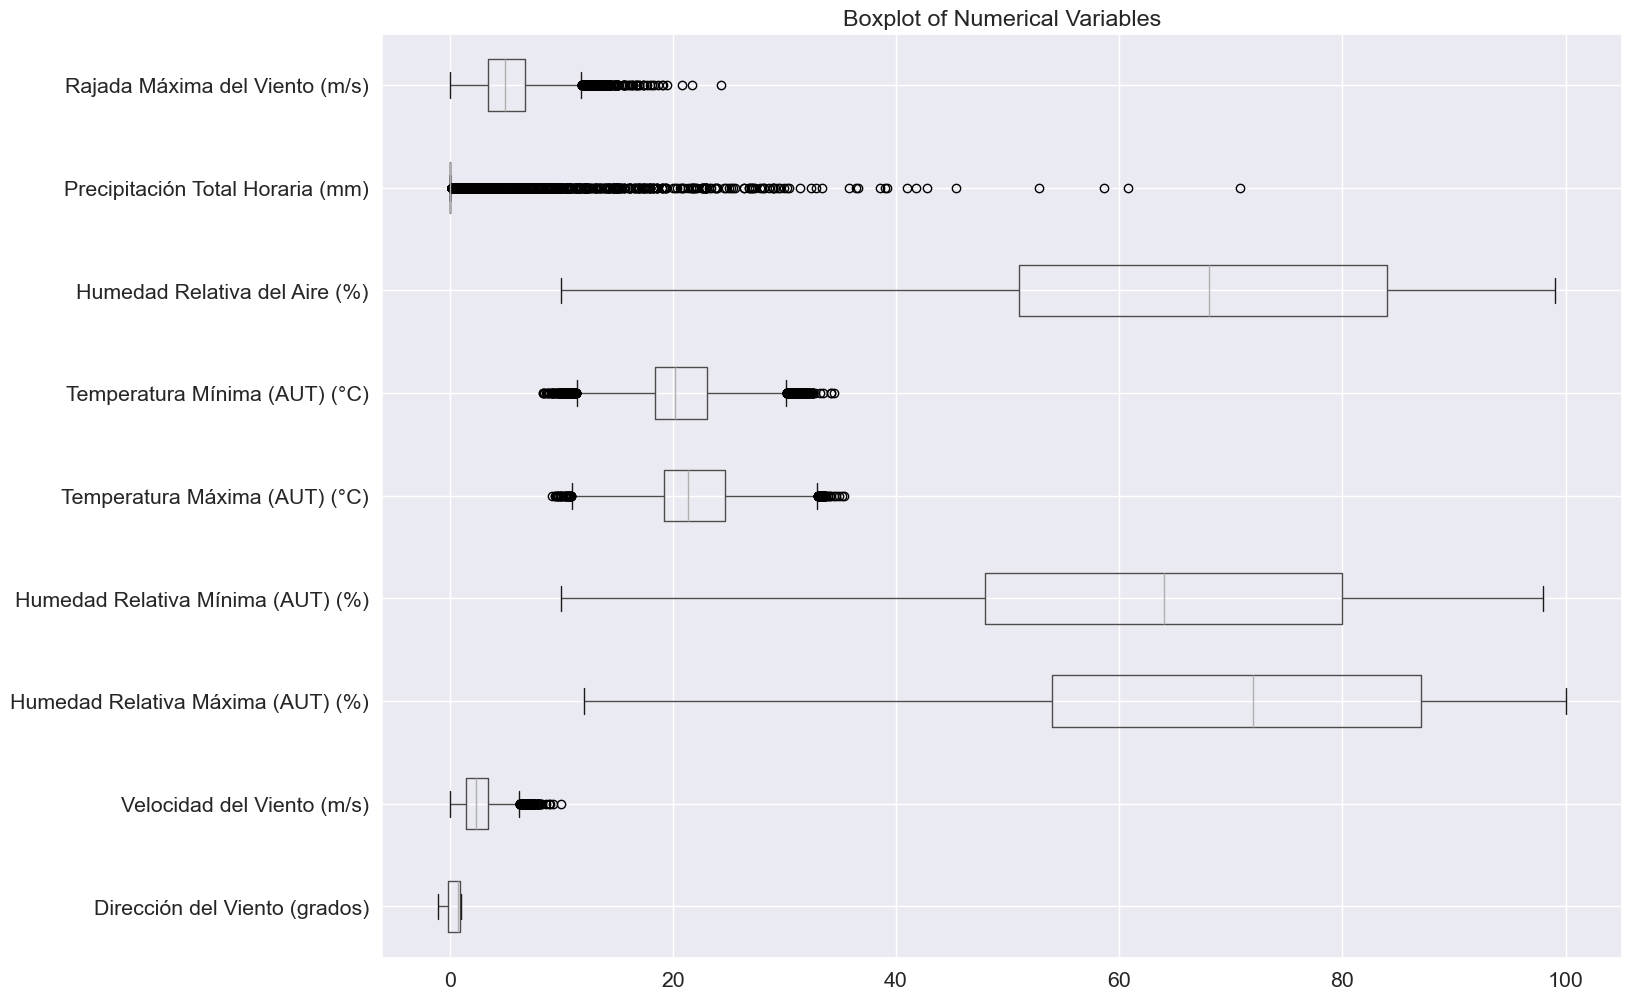

In [121]:
# Create a boxplot for all numerical variables
plt.figure(figsize=(16, 12))
wind_speed_data.drop([
    'Presión Atmosférica Máxima Anterior (AUT) (mB)',
    'Presión Atmosférica Mínima Anterior (AUT) (mB)',
    'Presión Atmosférica Horaria (mB)'], axis = 1).boxplot(figsize=(16, 12), vert=False)
plt.title('Boxplot of Numerical Variables')
plt.show()


COMENTARIOS:

Velocidad del viento: La mediana de la velocidad del viento es de alrededor de 2 m/s, lo que sugiere que la mayoría del tiempo, la velocidad del viento es relativamente baja. Sin embargo, el diagrama de caja también muestra que hay una variabilidad significativa en la velocidad del viento, con algunos valores atípicos que superan los 10 m/s. Hay ocasiones en las que la velocidad del viento puede ser muy alta.

Humedad relativa: La mediana de la humedad relativa es de alrededor del 70%, lo que sugiere que el aire es relativamente húmedo la mayoría del tiempo. Sin embargo, el diagrama de caja también muestra que hay una variabilidad significativa en la humedad relativa, con algunos valores atípicos que caen por debajo del 40% o por encima del 80%. Esto sugiere que hay ocasiones en las que el aire puede ser muy seco o muy húmedo.

Temperatura: La mediana de la temperatura es de alrededor de 20°C, lo que sugiere que el clima es relativamente cálido. Sin embargo, el diagrama de caja también muestra que hay una variabilidad significativa en la temperatura, con algunos valores atípicos que caen por debajo de los 10°C o por encima de los 35°C.

MATRIZ DE CORRELACION

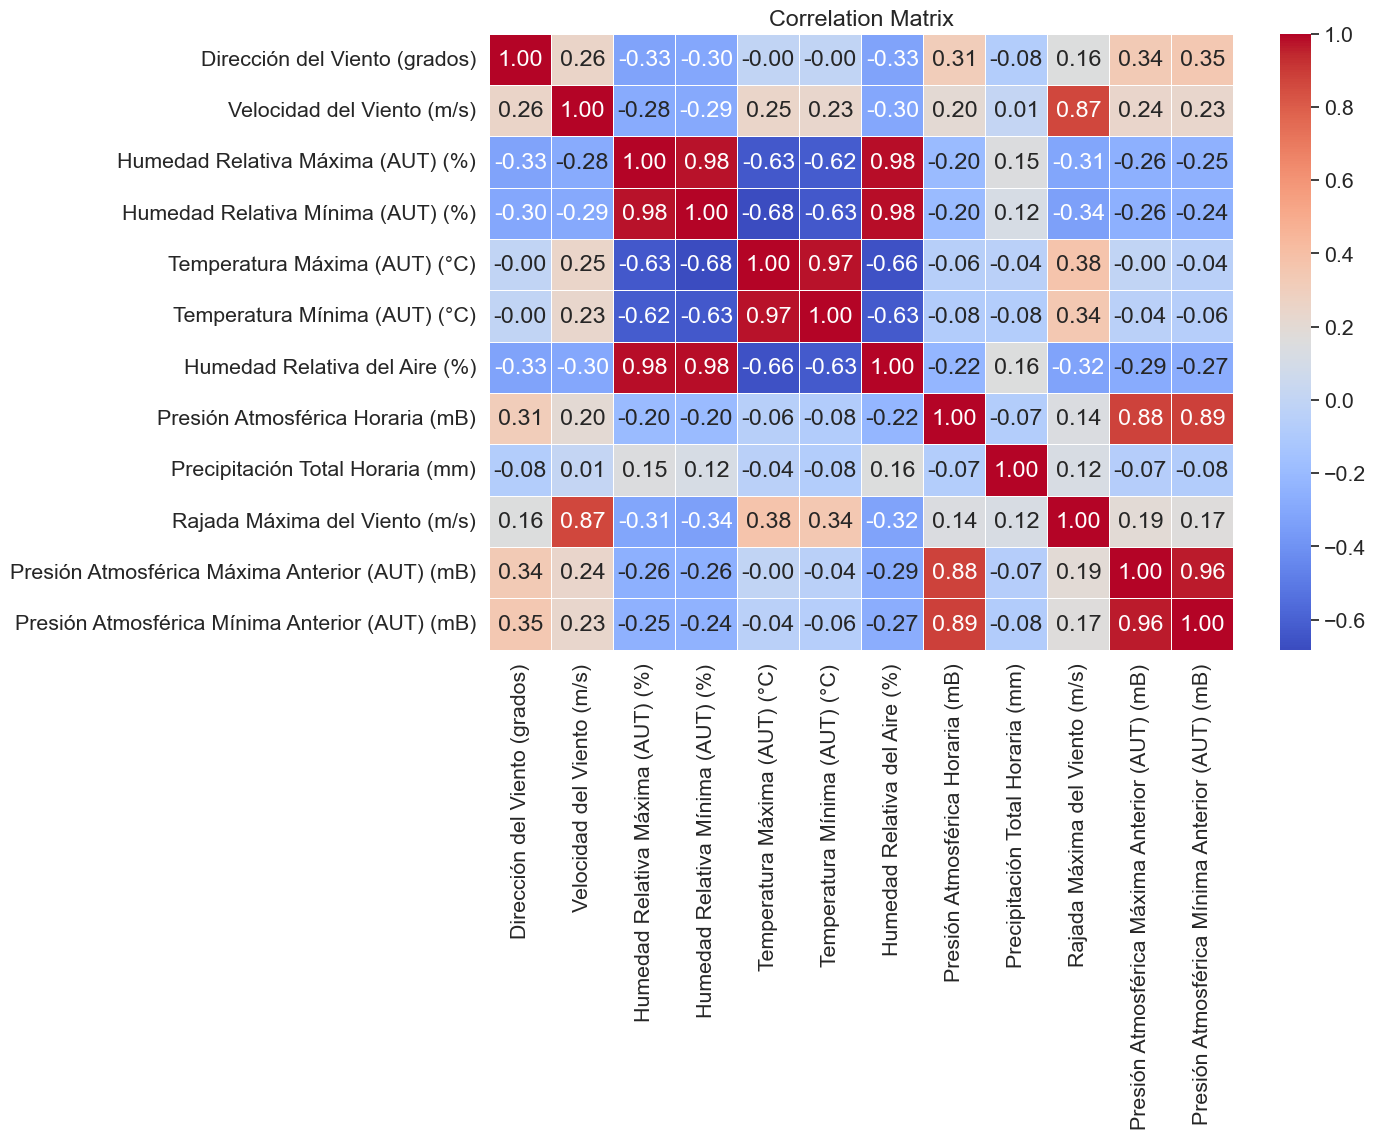

In [122]:
correlation_matrix = wind_speed_data.drop("Hora (UTC)", axis = 1).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Las variables que están más fuertemente correlacionadas con la velocidad del viento son la rajada del viento y la humedad relativa del aire. Podría concluirse a priori, por ejemplo, que cuando la velocidad del viento aumenta, la humedad relativa tiende a disminuir, y viceversa.

SCATTERPLOT

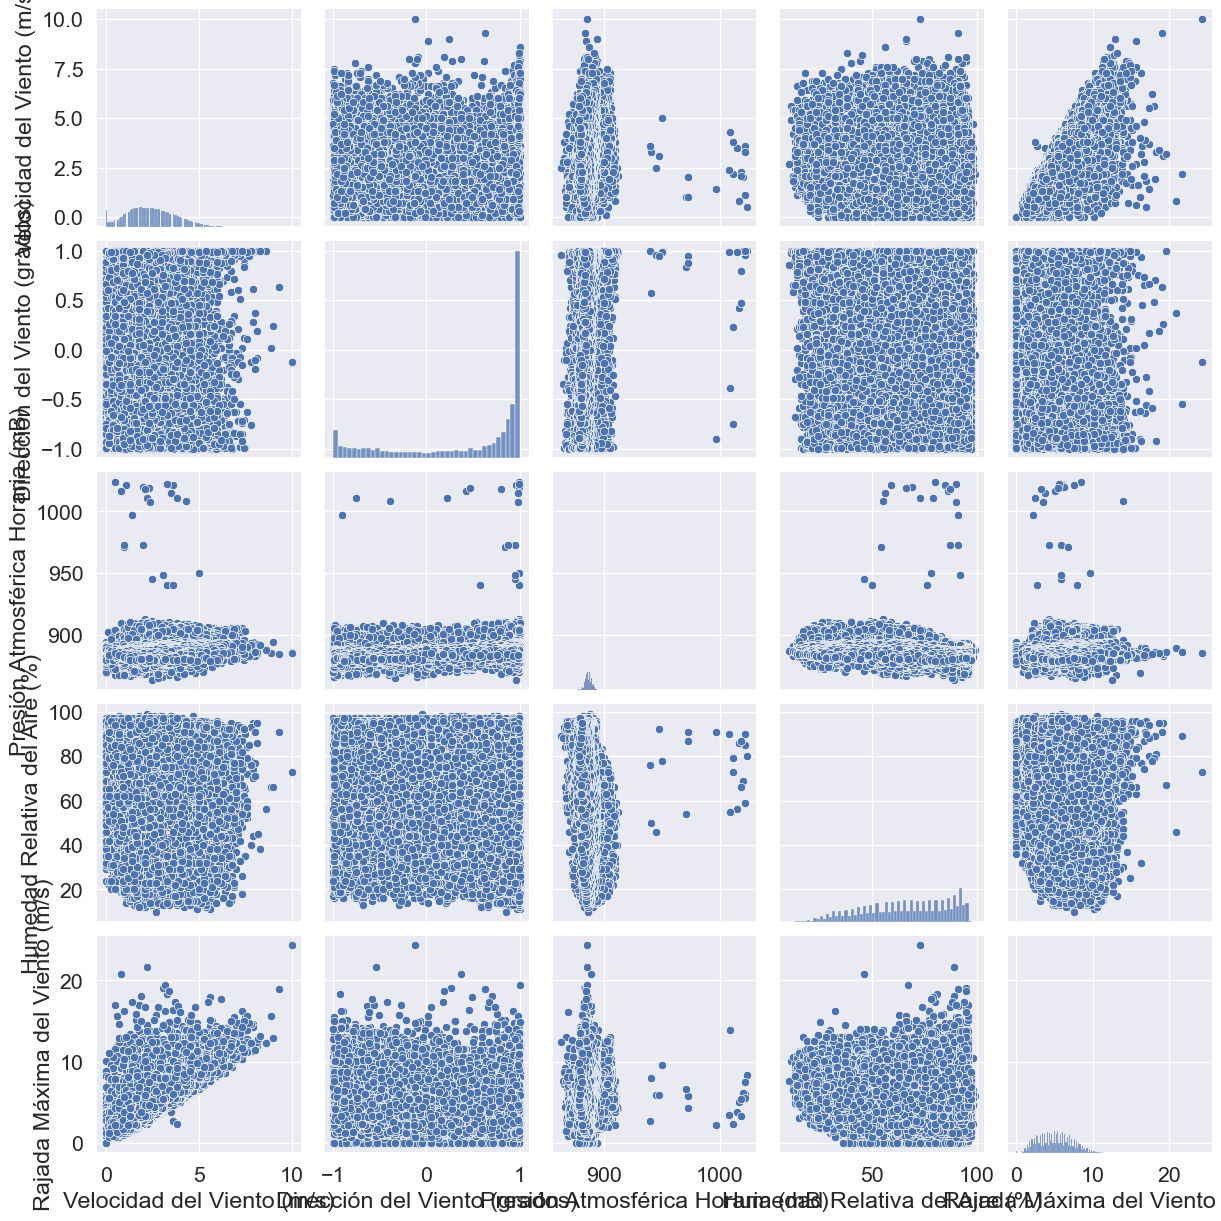

In [123]:
sns.pairplot(data=wind_speed_data[[
    "Velocidad del Viento (m/s)",
    "Dirección del Viento (grados)",
    "Presión Atmosférica Horaria (mB)",
    "Humedad Relativa del Aire (%)",
    "Rajada Máxima del Viento (m/s)"
    ]])
plt.show()

Dado que el dataset tiene demasiados registros, se evidencian puntos en todo el gráfico de dispersión. 
Entonces, se evidencia por ejemplo que la variable rajada máxima, predice casi que de manera lineal la velocidad del viento, no tan así con las otras variables, sin embargo al momento de modelar, se determinará cuáles son útiles y cuáles no.

SE ELIMINA MULTICOLINEALIDAD 

En este paso se quita la variable de la hora y la variable dependiente para verificar el variance_inflation_factor.

Adicionalmente se retira la variable de precipitación, ya que esta no aporta varianza significativa al dataset y además se comprobó en el exploratorio que no explica de ninguna manera la velocidad del viento.

In [124]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# se quita la variable de la hora y la variable dependiente para verificar el variance_inflation_factor
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                                         Variable            VIF
0                   Dirección del Viento (grados)       1.714619
1               Humedad Relativa Máxima (AUT) (%)    1027.260514
2               Humedad Relativa Mínima (AUT) (%)     868.656360
3                   Temperatura Máxima (AUT) (°C)    2385.341209
4                   Temperatura Mínima (AUT) (°C)    1994.193860
5                   Humedad Relativa del Aire (%)     578.778727
6                Presión Atmosférica Horaria (mB)  239543.952335
7                  Rajada Máxima del Viento (m/s)       7.292113
8  Presión Atmosférica Máxima Anterior (AUT) (mB)  942773.725851
9  Presión Atmosférica Mínima Anterior (AUT) (mB)  964504.355544


In [125]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                                         Variable            VIF
0                   Dirección del Viento (grados)       1.714581
1               Humedad Relativa Máxima (AUT) (%)    1027.197096
2               Humedad Relativa Mínima (AUT) (%)     867.958995
3                   Temperatura Máxima (AUT) (°C)    2356.378873
4                   Temperatura Mínima (AUT) (°C)    1971.814345
5                   Humedad Relativa del Aire (%)     578.563060
6                Presión Atmosférica Horaria (mB)  221568.810547
7                  Rajada Máxima del Viento (m/s)       7.283123
8  Presión Atmosférica Máxima Anterior (AUT) (mB)  222220.148467


In [126]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable          VIF
0      Dirección del Viento (grados)     1.714458
1  Humedad Relativa Máxima (AUT) (%)  1027.196759
2  Humedad Relativa Mínima (AUT) (%)   867.882706
3      Temperatura Máxima (AUT) (°C)  2353.807880
4      Temperatura Mínima (AUT) (°C)  1971.095601
5      Humedad Relativa del Aire (%)   578.525551
6   Presión Atmosférica Horaria (mB)   161.461302
7     Rajada Máxima del Viento (m/s)     7.278441


In [127]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)",
    "Temperatura Máxima (AUT) (°C)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable         VIF
0      Dirección del Viento (grados)    1.697671
1  Humedad Relativa Máxima (AUT) (%)  471.299209
2  Humedad Relativa Mínima (AUT) (%)  366.285572
3      Temperatura Mínima (AUT) (°C)   65.560108
4      Humedad Relativa del Aire (%)  576.593547
5   Presión Atmosférica Horaria (mB)  140.499072
6     Rajada Máxima del Viento (m/s)    7.189978


In [128]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)",
    "Temperatura Máxima (AUT) (°C)",
    "Humedad Relativa del Aire (%)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable         VIF
0      Dirección del Viento (grados)    1.679825
1  Humedad Relativa Máxima (AUT) (%)  304.394037
2  Humedad Relativa Mínima (AUT) (%)  248.400731
3      Temperatura Mínima (AUT) (°C)   65.410392
4   Presión Atmosférica Horaria (mB)  140.020889
5     Rajada Máxima del Viento (m/s)    7.189099


In [129]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)",
    "Temperatura Máxima (AUT) (°C)",
    "Humedad Relativa del Aire (%)",
    "Humedad Relativa Máxima (AUT) (%)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable         VIF
0      Dirección del Viento (grados)    1.627305
1  Humedad Relativa Mínima (AUT) (%)   21.103437
2      Temperatura Mínima (AUT) (°C)   65.014149
3   Presión Atmosférica Horaria (mB)  131.875734
4     Rajada Máxima del Viento (m/s)    7.079493


In [130]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)",
    "Temperatura Máxima (AUT) (°C)",
    "Humedad Relativa del Aire (%)",
    "Humedad Relativa Máxima (AUT) (%)",
    "Presión Atmosférica Horaria (mB)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable        VIF
0      Dirección del Viento (grados)   1.398797
1  Humedad Relativa Mínima (AUT) (%)   5.749193
2      Temperatura Mínima (AUT) (°C)  12.294688
3     Rajada Máxima del Viento (m/s)   6.996362


Después de eliminar variables iterativamente, se llegó a este conjunto de variables que deacuerdo al variance inflation factor no presentan un VIF mayor que 5, por lo cuál no hay multicolinealidad presente.

In [131]:
predictive_variables = wind_speed_data.drop([
    "Hora (UTC)",
    "Velocidad del Viento (m/s)",
    "Precipitación Total Horaria (mm)",
    "Presión Atmosférica Mínima Anterior (AUT) (mB)",
    "Presión Atmosférica Máxima Anterior (AUT) (mB)",
    "Temperatura Máxima (AUT) (°C)",
    "Humedad Relativa del Aire (%)",
    "Humedad Relativa Máxima (AUT) (%)",
    "Presión Atmosférica Horaria (mB)",
    "Temperatura Mínima (AUT) (°C)"], axis = 1)

vif_data = pd.DataFrame()
vif_data["Variable"] = predictive_variables.columns
vif_data["VIF"] = [variance_inflation_factor(predictive_variables.values, i) for i in range(predictive_variables.shape[1])]

# Display the result
print(vif_data)

                            Variable       VIF
0      Dirección del Viento (grados)  1.374806
1  Humedad Relativa Mínima (AUT) (%)  3.182363
2     Rajada Máxima del Viento (m/s)  3.644319


PUNTO 6 (REGRESSION)

In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
import pandas as pd

column_names = {
    'HORA (UTC)': 'Hora (UTC)',
    'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'Dirección del Viento (grados)',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'Velocidad del Viento (m/s)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'Humedad Relativa Máxima (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'Humedad Relativa Mínima (AUT) (%)',
    'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura Máxima (AUT) (°C)',
    'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'Temperatura Mínima (AUT) (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)': 'Humedad Relativa del Aire (%)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'Presión Atmosférica Horaria (mB)',
    'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'Precipitación Total Horaria (mm)',
    'VENTO, RAJADA MAXIMA (m/s)': 'Rajada Máxima del Viento (m/s)',
    'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'Presión Atmosférica Máxima Anterior (AUT) (mB)',
    'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'Presión Atmosférica Mínima Anterior (AUT) (mB)'
}

wind_speed_data = pd.read_csv("C:/Users/hp/Downloads/data_treino_dv_df_2000_2010.csv").rename(columns = column_names)

wind_speed_data.head()

Hora (UTC)  Dirección del Viento (grados)  Velocidad del Viento (m/s)  \
0      12:00                       0.809017                         1.8   
1      13:00                       0.965926                         2.7   
2      14:00                       0.891007                         2.0   
3      15:00                       0.848048                         2.5   
4      16:00                       0.224951                         2.4   

   Humedad Relativa Máxima (AUT) (%)  Humedad Relativa Mínima (AUT) (%)  \
0                               69.0                               60.0   
1                               62.0                               55.0   
2                               56.0                               50.0   
3                               52.0                               44.0   
4                               50.0                               43.0   

   Temperatura Máxima (AUT) (°C)  Temperatura Mínima (AUT) (°C)  \
0                           22.6                           20.7   
1                           24.2                           22.5   
2                           25.5                           24.3   
3                           27.4                           25.0   
4                           27.1                           25.5   

   Humedad Relativa del Aire (%)  Presión Atmosférica Horaria (mB)  \
0                           61.0                             888.2   
1                           55.0                             888.4   
2                           51.0                             888.1   
3                           44.0                             887.4   
4                           46.0                             886.5   

   Precipitación Total Horaria (mm)  Rajada Máxima del Viento (m/s)  \
0                               0.0                             3.8   
1                               0.0                             4.7   
2                               0.0                             4.9   
3                               0.0                             5.8   
4                               0.0                             5.8   

   Presión Atmosférica Máxima Anterior (AUT) (mB)  \
0                                           888.2   
1                                           888.4   
2                                           888.4   
3                                           888.1   
4                                           887.4   

   Presión Atmosférica Mínima Anterior (AUT) (mB)  
0                                           887.7  
1                                           888.2  
2                                           888.1  
3                                           887.4  
4                                           886.5

In [134]:
X = wind_speed_data[["Dirección del Viento (grados)",
                     "Humedad Relativa del Aire (%)",
                     "Precipitación Total Horaria (mm)",
                     "Rajada Máxima del Viento (m/s)"]]

y = wind_speed_data[["Velocidad del Viento (m/s)"]]

DIVISION DE LA BASE DE DATOS EN ENTRENAMIENTO Y VALIDACION. 

In [135]:
# aqui range indica el numero de folds que se va a crear,
# se limita porque hay demasiados folds de 24 horas
num_folds = range(10)

final_index = 24
    
for fold in num_folds:

    X_train = X.iloc[:final_index]
    y_train = y.iloc[:final_index]
    
    X_test = X.iloc[final_index:final_index + 24]
    y_test = y.iloc[final_index:final_index + 24]
    
    final_index += 24
    
    print(f"Iteration {fold + 1}:")
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
    print("=" * 30)

Iteration 1:
X_train shape: (24, 4)
y_train shape: (24, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 2:
X_train shape: (48, 4)
y_train shape: (48, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 3:
X_train shape: (72, 4)
y_train shape: (72, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 4:
X_train shape: (96, 4)
y_train shape: (96, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 5:
X_train shape: (120, 4)
y_train shape: (120, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 6:
X_train shape: (144, 4)
y_train shape: (144, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 7:
X_train shape: (168, 4)
y_train shape: (168, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 8:
X_train shape: (192, 4)
y_train shape: (192, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 9:
X_train shape: (216, 4)
y_train shape: (216, 1)
X_test shape: (24, 4)
y_test shape: (24, 1)
Iteration 10:
X_train shape: (240, 4)
y_train shape: (240, 1)
X

COMPARACION DE MODELOS

KNN

In [136]:
neighbors_grid = [1,3,5,7,10,15,20]

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# grilla de parametros a probar en knn regressor
neighbors_grid = [1,3,5,7,10,15,20]

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

for n_neighbors in neighbors_grid:
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # entrenamiento del modelo
        reg = KNeighborsRegressor(n_neighbors = n_neighbors)
        reg.fit(X_train, y_train)

        # calculando RMSE
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)      
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if(rmse_mean < lowest_rmse):
        best_params = n_neighbors
        lowest_rmse = rmse_mean

In [138]:
print(f"Número óptimo de vecinos: {best_params}")
print(f"Mejor RMSE: {lowest_rmse}")

Número óptimo de vecinos: 20
Mejor RMSE: 0.8228921248988412


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = KNeighborsRegressor(n_neighbors = best_params)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

0.7899717535076868

Con base en los resultados, se puede concluir:

El RMSE más bajo fué 0.8228 con 20 vecinos.

El R CUADRADO fué de 0.789, lo cuál indica que proximadamente el 78.99% de la variabilidad en la variable dependiente se puede explicar mediante las variables independientes.

Ridge Regression

In [140]:
from sklearn.linear_model import Ridge

# grilla de parametros a probar en Ridge
alpha_grid = [0.1, 1.0, 10.0, 100, 1000]

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

for alpha in alpha_grid:
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # entrenamiento del modelo
        reg = Ridge(alpha = alpha)
        reg.fit(X_train, y_train)

        # calculando RMSE
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if rmse_mean < lowest_rmse:
        best_params = alpha
        lowest_rmse = rmse_mean

In [141]:
print(f"Parámetro de regularización óptimo: {best_params}")
print(f"Mejor RMSE: {lowest_rmse}")

Parámetro de regularización óptimo: 100
Mejor RMSE: 0.8568079989572535


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = Ridge(alpha = best_params)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

0.7736647361714808

Nótese que en este caso, el mejor parámetro de regularización es 100, con un RMSE de 0.85 y un r cuadrado
 de 0.77.

Lasso Regression

In [143]:
from sklearn.linear_model import Lasso

# grilla de parametros a probar en Lasso
alpha_grid = [0.1, 1.0, 10.0, 100, 1000]

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

for alpha in alpha_grid:
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # entrenamiento del modelo
        reg = Lasso(alpha = alpha)
        reg.fit(X_train, y_train)

        # calculando RMSE
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if rmse_mean < lowest_rmse:
        best_params = alpha
        lowest_rmse = rmse_mean

In [144]:
print(f"Parámetro de regularización óptimo: {best_params}")
print(f"Mejor RMSE: {lowest_rmse}")

Parámetro de regularización óptimo: 0.1
Mejor RMSE: 0.8576640106793569


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = Lasso(alpha = best_params)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

0.7551466718568816

En este caso, el mejor parámetro de regularización es 0.1, con un RMSE de 0.857 y 
 el r cuadrado de 0.755.

XG Boost

In [146]:
from xgboost import XGBRegressor
from itertools import product

# grilla de parametros a probar en XGBoost
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

# Se crea una lista de diccionarios representando todas las posibles combinaciones
param_combinations = list(product(*param_grid.values()))

for params in param_combinations:
    # Desempaquetando los parámetros
    n_estimators, learning_rate, max_depth = params
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # entrenamiento del modelo
        reg = XGBRegressor(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            max_depth=max_depth
        )
        reg.fit(X_train, y_train)

        # calculando RMSE
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if rmse_mean < lowest_rmse:
        optim_n_estimators, optim_learning_rate, optim_max_depth = params
        lowest_rmse = rmse_mean

In [147]:
print("Parámetros mas optimos:")
print(f"Número de árboles: {optim_n_estimators} , learning_rate {optim_learning_rate} , max_depth {optim_max_depth}")
print(f"Mejor RMSE: {lowest_rmse}")

Parámetros mas optimos:
Número de árboles: 50 , learning_rate 0.1 , max_depth 3
Mejor RMSE: 0.856827578604703


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = XGBRegressor(
            n_estimators=optim_n_estimators,
            learning_rate=optim_learning_rate,
            max_depth=optim_max_depth
        )
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

0.7962835744986132

El mejor modelo resulta de tener 50 árboles, con un learning rate de 0.1 y una profundidad máxima de 3 nodos. Para un RMSE de 0.856 y un r cuadrado de 0.796.

SVM

In [149]:
svr_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
               'epsilon' : [0.01, 0.1, 0.2, 0.5, 1]},
              
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'epsilon' : [0.01, 0.1, 0.2, 0.5, 1]}]

En este caso se es consciente que no tienen ningún sentido utilizar el parámetro gamma cuando el kernel es ‘linear’.
Sin embargo no se diseña el grid tal como el que se acaba de mostrar, porque se tuvo un problema en el desempaquetado de las variables al momento de diseñar los loops, por lo cuál se procede a resolver este tema con un condicional.

In [150]:
from sklearn.svm import SVR
from itertools import product

# grilla de parametros a probar en SVM
svr_grid = {'kernel': ['rbf', 'linear'],
            'C': [0.1, 1, 10],
            'gamma': [0.1, 1, 10],
            'epsilon' : [0.1, 0.5, 1]
            }

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

# Se crea una lista de diccionarios representando todas las posibles combinaciones
param_combinations = list(product(*svr_grid.values()))

for params in param_combinations:
    # Desempaquetando los parámetros
    kernel, C, gamma, epsilon = params
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # entrenamiento del modelo
        if(kernel == 'rbf'):
            reg = SVR(
                kernel=kernel,
                C=C,
                gamma=gamma,
                epsilon=epsilon
            )
        else: 
            reg = SVR(
                kernel=kernel,
                C=C,
                epsilon=epsilon
            )
            
        reg.fit(X_train, y_train)

        # calculando RMSE
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if rmse_mean < lowest_rmse:
        best_params = params
        lowest_rmse = rmse_mean

In [151]:
print("Parámetros mas optimos:")
print(best_params)
print(f"Mejor RMSE: {lowest_rmse}")

Parámetros mas optimos:
('rbf', 0.1, 0.1, 0.1)
Mejor RMSE: 0.8153139388461801


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg = SVR(
    kernel=best_params[0],
    C=best_params[1],
    gamma=best_params[2],
    epsilon=best_params[3])
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

0.7927637862454311

Con lo cuál el mejor modelo resulta de tener un kernel gaussiano, con un término de regularización, valor de gamma y valor de épsilon de 0.1. Para un RMSE de 0.8153 y un r cuadrado de 0.7927.

MLP

In [153]:
from itertools import product
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

# grilla de parametros a probar en SVM
mlp_grid = {'neurons_layer_1': [4, 10, 15, 30],
            'neurons_layer_2': [4, 10, 15, 30]
            }

# aqui range indica el numero de folds que se va a crear, se limita porque hay demasiados folds de 24 horas
num_folds = range(50)

scaler = StandardScaler()

lowest_rmse = np.inf

n_cols = X.shape[1]

# Se crea una lista de diccionarios representando todas las posibles combinaciones
param_combinations = list(product(*mlp_grid.values()))

for params in param_combinations:
    # Desempaquetando los parámetros
    neurons_layer_1, neurons_layer_2 = params
    
    final_index = 24
    
    # lista para guardar las metricas en cada fold
    rmse_in_fold = []
    
    for fold in num_folds:

        X_train = X.iloc[:final_index]
        y_train = y.iloc[:final_index]
        
        X_test = X.iloc[final_index:final_index + 24]
        y_test = y.iloc[final_index:final_index + 24]
        
        final_index += 24
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)

        # Set up the model: model
        model = Sequential()

        # Add the first layer
        model.add(Dense(neurons_layer_1, activation = 'relu', input_shape = (n_cols,)))

        # Add the second layer
        model.add(Dense(neurons_layer_2, activation = 'relu'))

        # Add the output layer
        model.add(Dense(1))

        # Compile the model
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')

        # Fit the model
        model.fit(X_train, y_train)

        # calculando RMSE
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rmse_in_fold.append(rmse)
        
    rmse_mean = np.mean(rmse_in_fold)
    
    if rmse_mean < lowest_rmse:
        best_params = params
        lowest_rmse = rmse_mean

1/1 [==============================] - 0s 103ms/step


best_params

(30, 30)

lowest_rmse

2.140124174789503

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(30, activation = 'relu', input_shape = (n_cols,)))

# Add the second layer
model.add(Dense(30, activation = 'relu'))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

r2

2056/2056 [==============================] - 6s 2ms/step - loss: 0.5126
686/686 [==============================] - 1s 2ms/step

0.789838058100607

CONCLUSIONES RESPECTO AL ESTUDIO ANTERIOR


Pese a que se pidió evaluar los modelos con MAPE, RMSE y 
R cuadrado La métrica MAPE no fué calculada, a continuación las razones:

La variable velocidad del viento tiene valores de cero. Entonces cuando se calculaba el error porcentual entre el valor predicho y el valor real, en esos registros, el resultado de la división era indefinido

Otra opción era poner un número extramadamente pequeño en el denominador para que la operación fuese almenos posible. Pero eso ocasionaba valores de MAPE extremadamente altos que no tienen sentido desde el punto de vista de evaluación de modelo.



Teniendo en cuenta los resultados de cada modelo podemos concluir que el modelo con el mejor valor de RMSE es la regresión mediante support vector machine, el mismo modelo tiene el segundo mejor r cuadrado por lo cuál es el modelo que mejor generaliza a los datos de predicción del viento.